In [1]:
from datasetcontroller.datacontroller import DataController
import os
from treemodules.pixbyrf import RFmodPix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 데이터셋 폴더 경로 설정
path = os.path.join("/workspace")
data_path = os.path.join(path,'cmaqProjectdata')

# 모델 체크포인트
proj_path = os.path.join(path,'repos','cmaqProject')
checkpoint_dir = os.path.join(proj_path,'models','training_checkpoints',"model_conmat_cmaq_4_checkpoint")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# 컨트롤러
datacontroller = DataController(data_path = data_path)

# 기본 control matrix, smoke, cmaq 데이터셋 
control_matrix, _, target_arr = datacontroller.get_yearly_dataset()
X_train, X_test, y_train, y_test = train_test_split(control_matrix, target_arr, test_size=0.2, random_state=42 )

#
ctp_names_info = {}
ctp_gpd = datacontroller.get_ctp()
for i in range(len(ctp_gpd)):
    tm = ctp_gpd.loc[i,['CTP_ENG_NM','CTP_KOR_NM']].values
    ctp_names_info[tm[1]] = tm[0]
ctp_names_info['전국'] = 'korea'
ctp_names_info

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


67 82


The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:5179 +type=crs
Right CRS: EPSG:5179



{'서울특별시': 'Seoul',
 '부산광역시': 'Busan',
 '대구광역시': 'Daegu',
 '인천광역시': 'Incheon',
 '광주광역시': 'Gwangju',
 '대전광역시': 'Daejeon',
 '울산광역시': 'Ulsan',
 '세종특별자치시': 'Sejong-si',
 '경기도': 'Gyeonggi-do',
 '강원도': 'Gangwon-do',
 '충청북도': 'Chungcheongbuk-do',
 '충청남도': 'Chungcheongnam-do',
 '전라북도': 'Jeollabuk-do',
 '전라남도': 'Jellanam-do',
 '경상북도': 'Gyeongsangbuk-do',
 '경상남도': 'Gyeongsangnam-do',
 '제주특별자치도': 'Jeju-do',
 '전국': 'korea'}

In [3]:
pixrf = RFmodPix(data_path)
pixrf.fit(X_train, X_test, y_train, y_test)

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


67 82


The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:5179 +type=crs
Right CRS: EPSG:5179



In [4]:
ctp_kor_list = pixrf.get_ctp_kor_list()
ctp_kor_list.append('전국')

pred_by_ctp_list = [pixrf.predict(ctp_kor, X_test) for ctp_kor in ctp_kor_list]

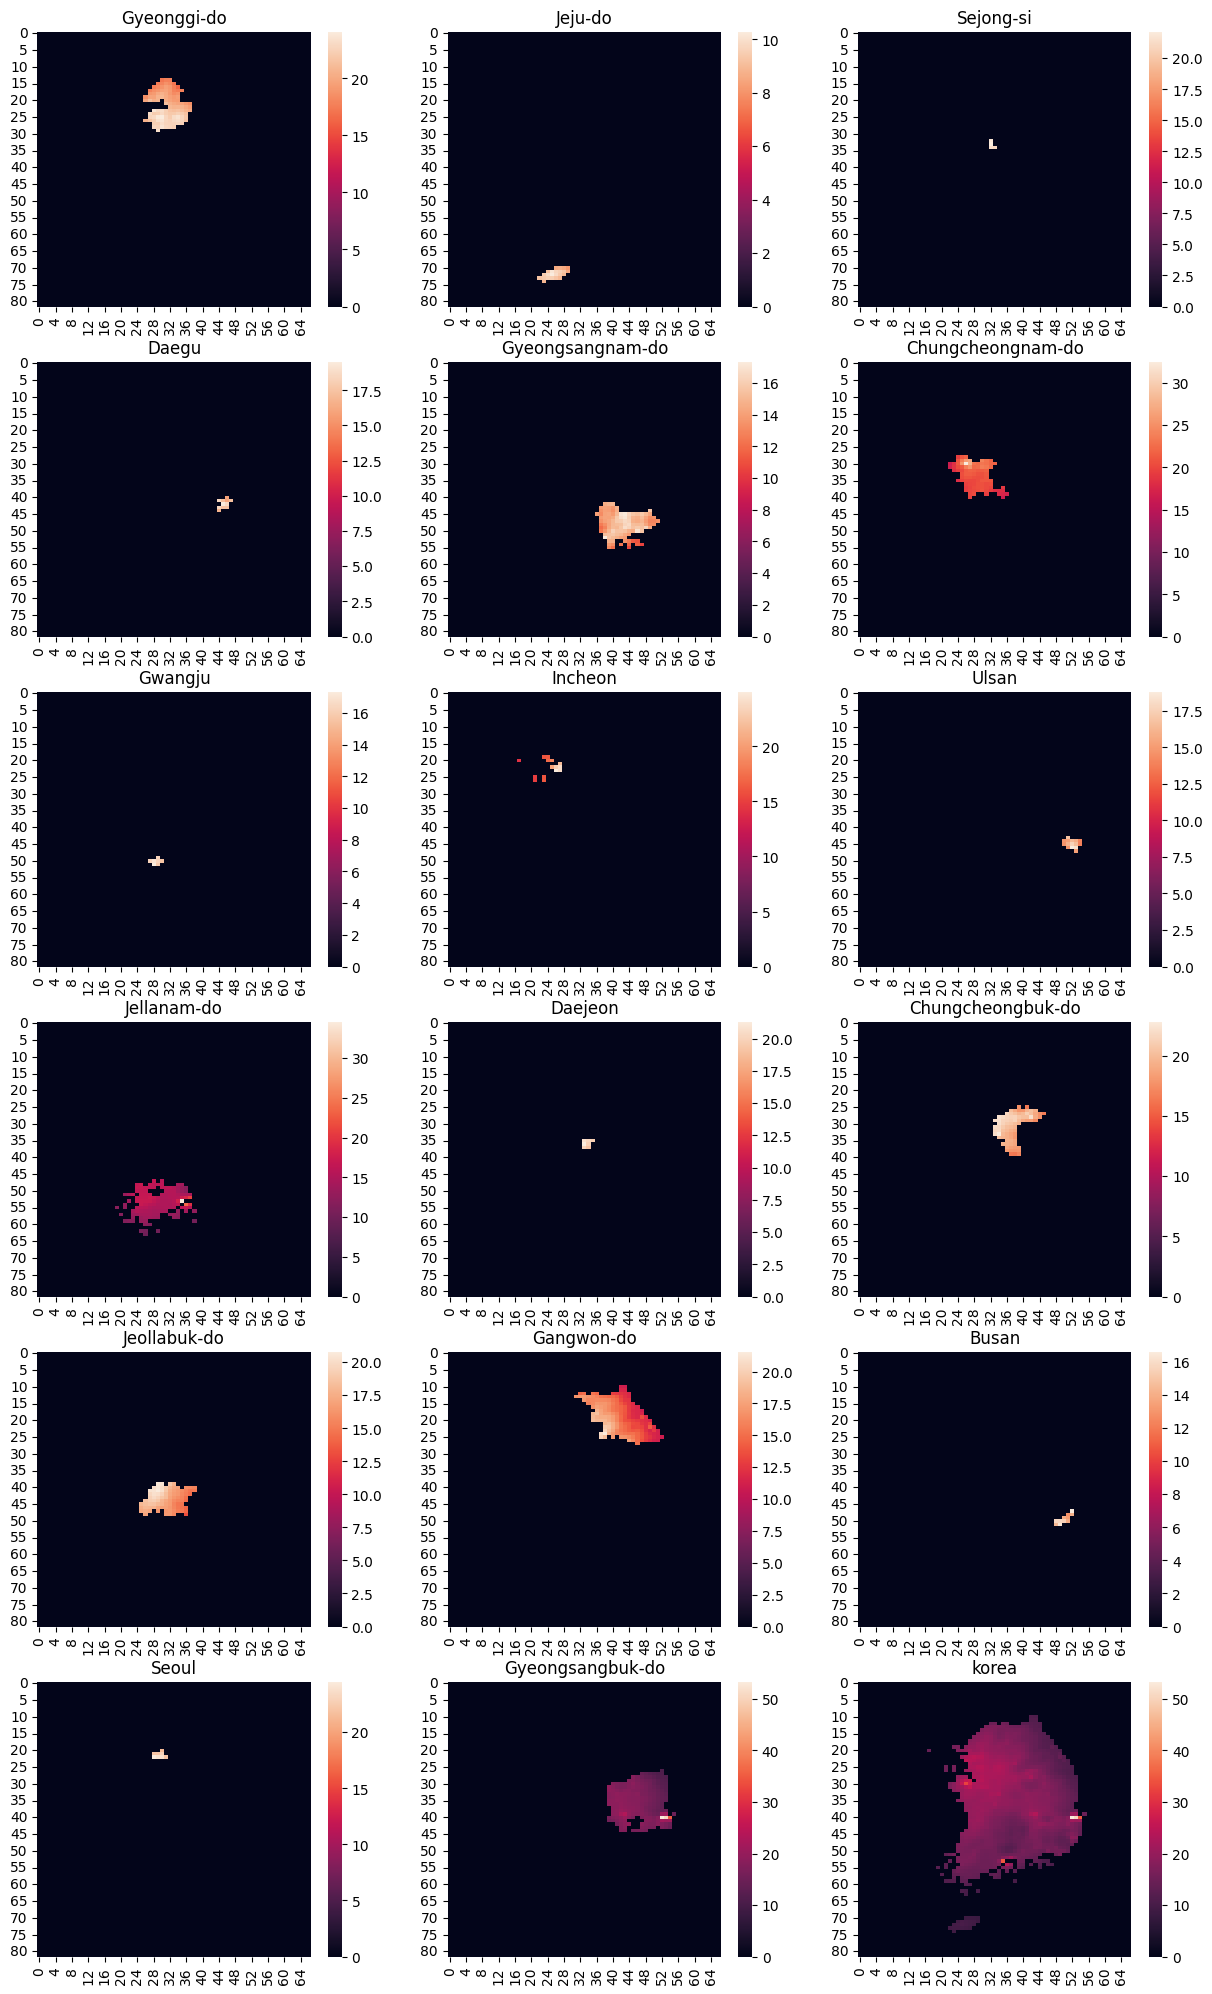

In [5]:
plt.figure(figsize = [15,25])

for i in range(len(ctp_kor_list)):
    plt.subplot(6,3,i+1)
    plt.title(ctp_names_info[ctp_kor_list[i]])
    sns.heatmap(pred_by_ctp_list[i][0][:,:,0][::-1])  # 0번 예측값만 시각화

<Axes: title={'center': 'r2'}>

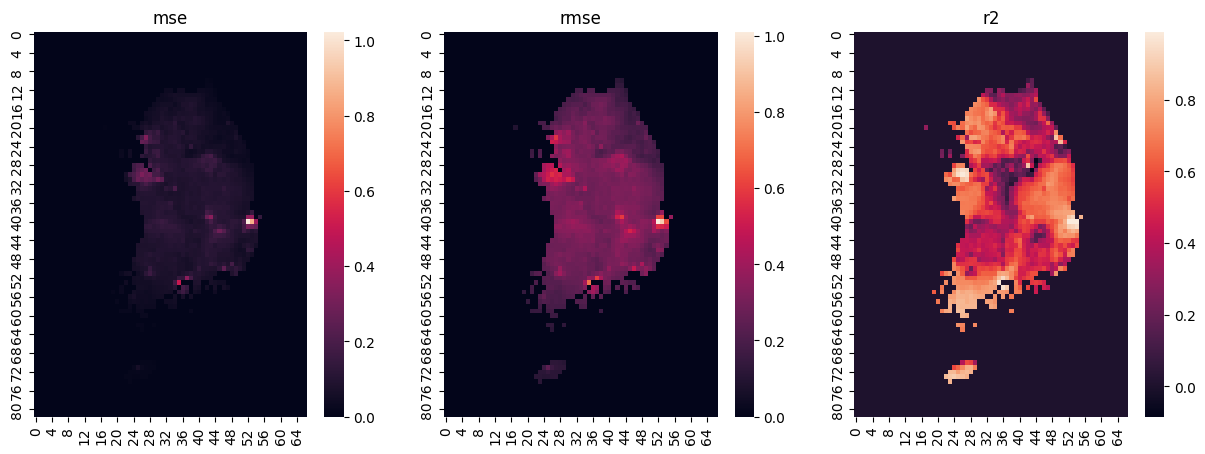

In [6]:
test_mse_map = pixrf.get_performance_map('전국', is_test=True, index_name='mse')
test_rmse_map = pixrf.get_performance_map('전국', is_test=True, index_name='rmse')
test_r2_map = pixrf.get_performance_map('전국', is_test=True, index_name='r2')

plt.figure(figsize = [15,5])

plt.subplot(1,3,1)
plt.title('mse')
sns.heatmap(test_mse_map[:,:,0][::-1])

plt.subplot(1,3,2)
plt.title('rmse')
sns.heatmap(test_rmse_map[:,:,0][::-1])

plt.subplot(1,3,3)
plt.title('r2')
sns.heatmap(test_r2_map[:,:,0][::-1])

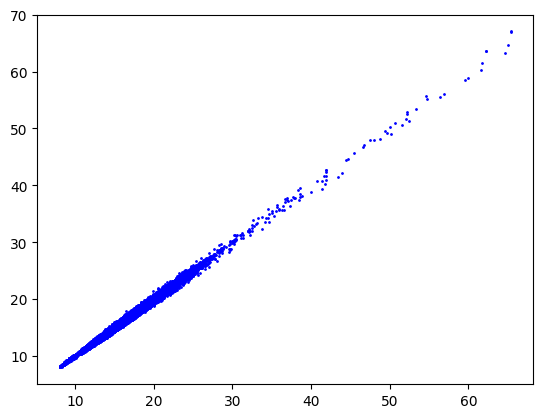

In [7]:
pred_test = pixrf.predict('전국', X_test)
pixrf.one_one_plot(pred_test, y_test)

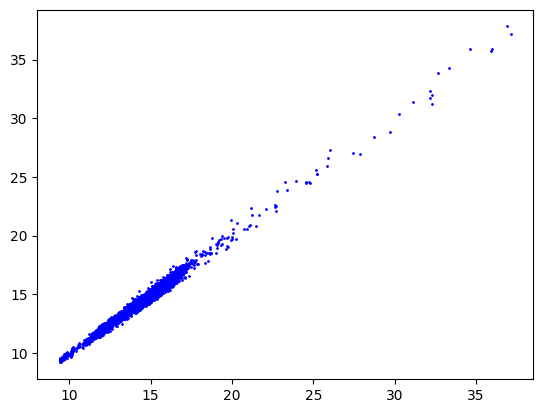

In [8]:
pred_test = pixrf.predict('전라남도', X_test)
pixrf.one_one_plot(pred_test, y_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


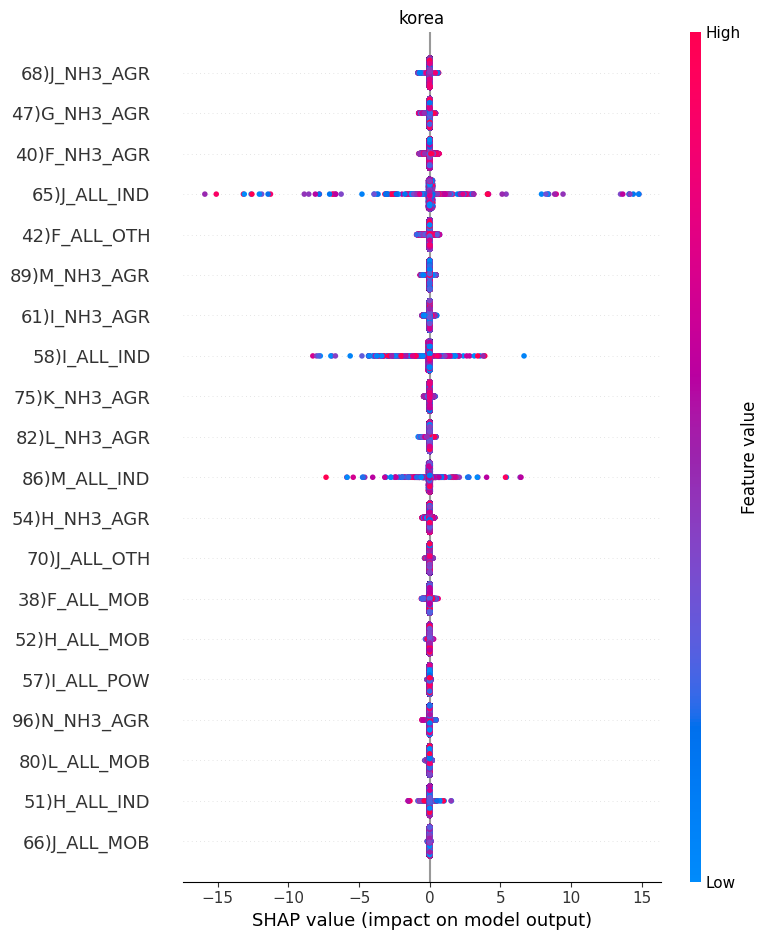

In [9]:
pixrf.get_shap_summary_plot(X_test, datacontroller.input_cols, '전국', 'korea', [10,10])


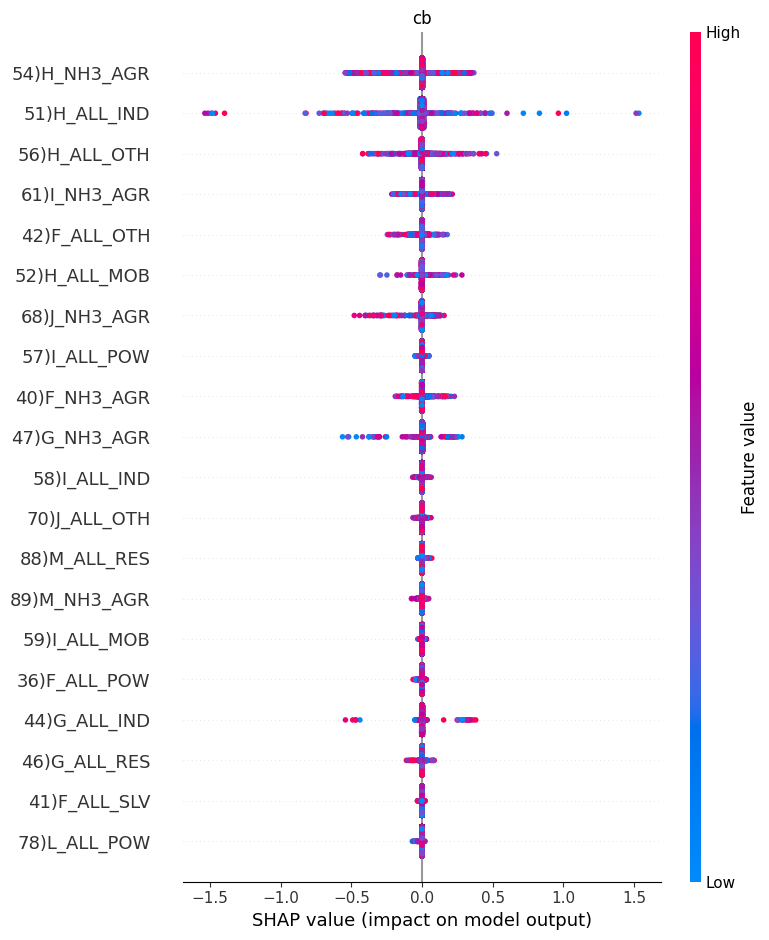

In [10]:
pixrf.get_shap_summary_plot(X_test, datacontroller.input_cols, '충청북도', 'cb', [10,10])


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


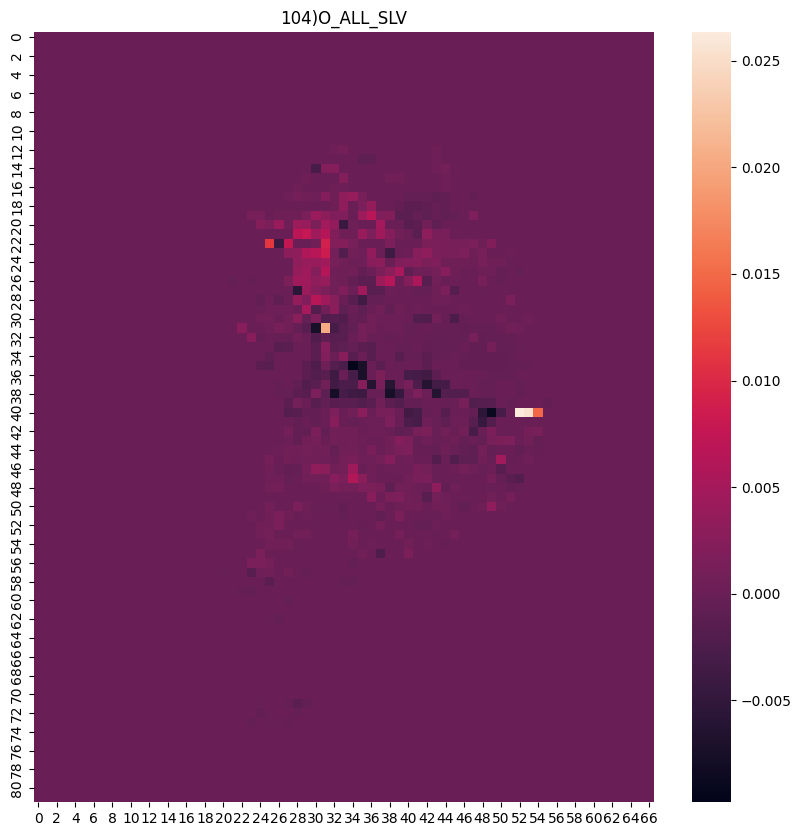

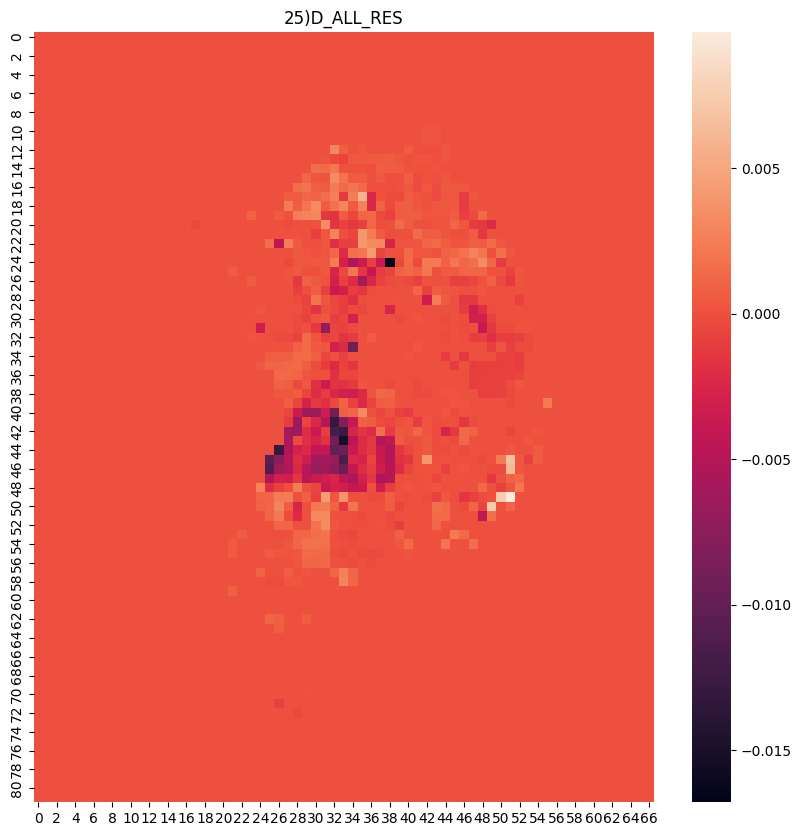

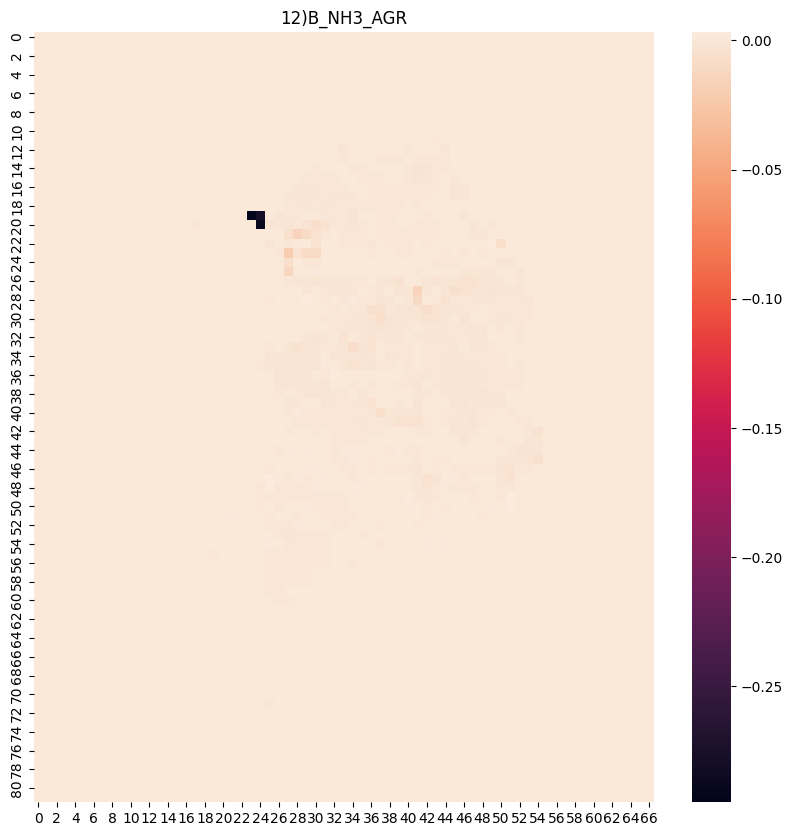

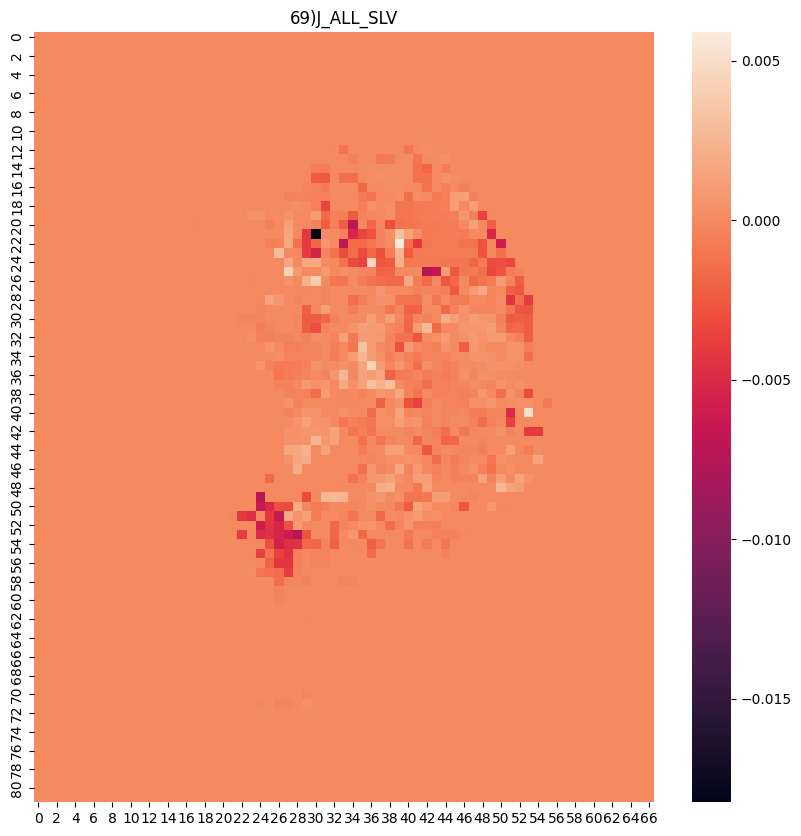

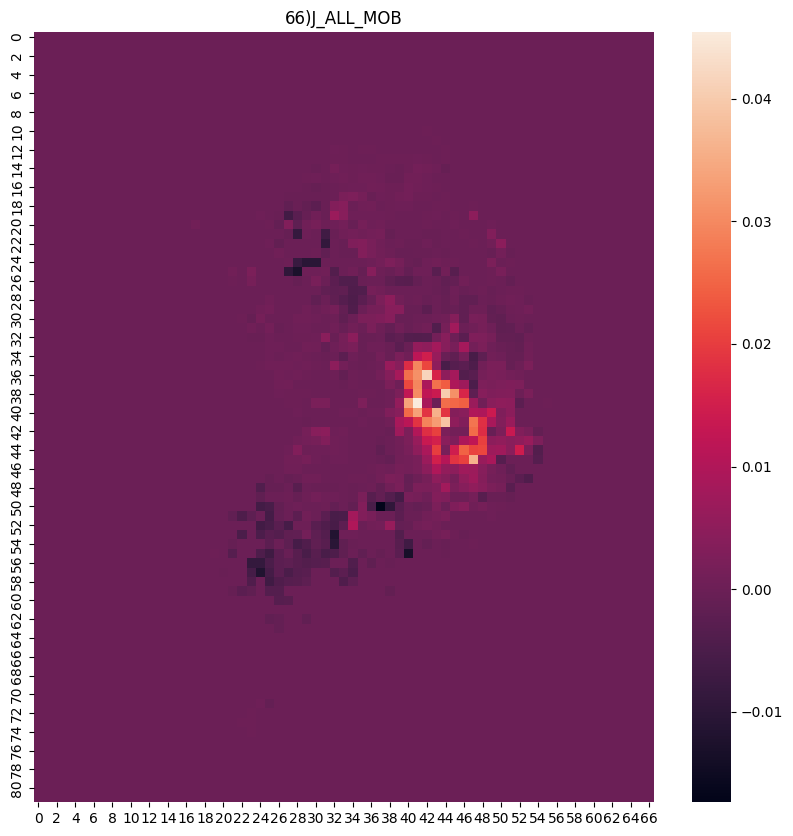

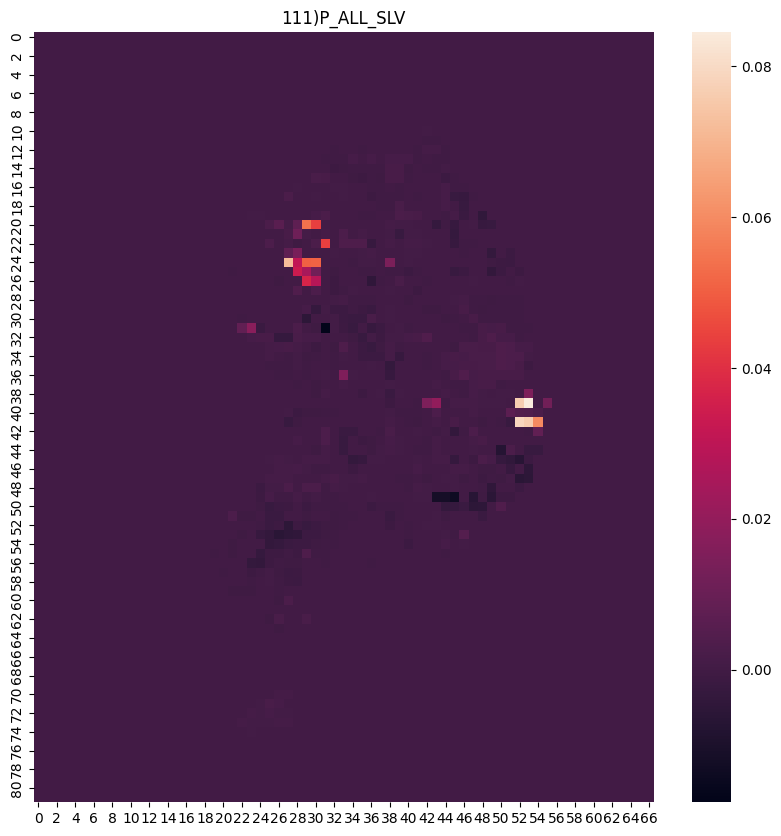

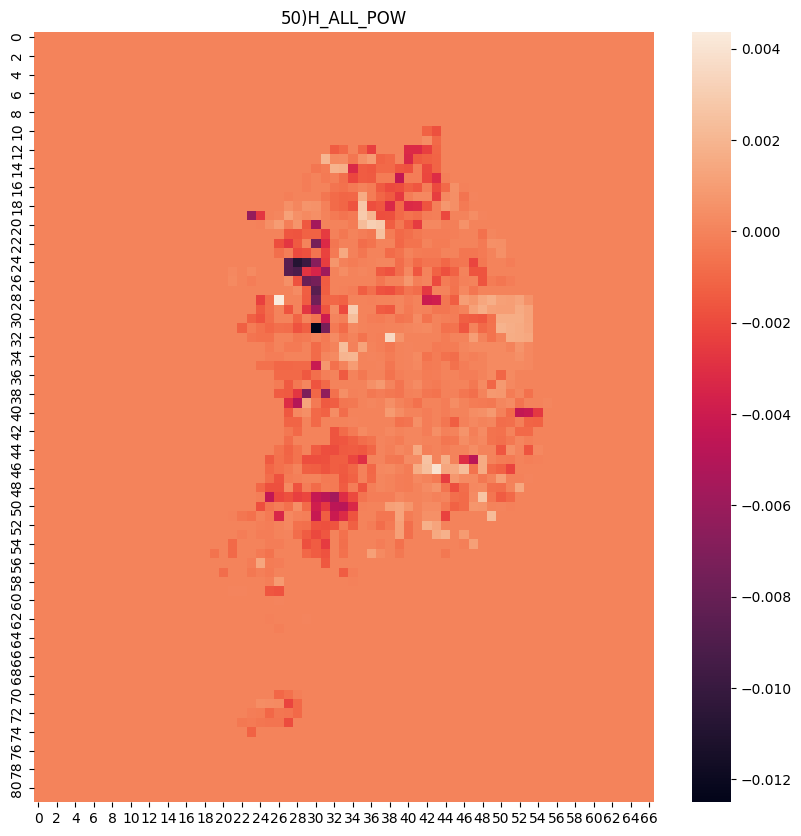

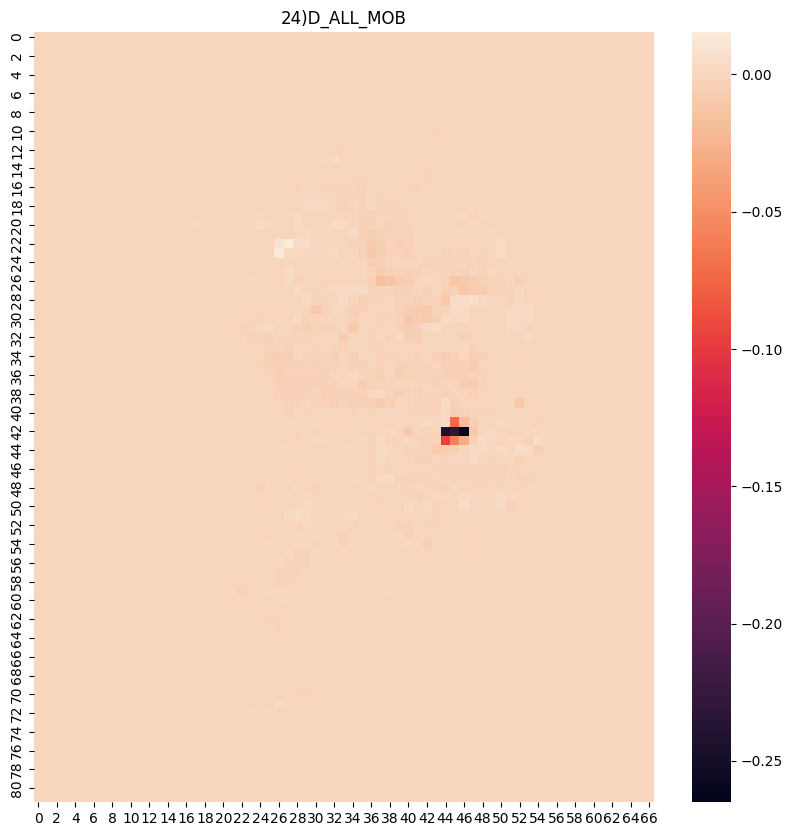

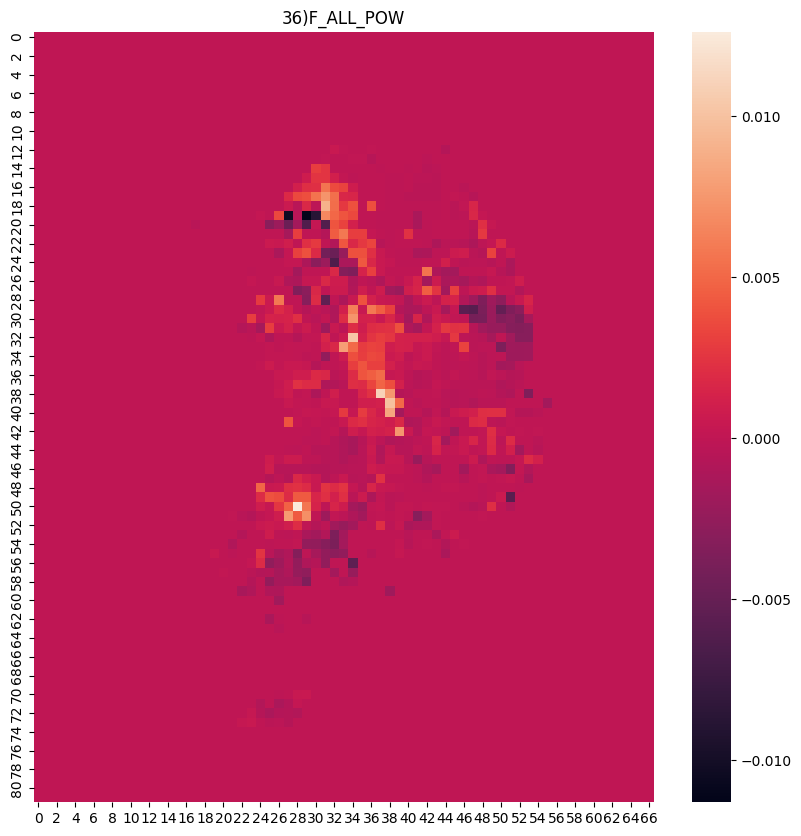

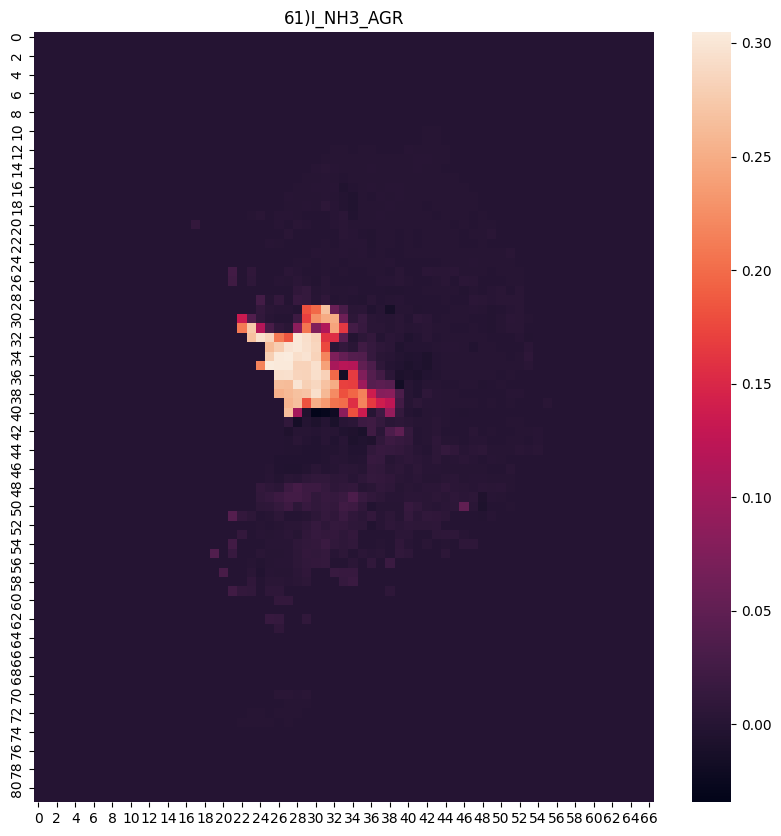

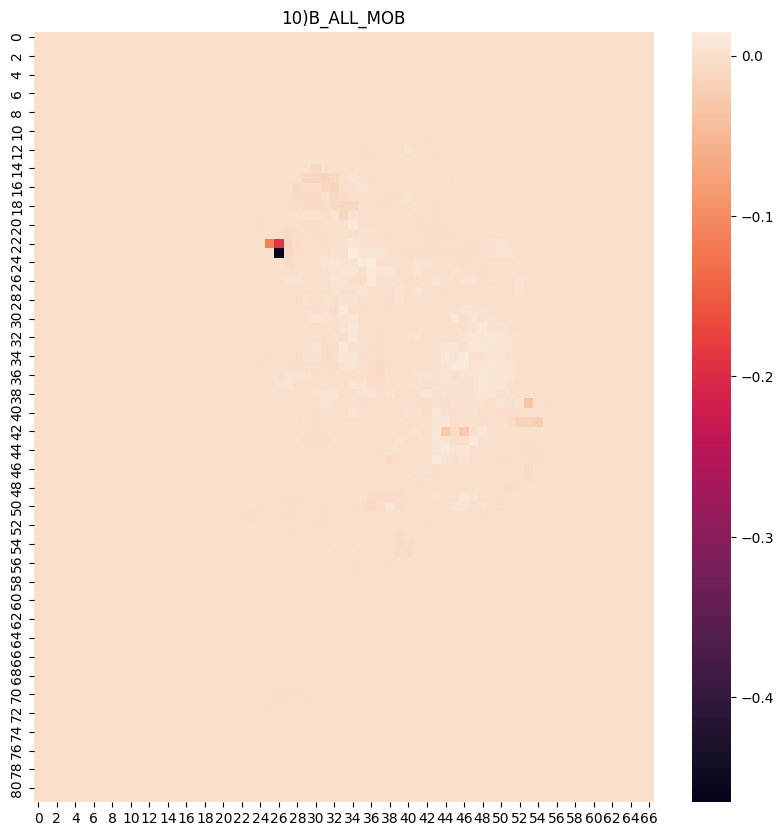

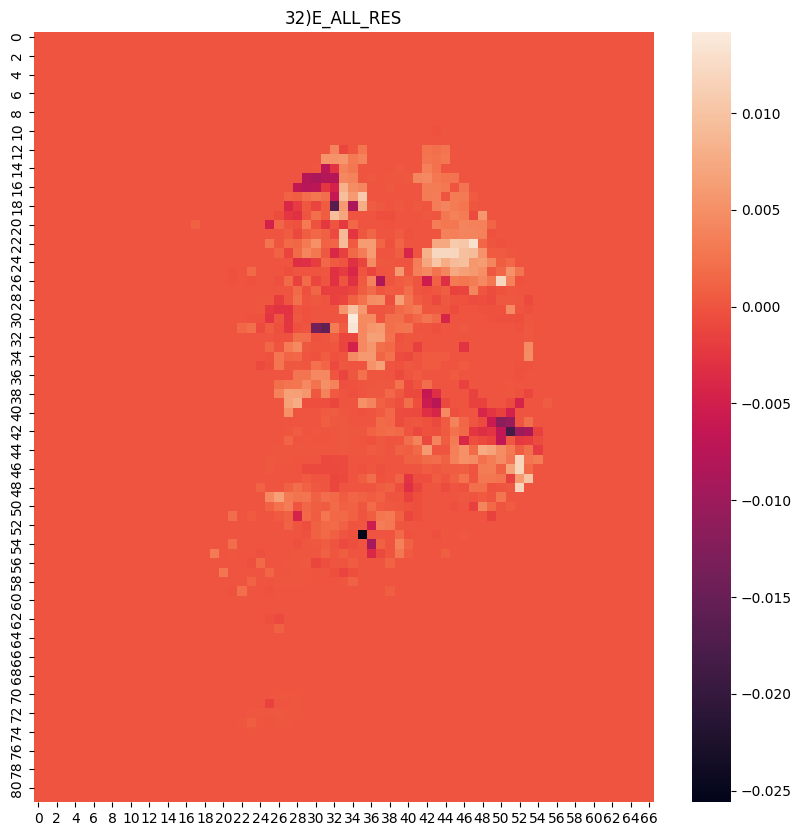

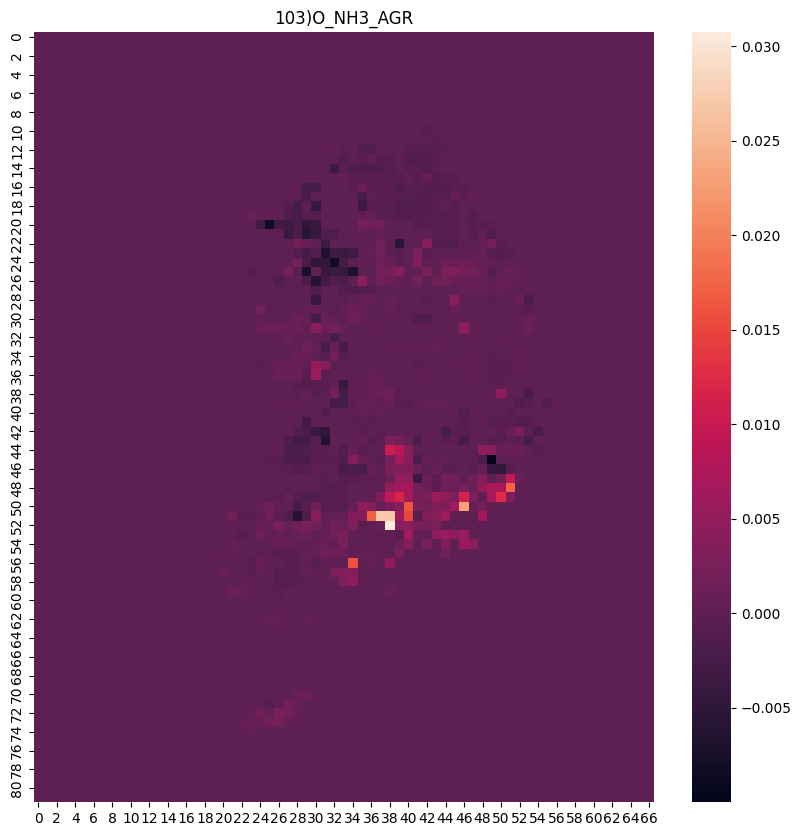

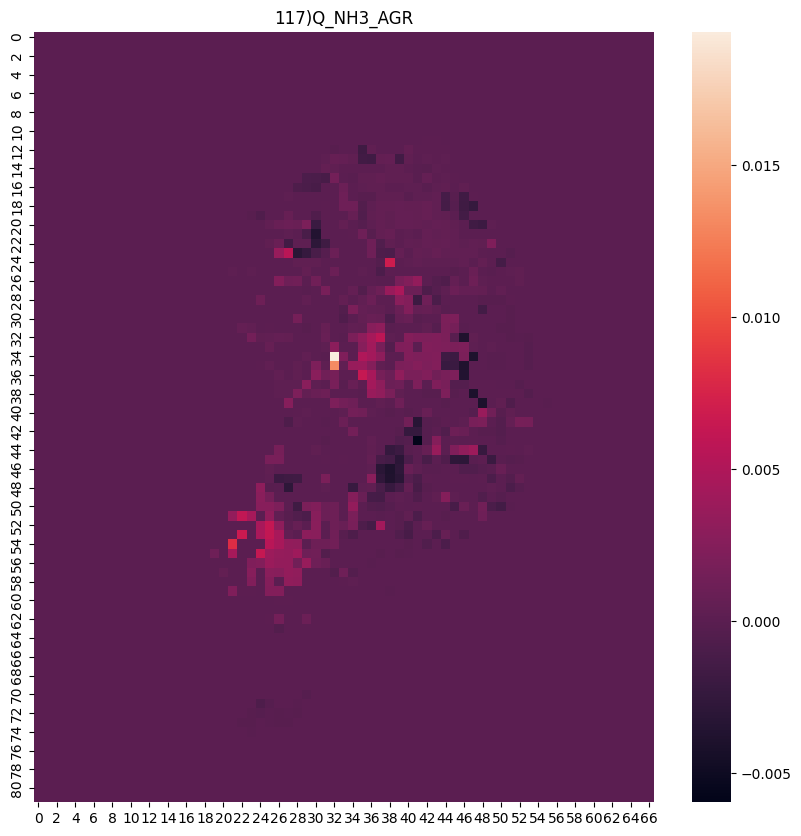

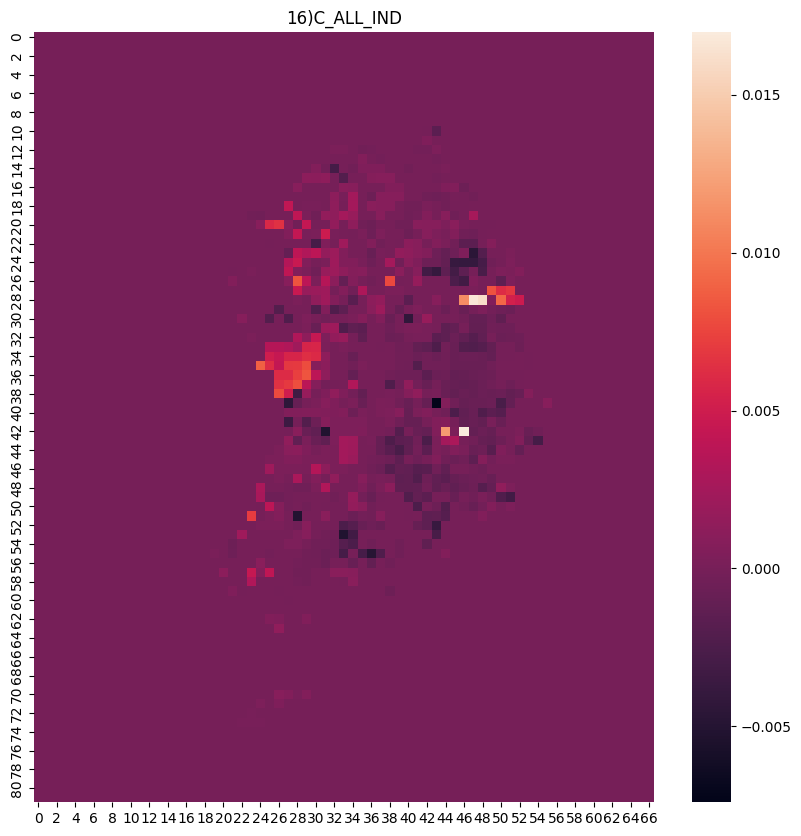

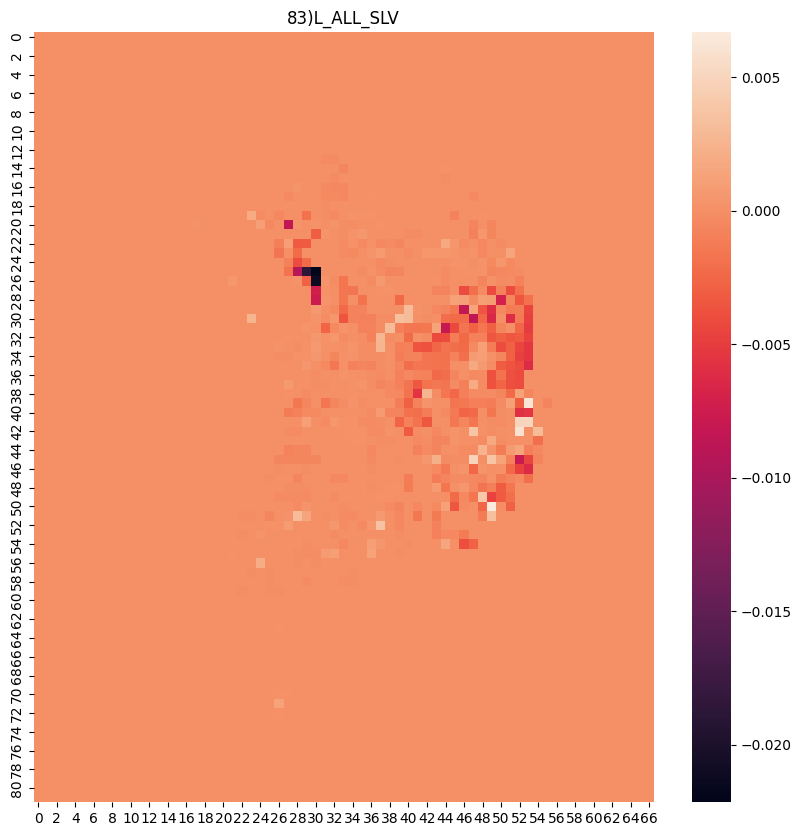

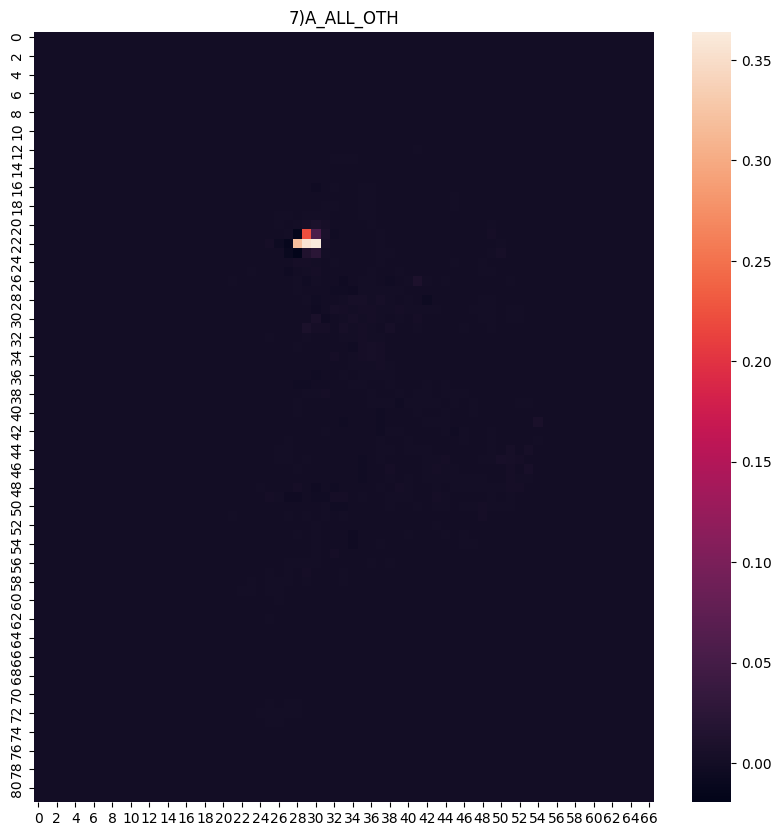

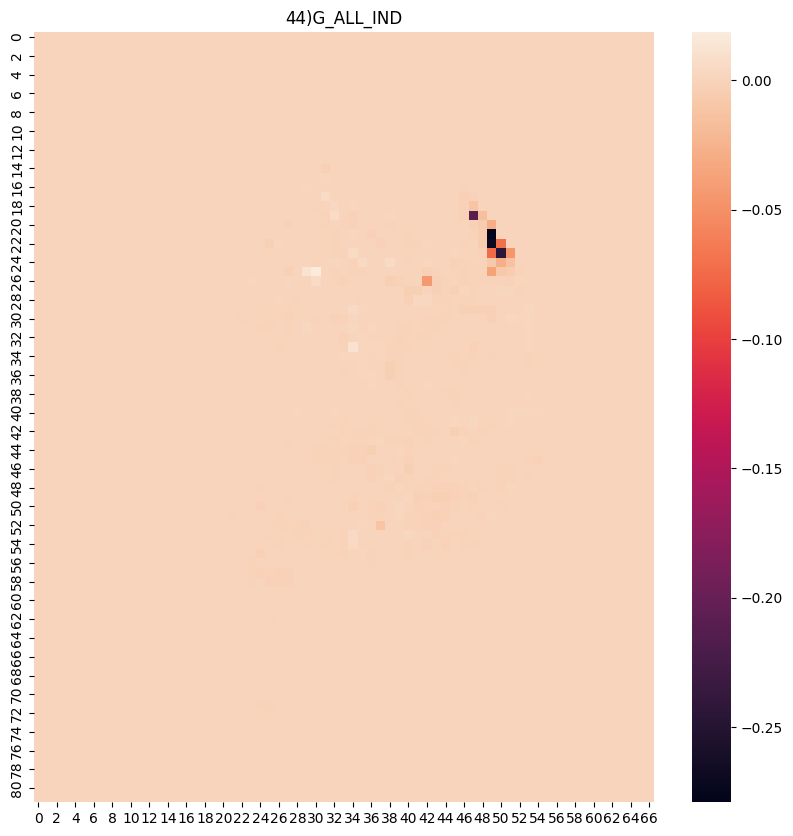

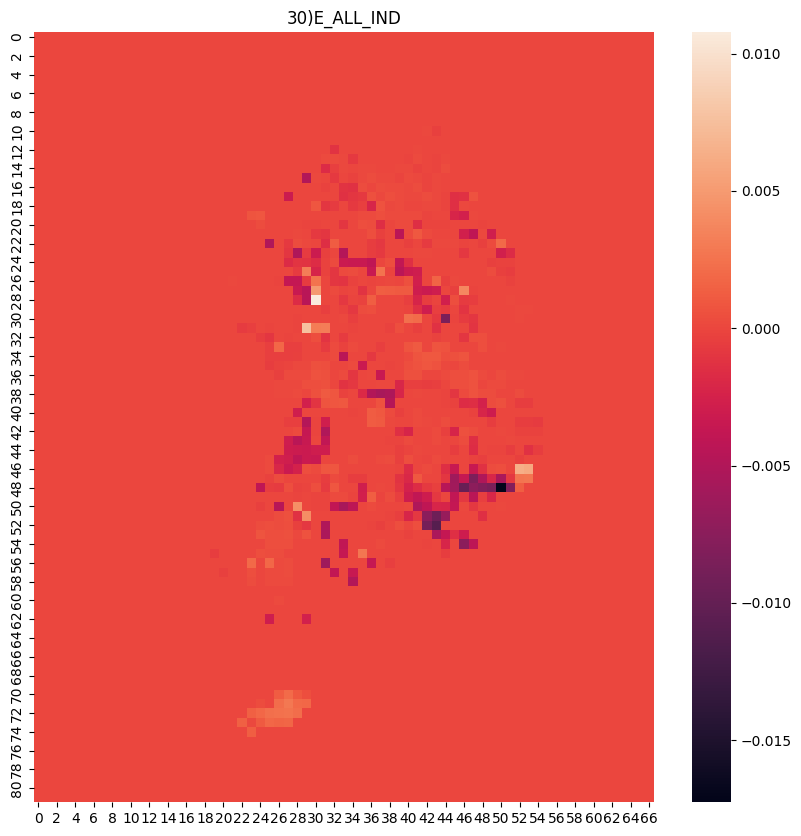

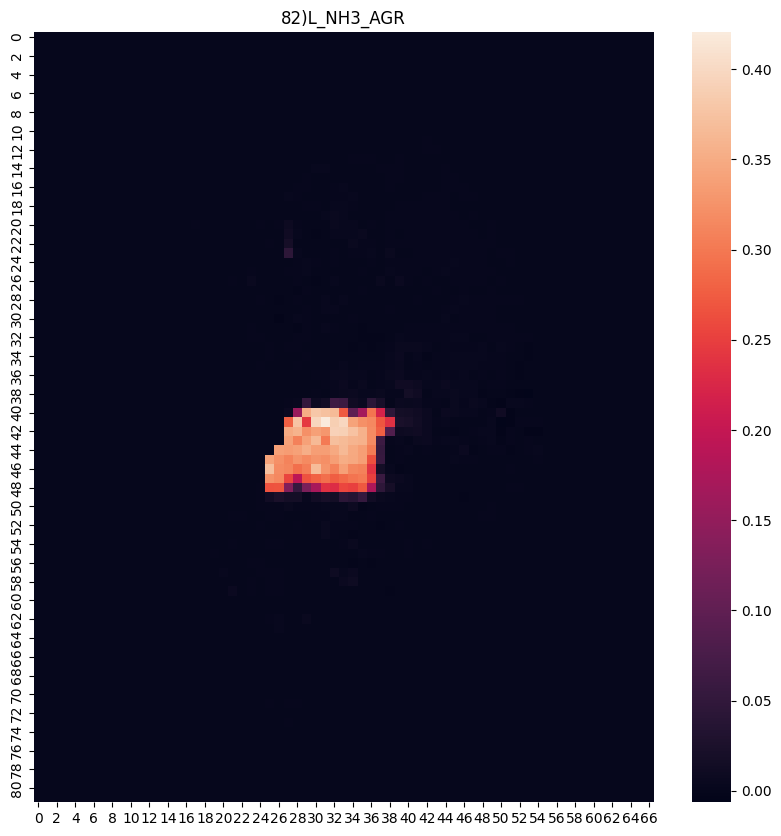

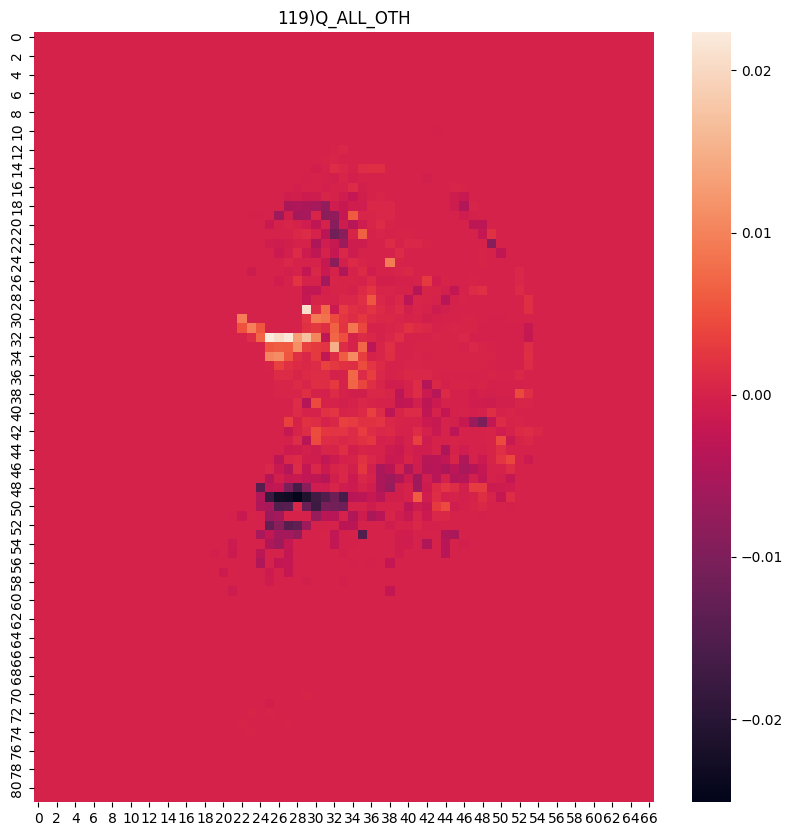

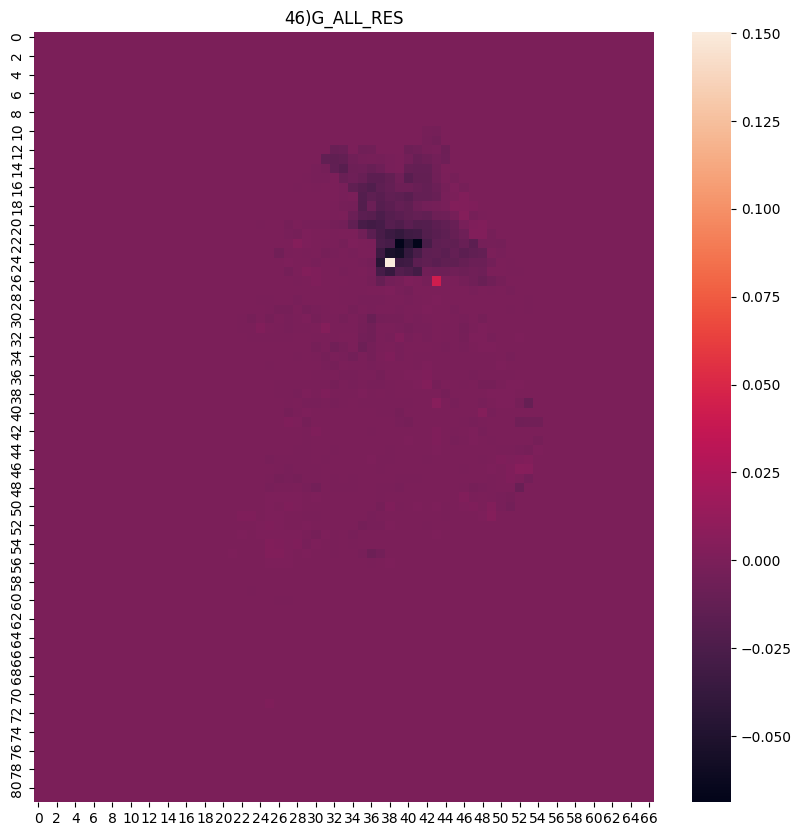

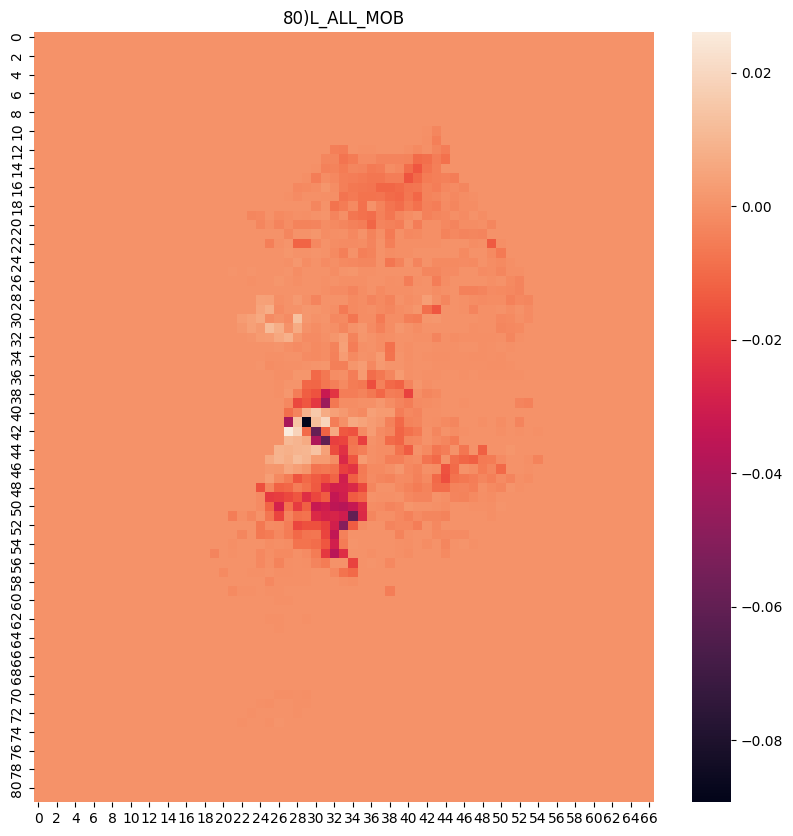

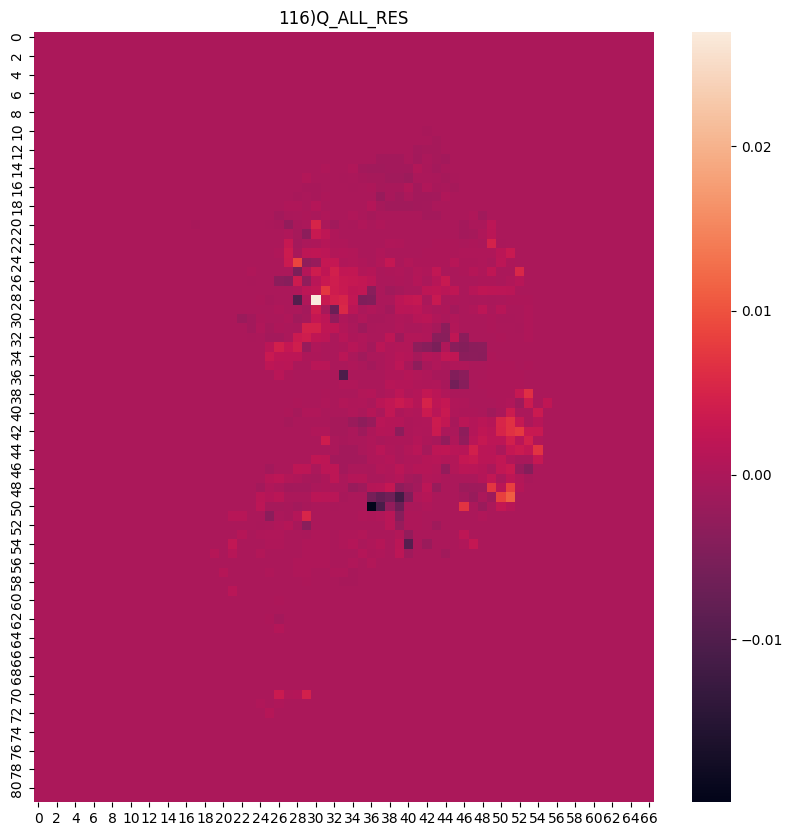

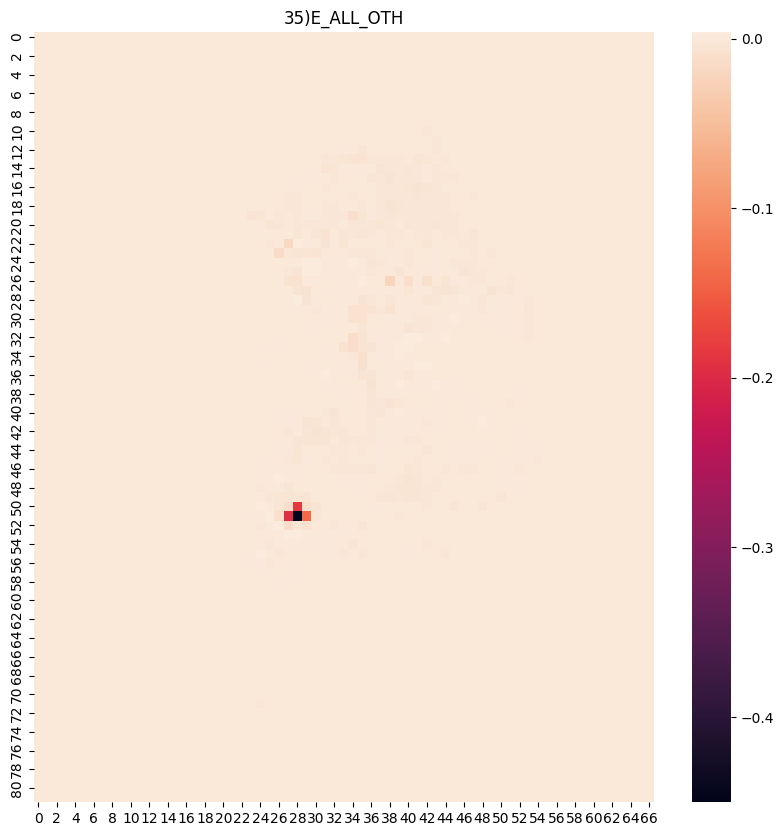

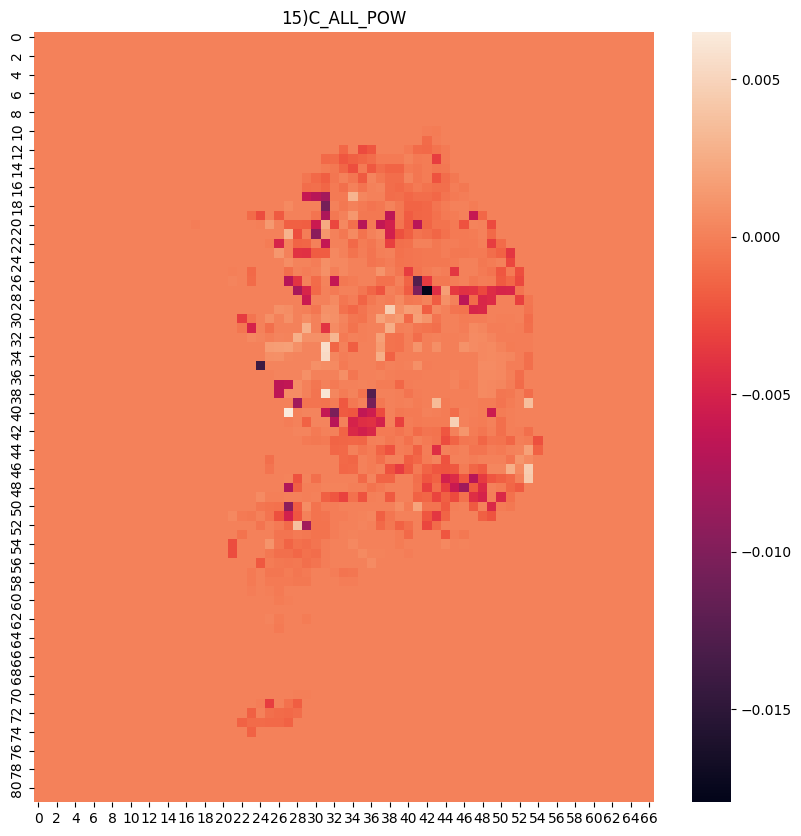

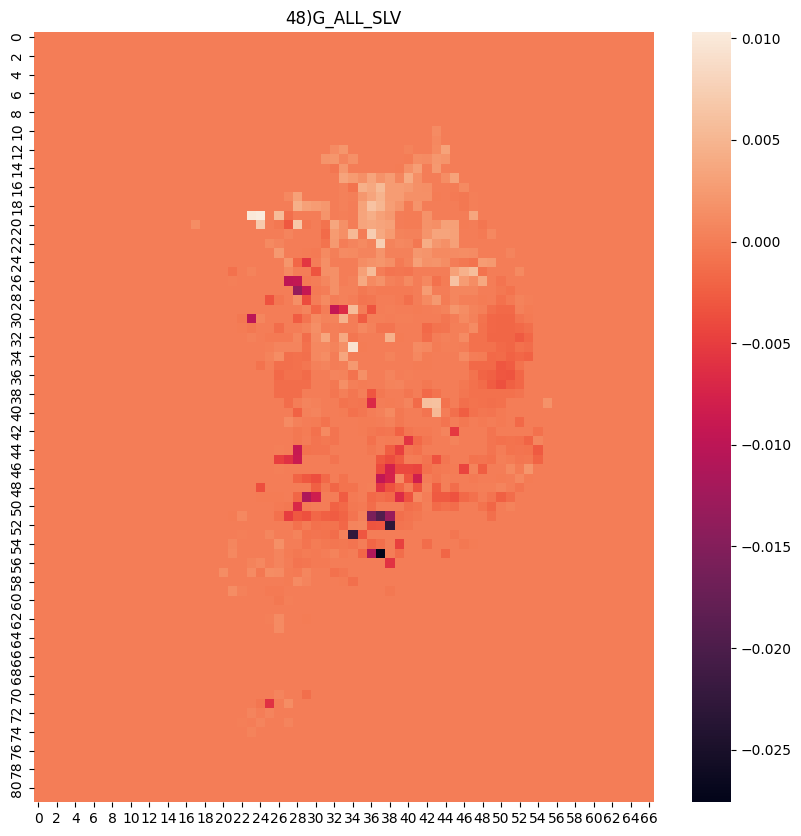

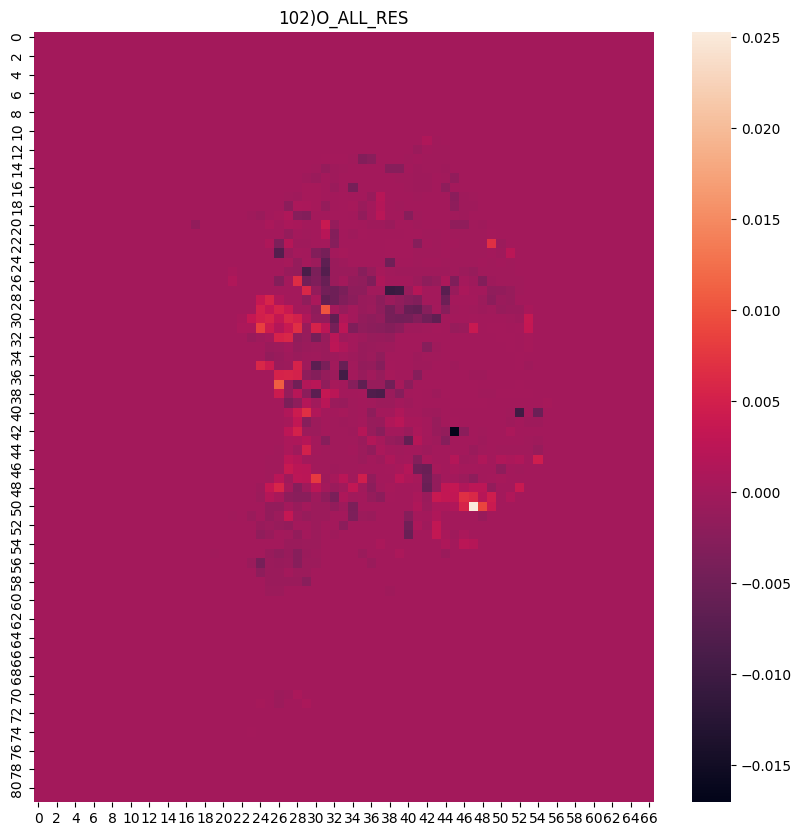

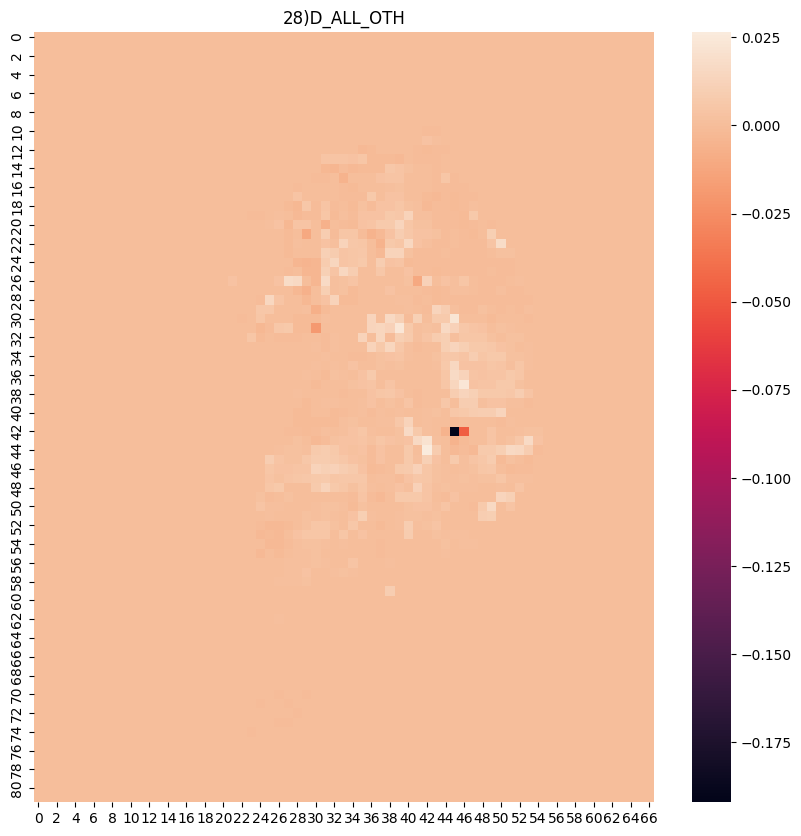

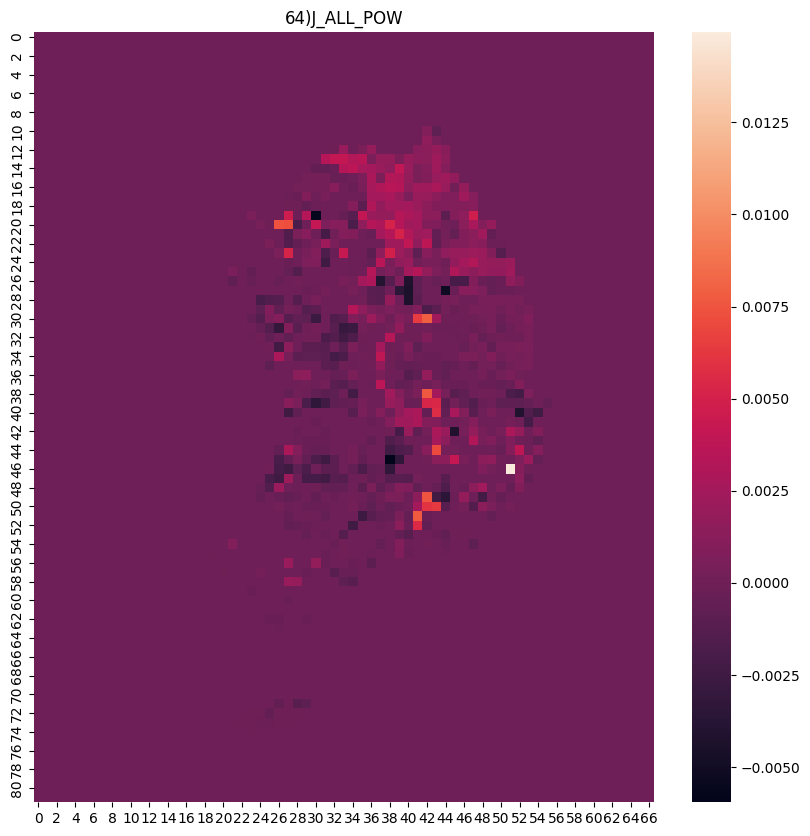

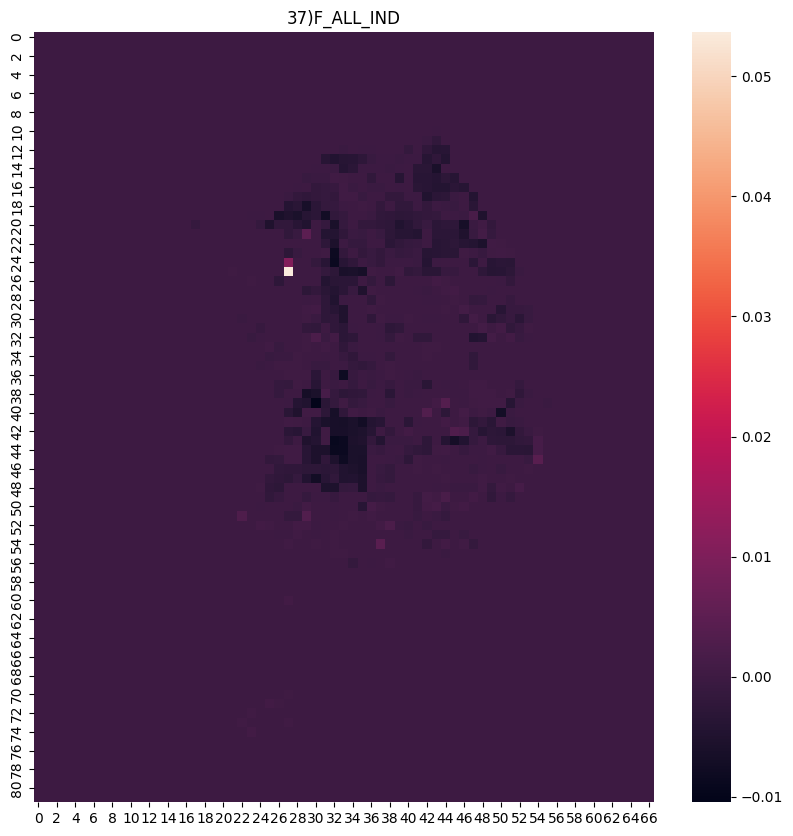

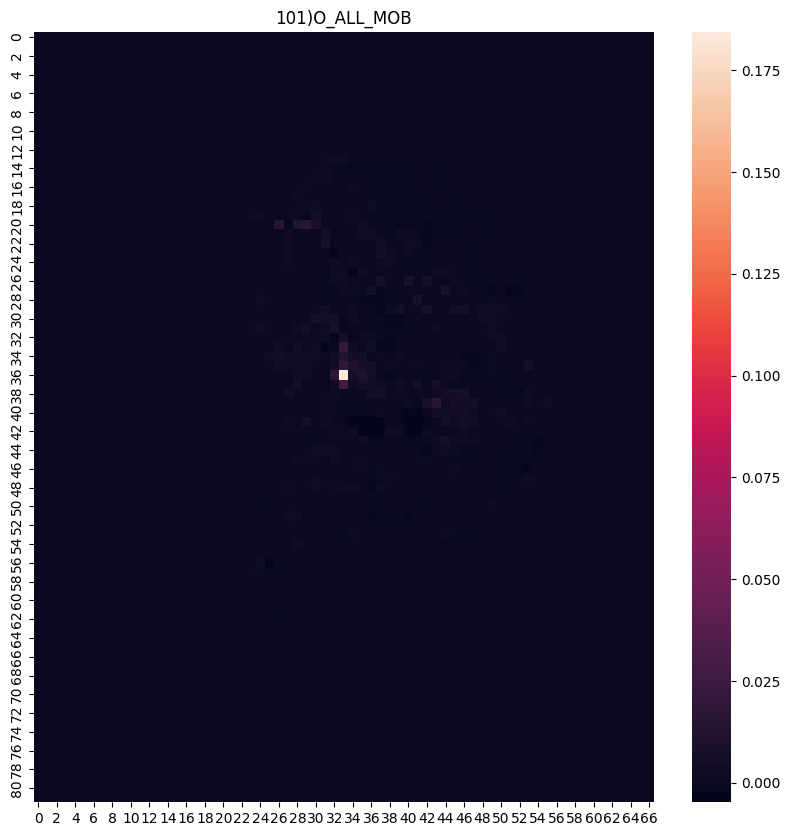

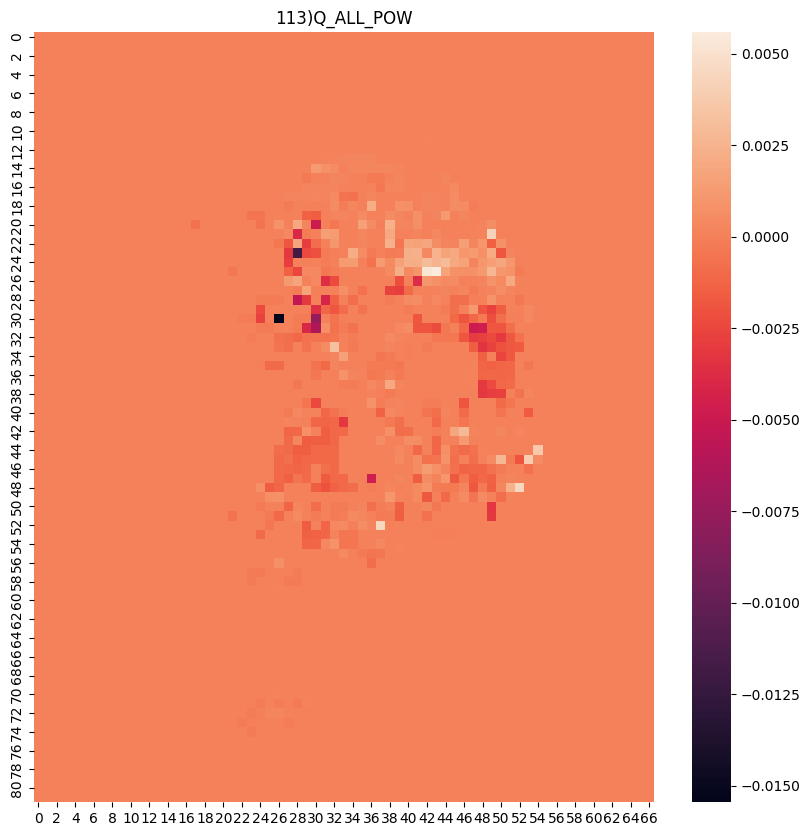

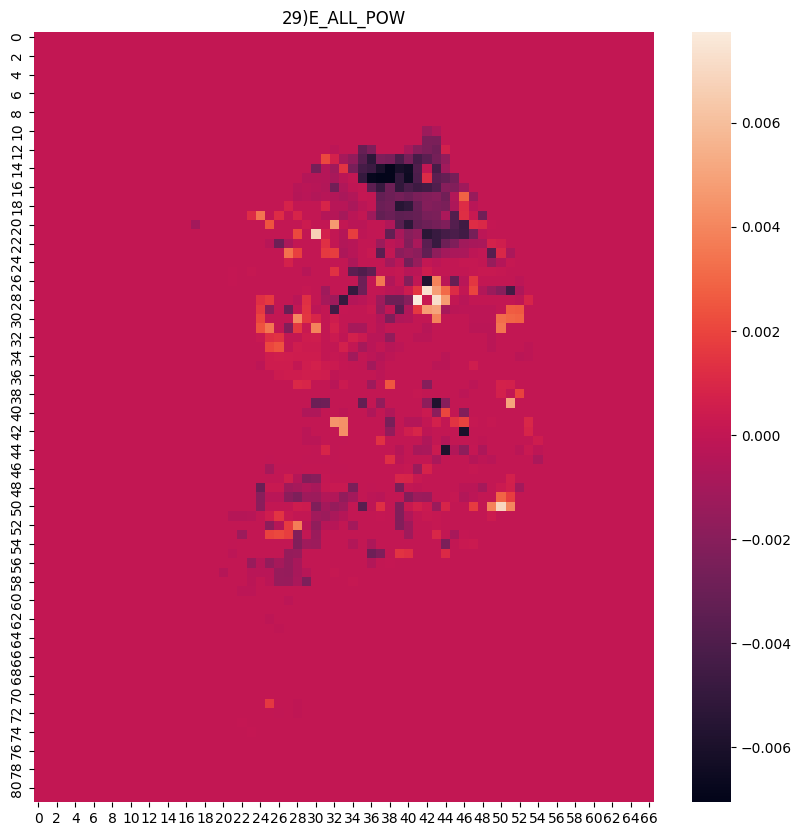

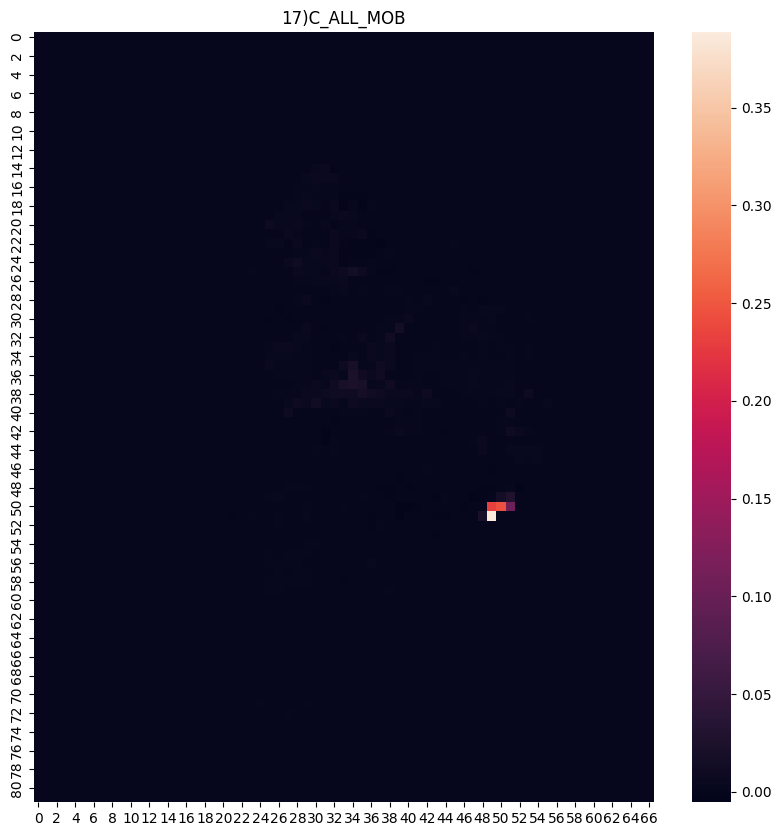

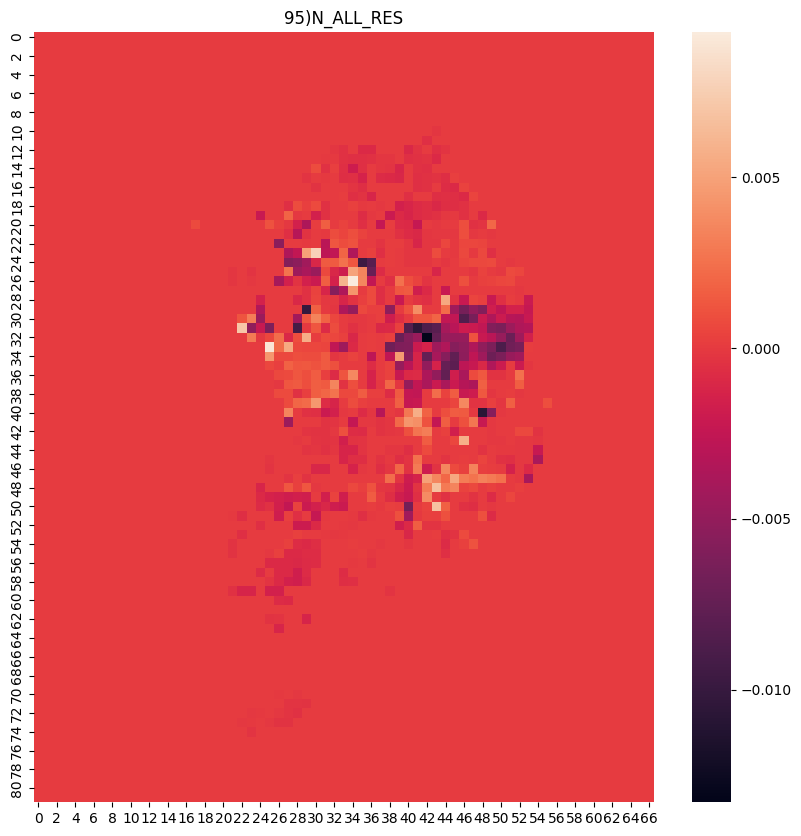

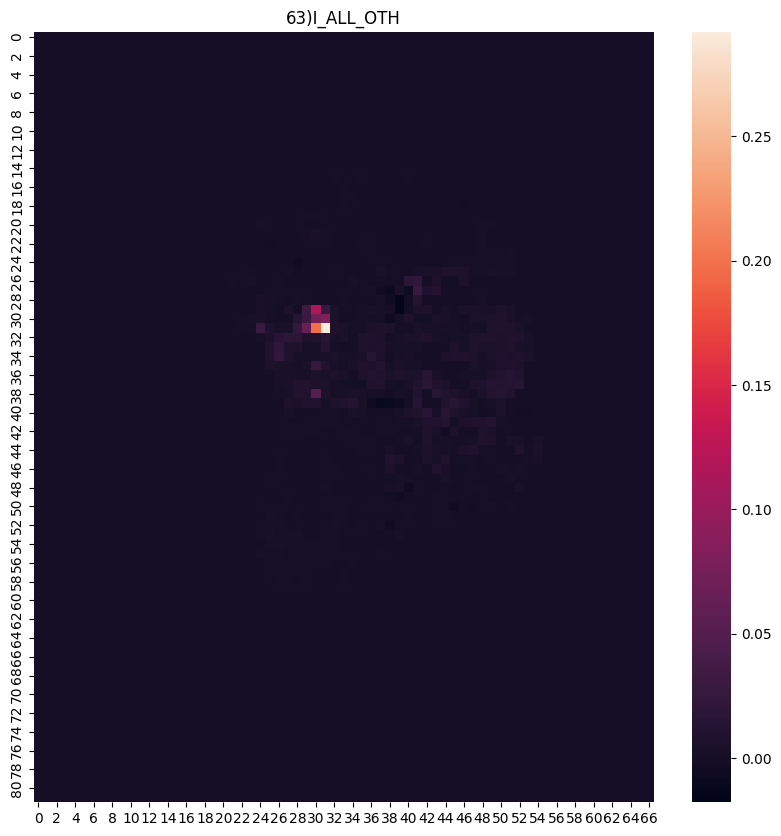

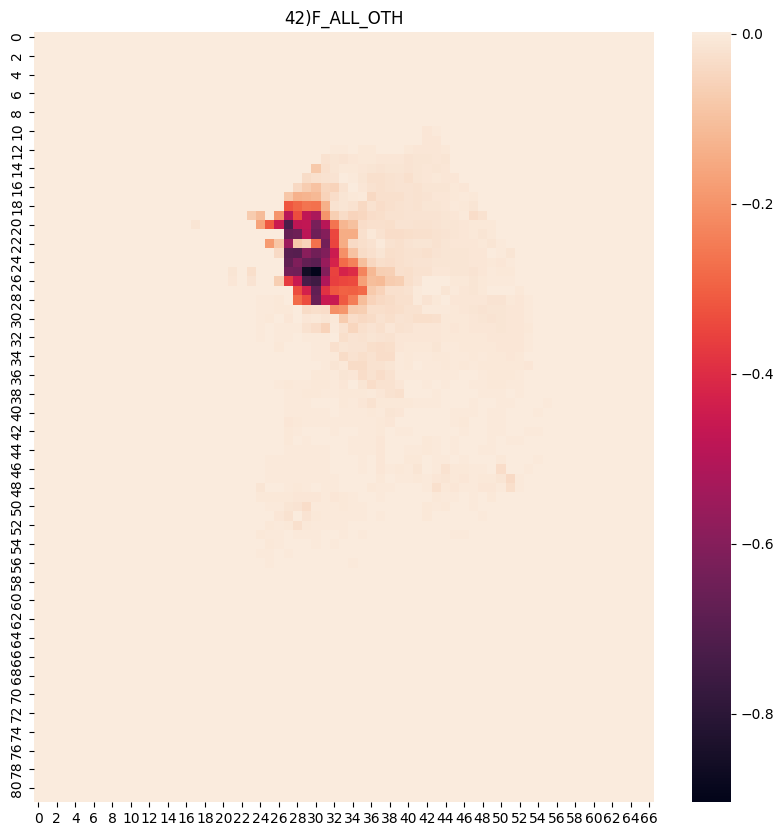

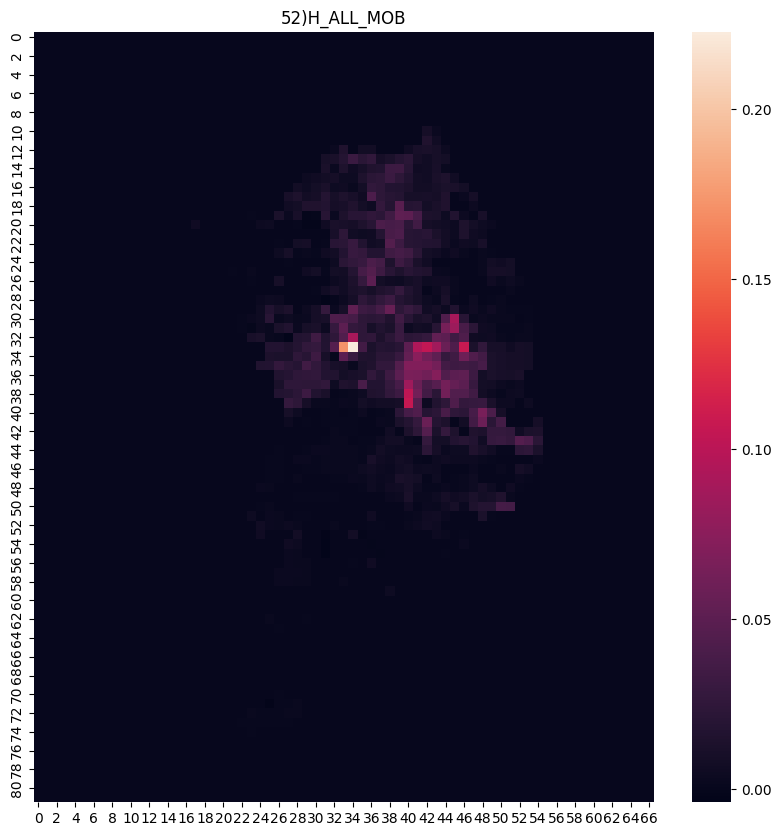

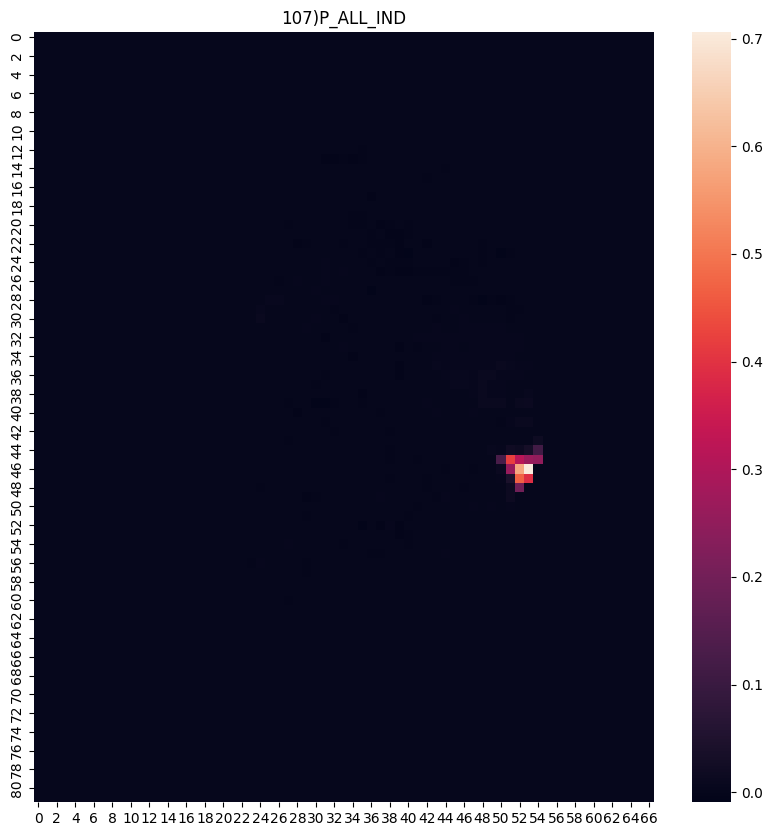

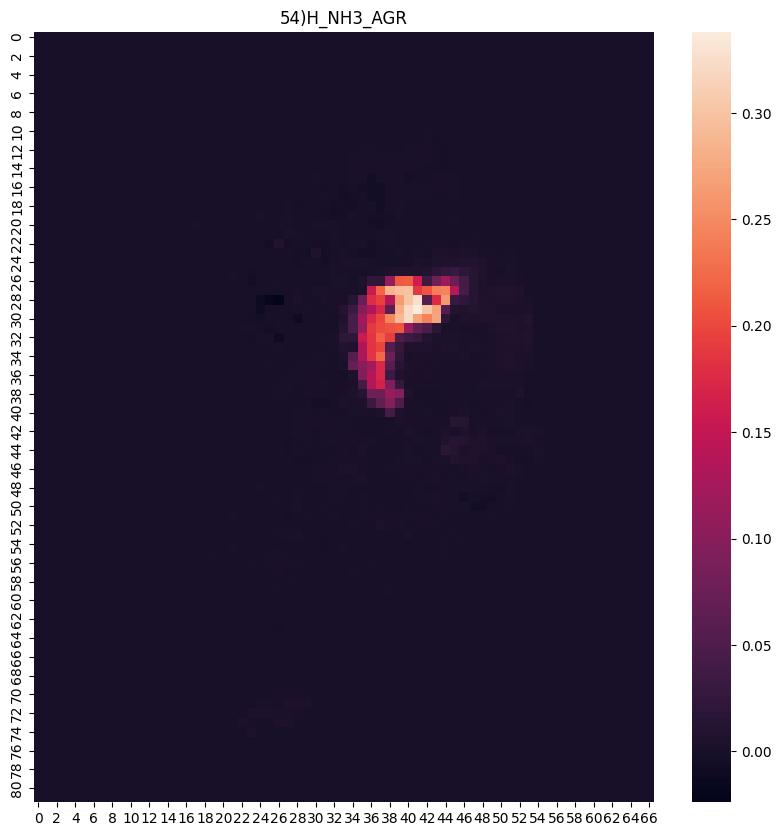

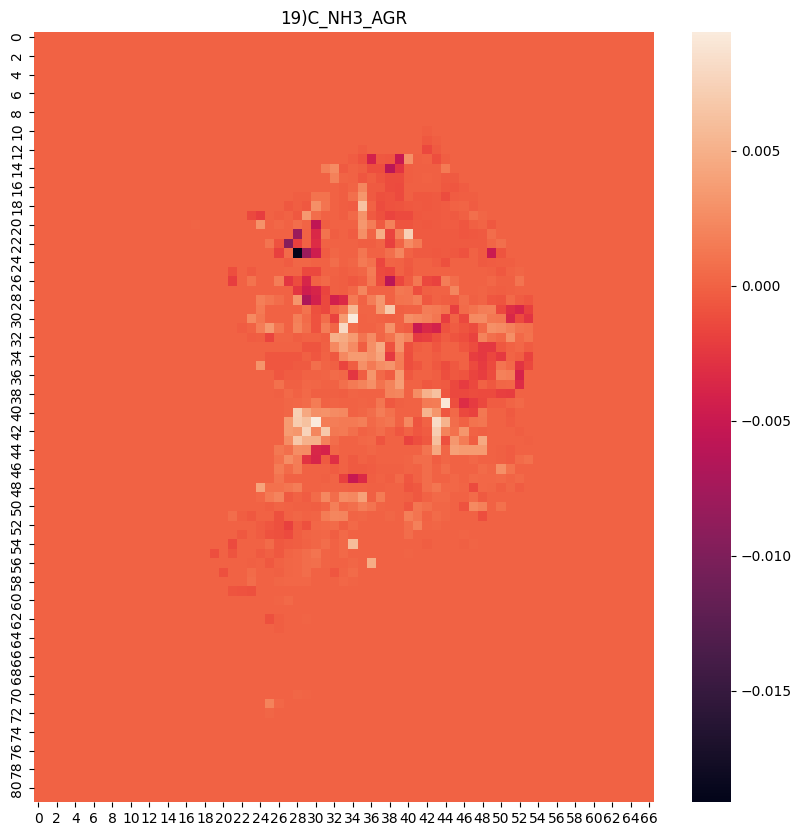

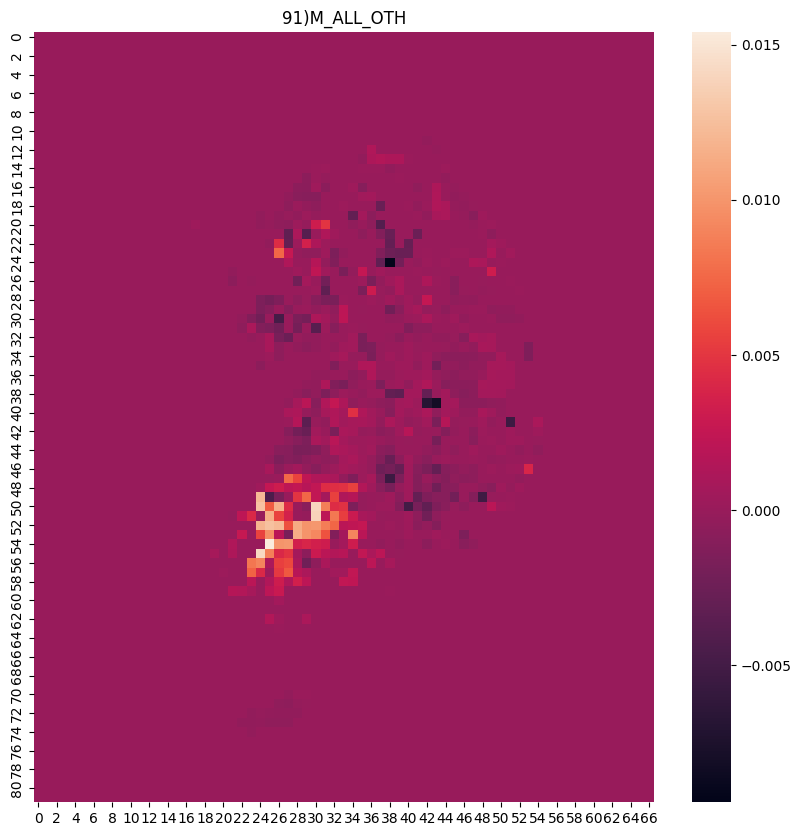

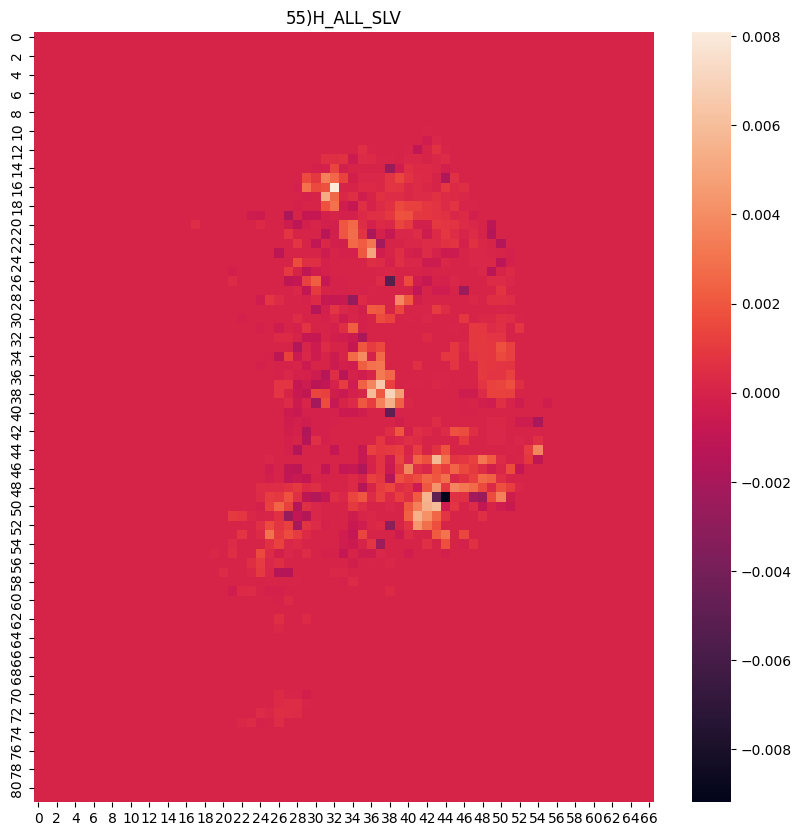

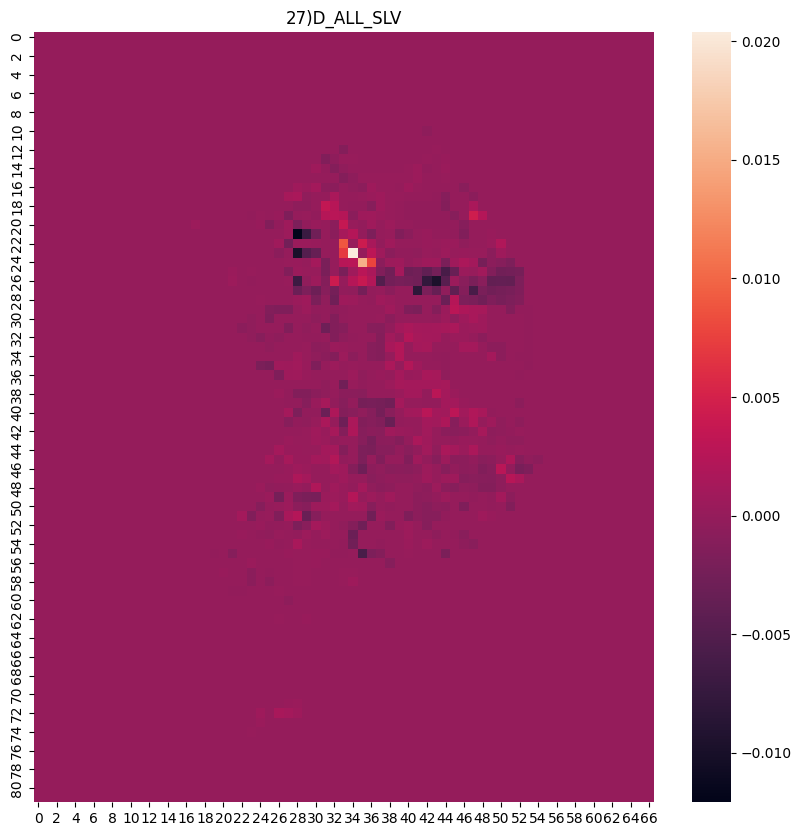

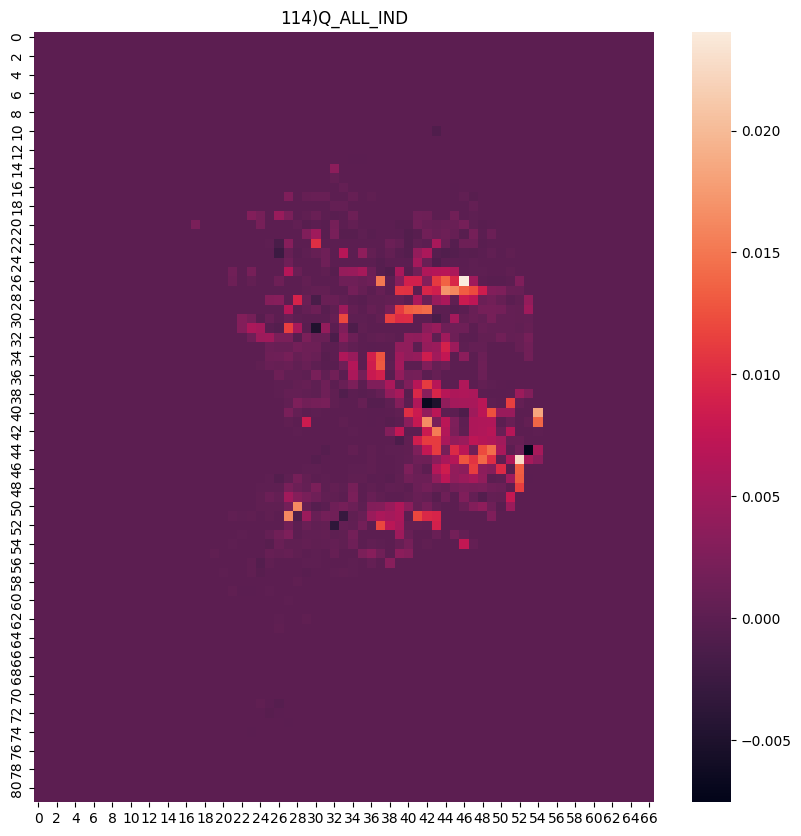

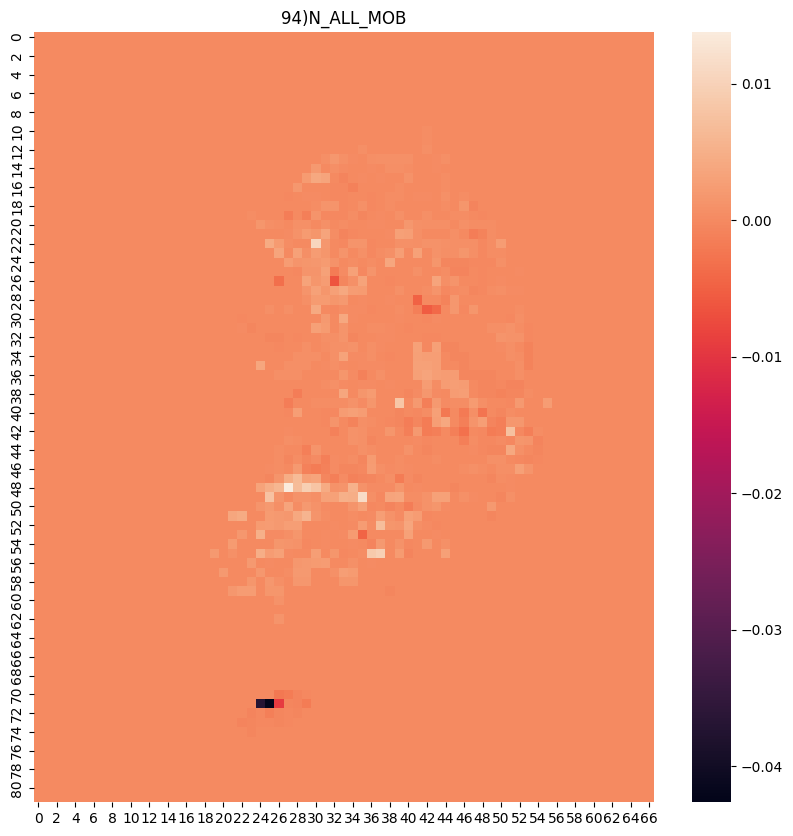

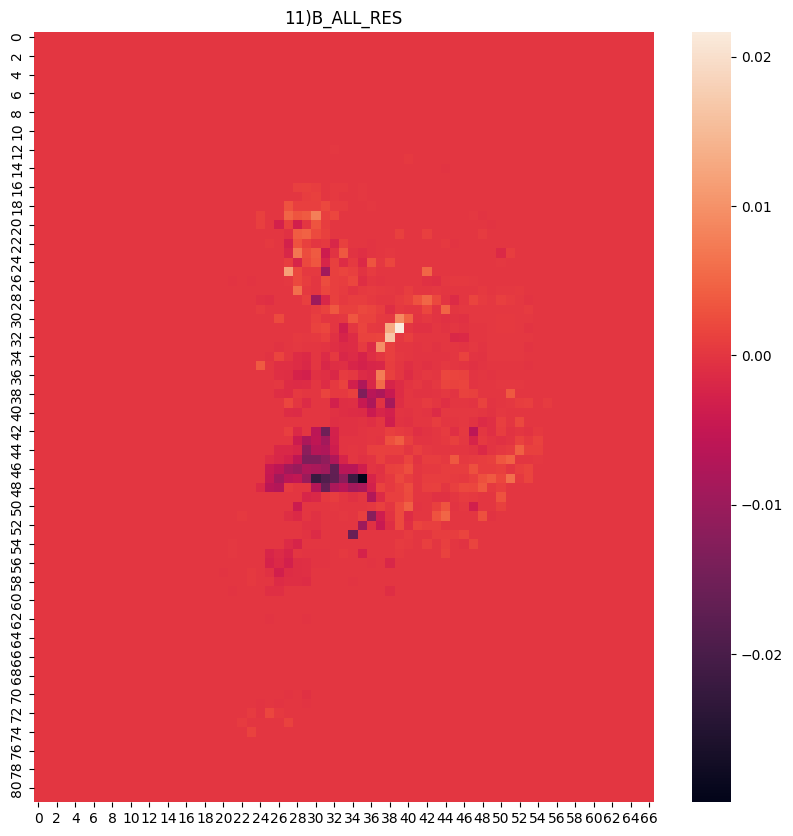

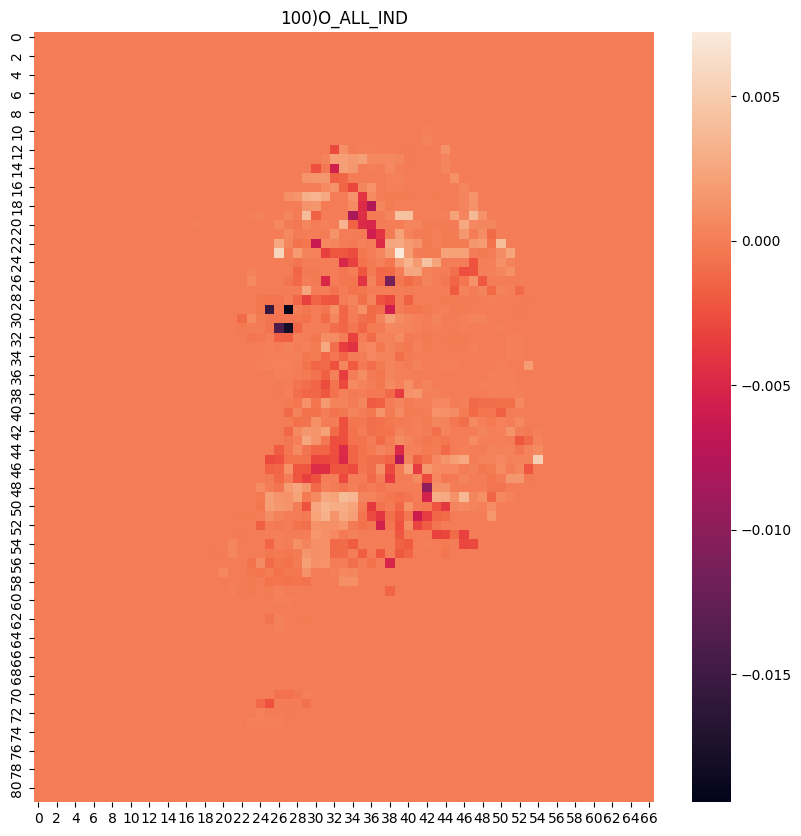

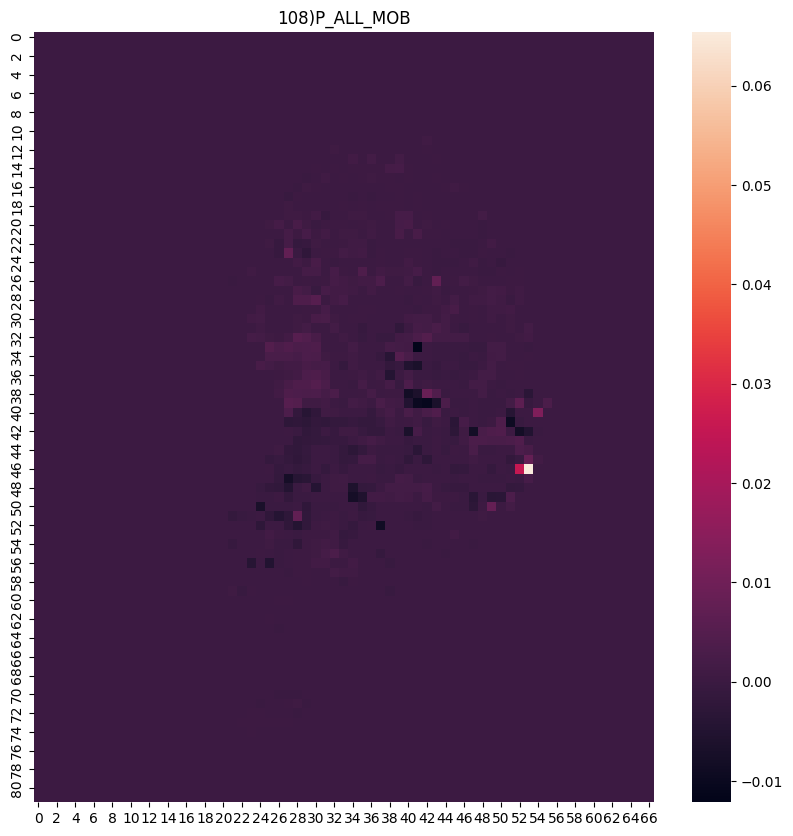

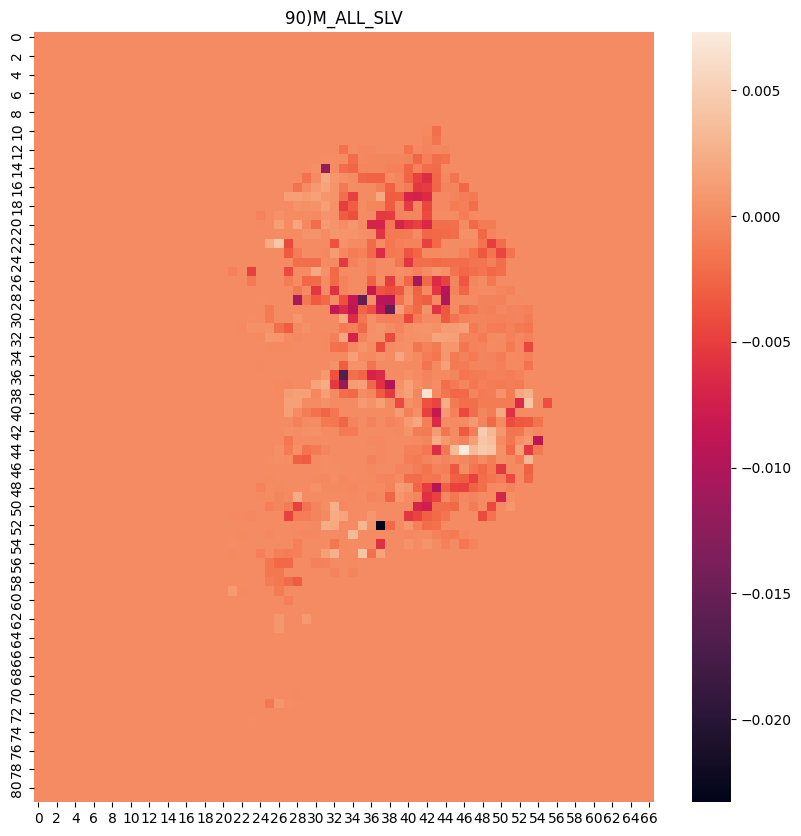

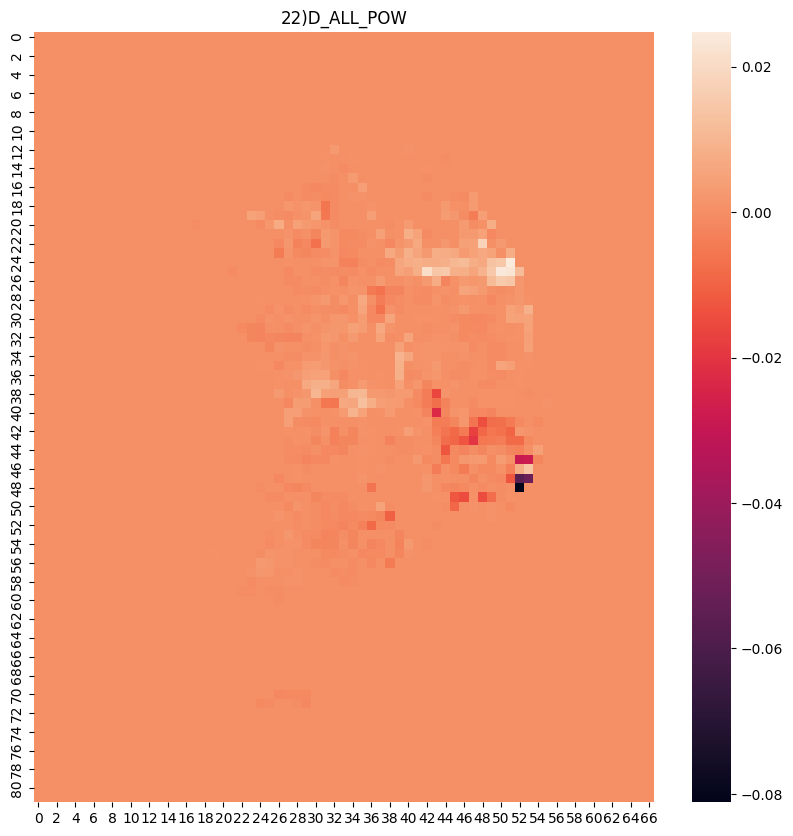

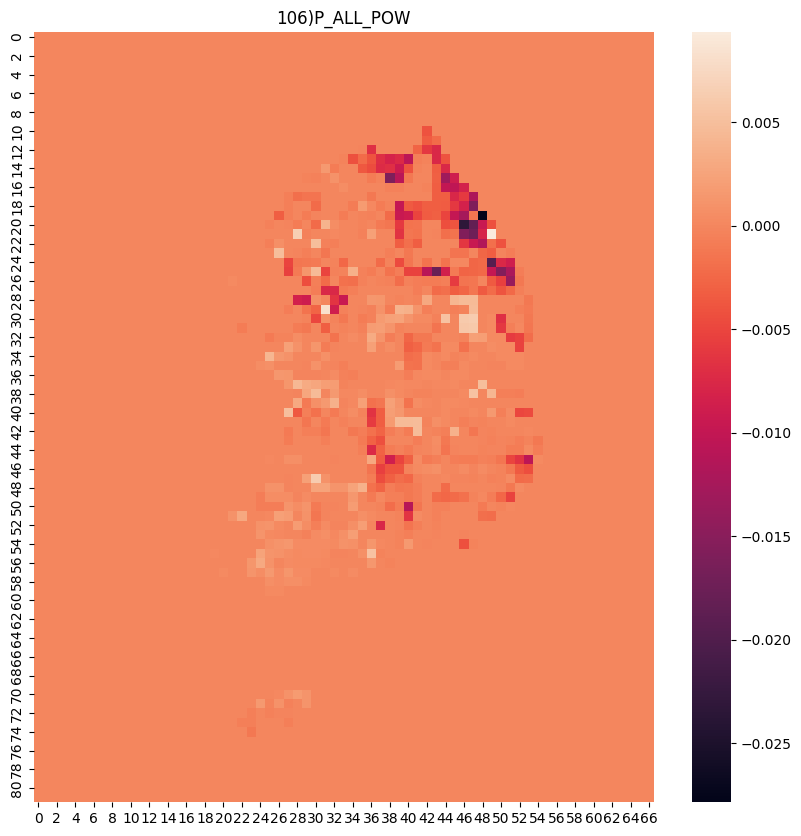

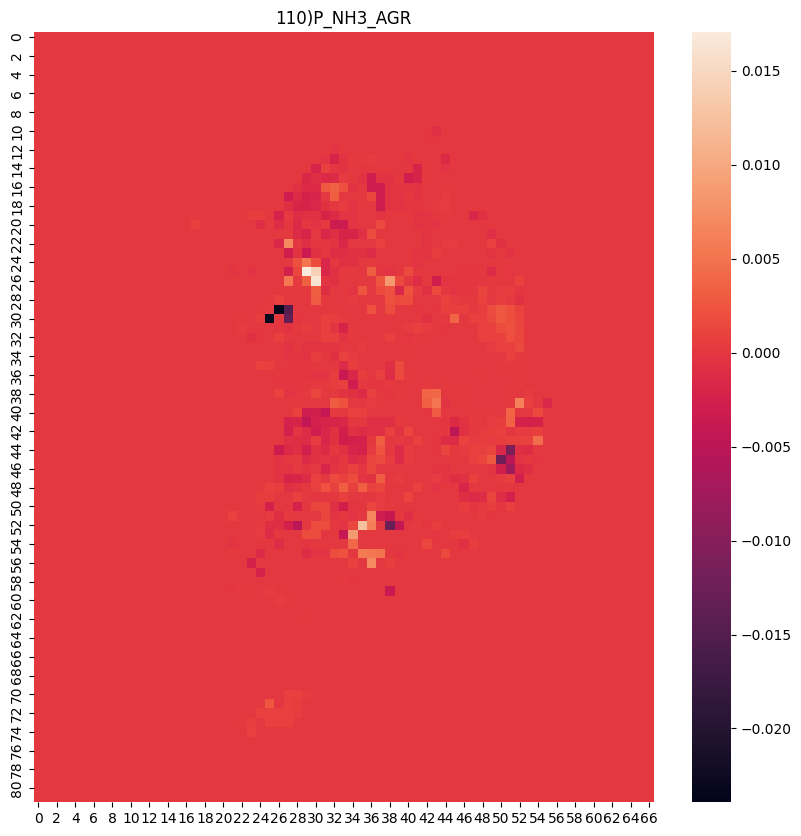

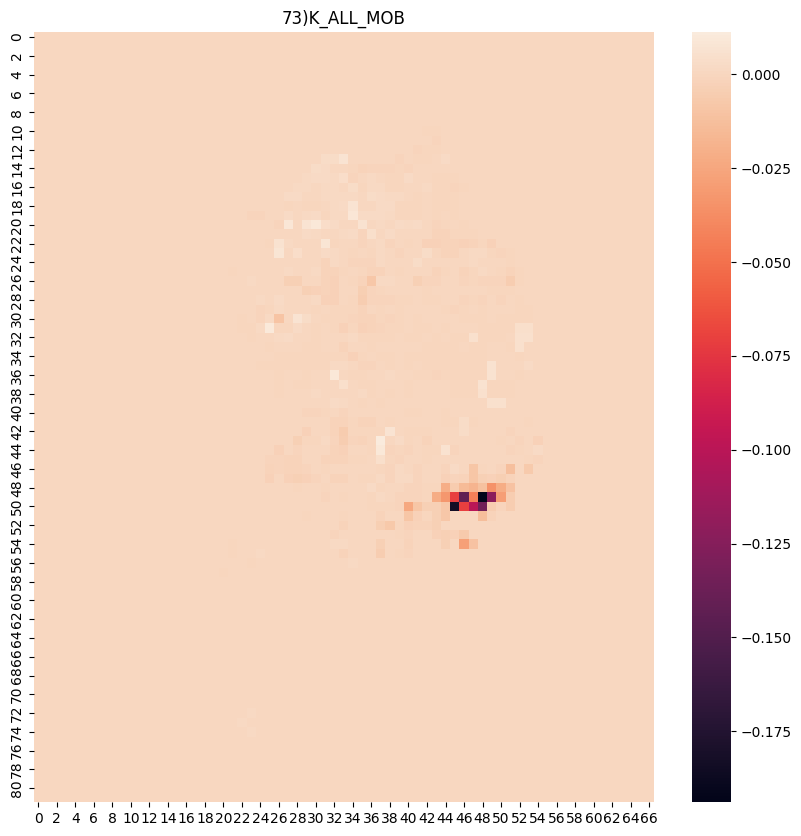

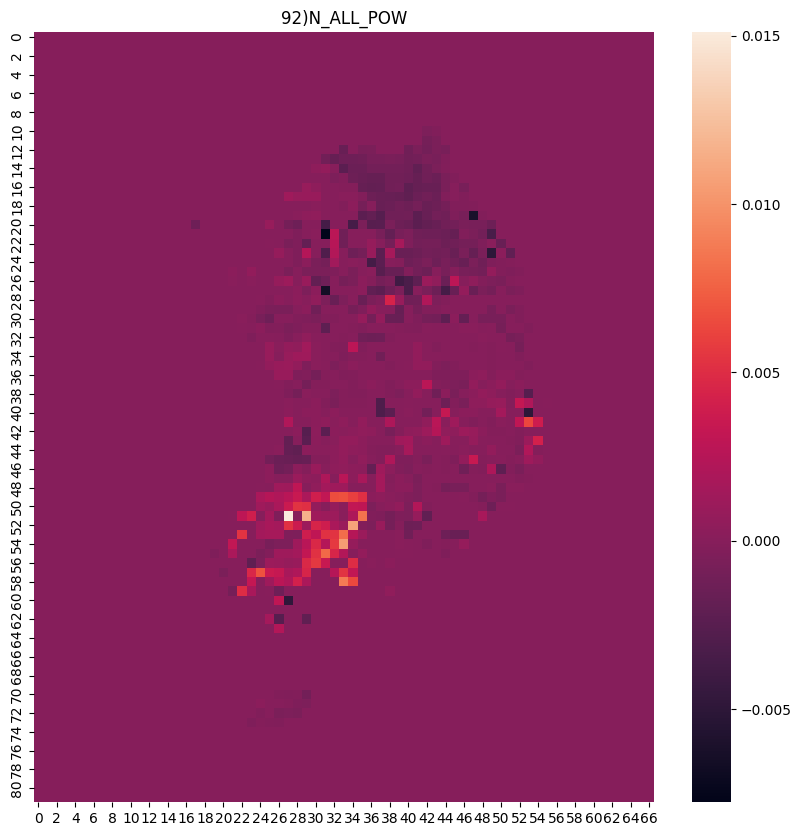

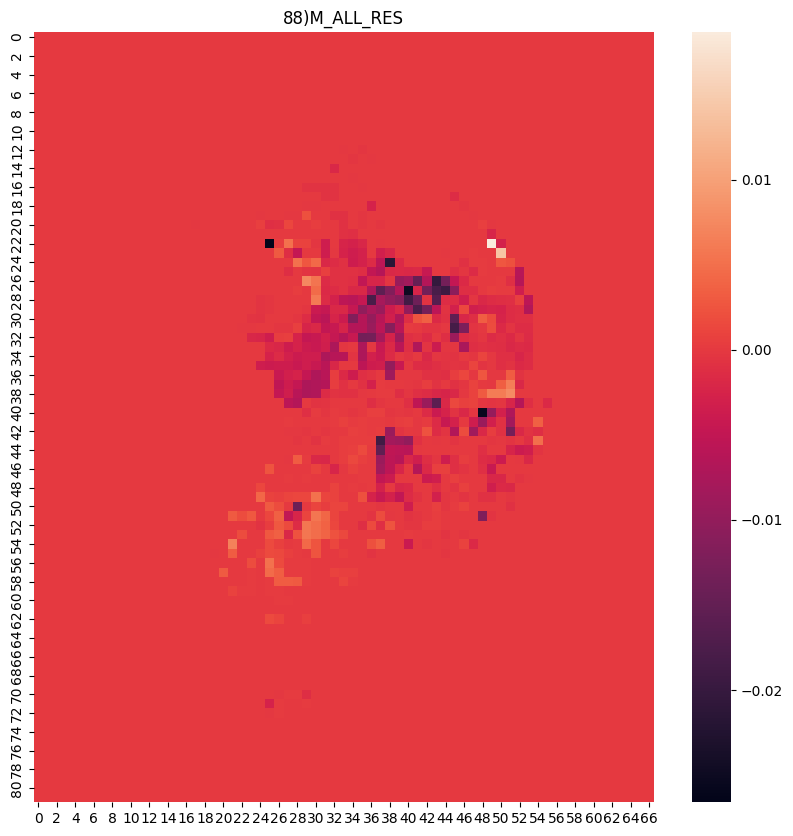

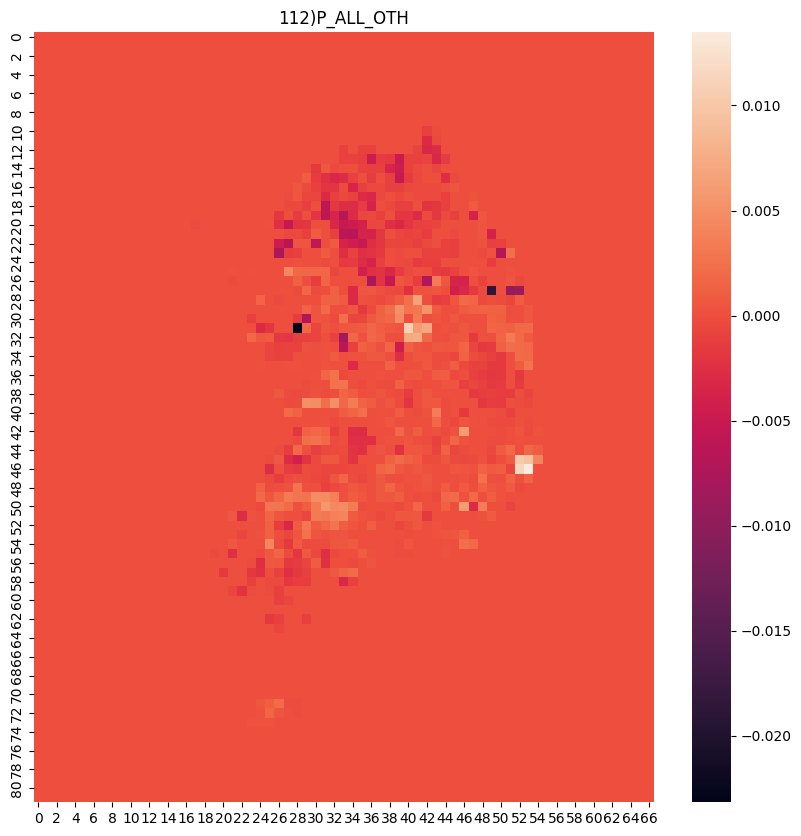

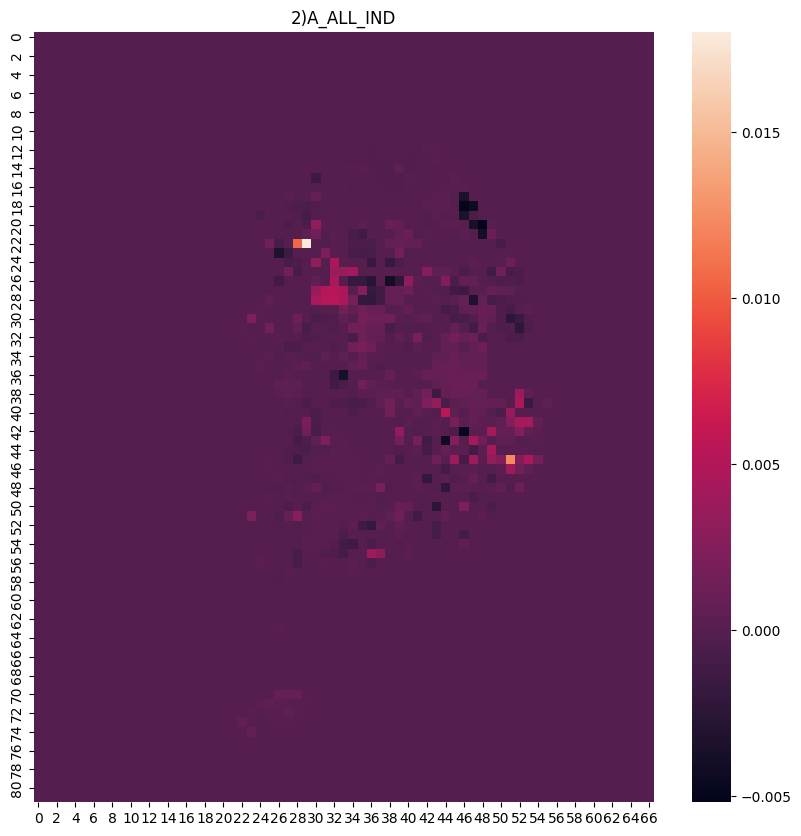

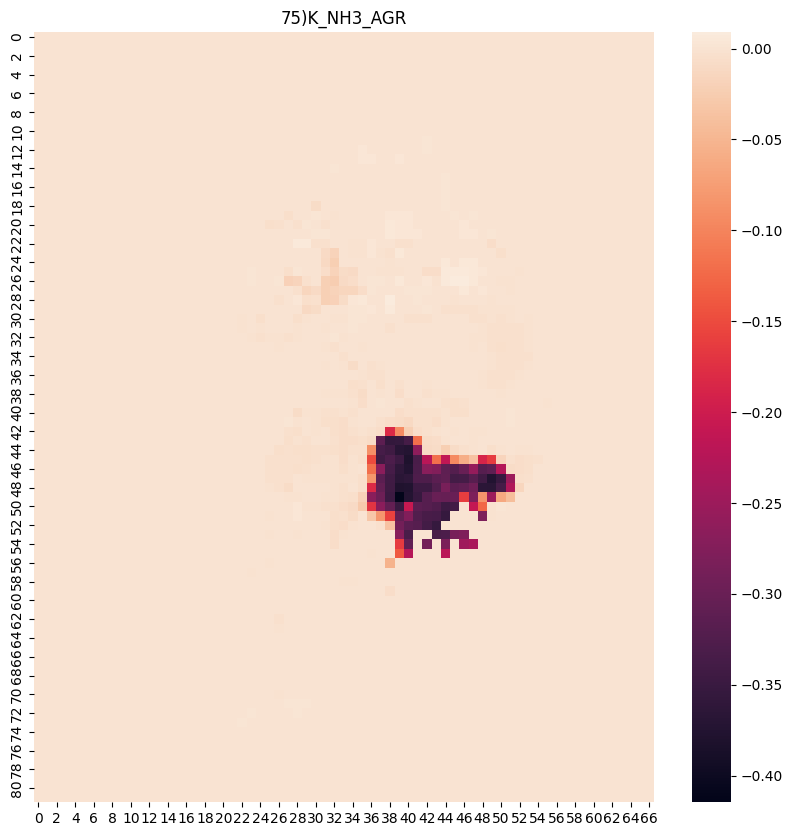

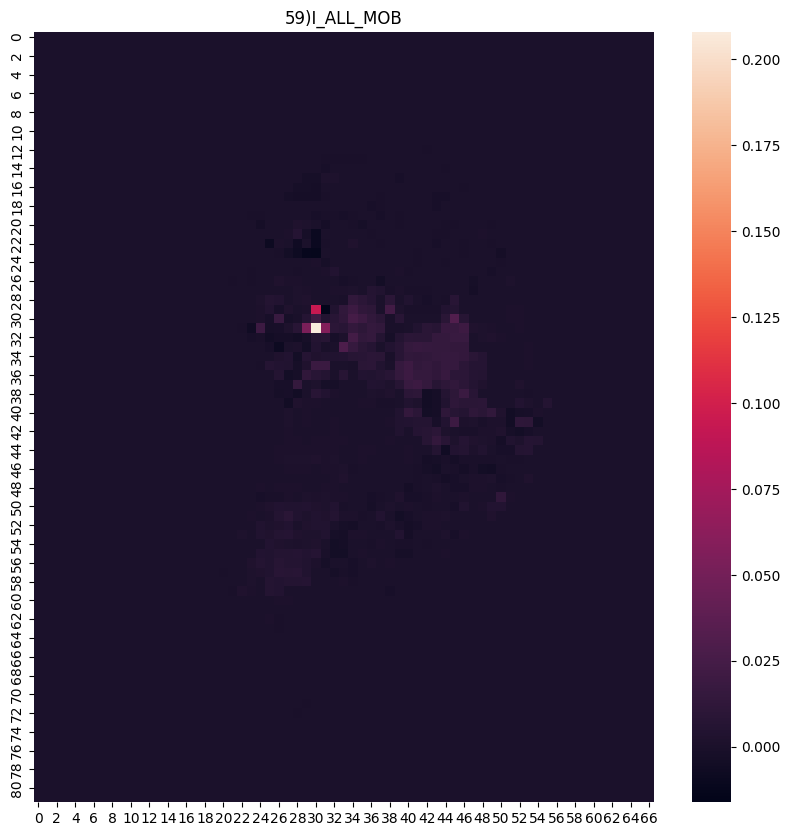

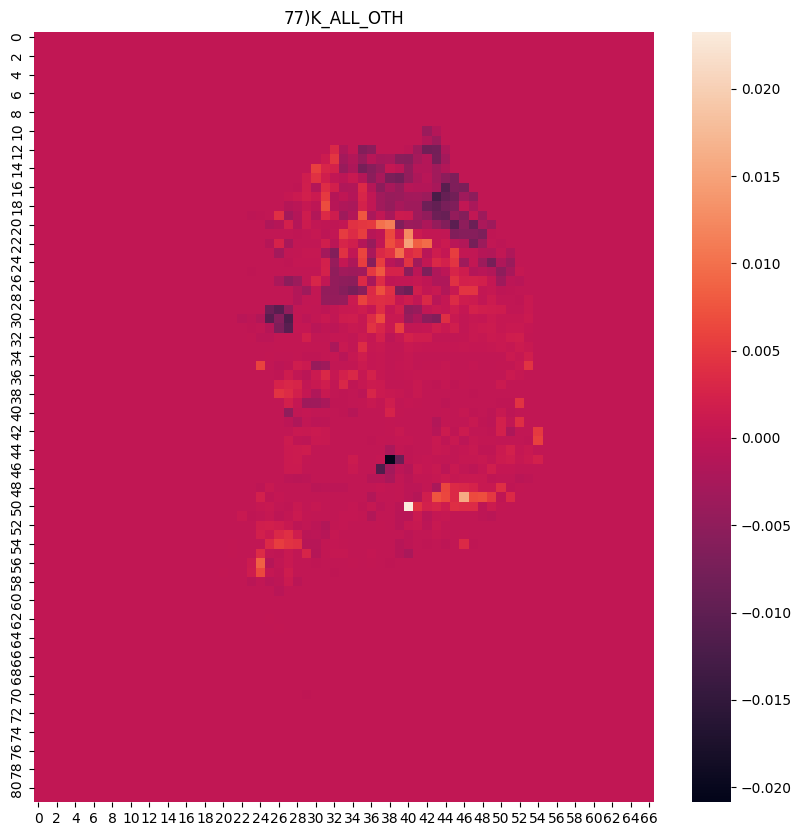

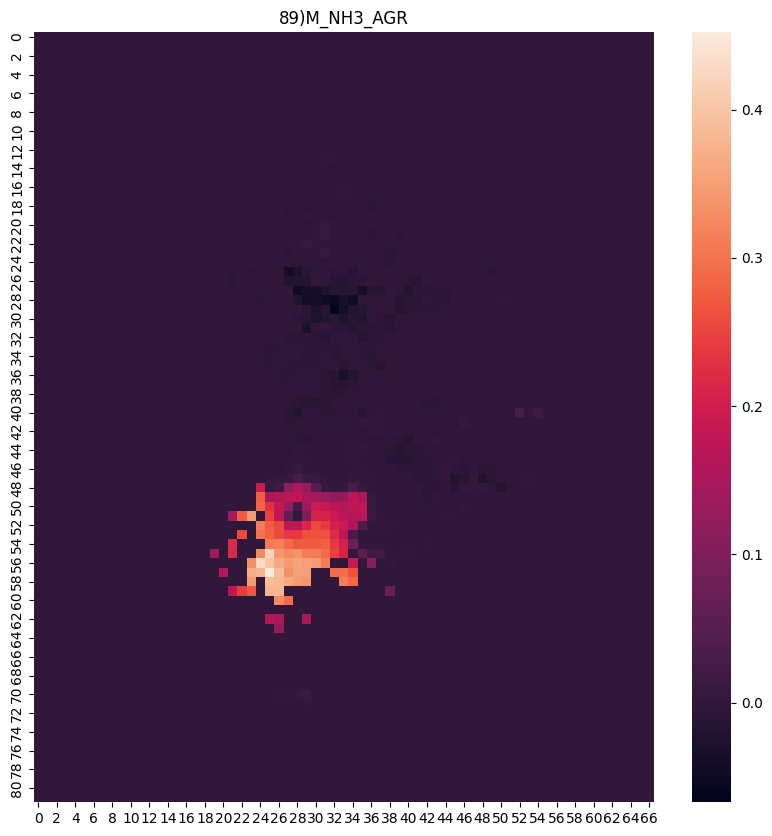

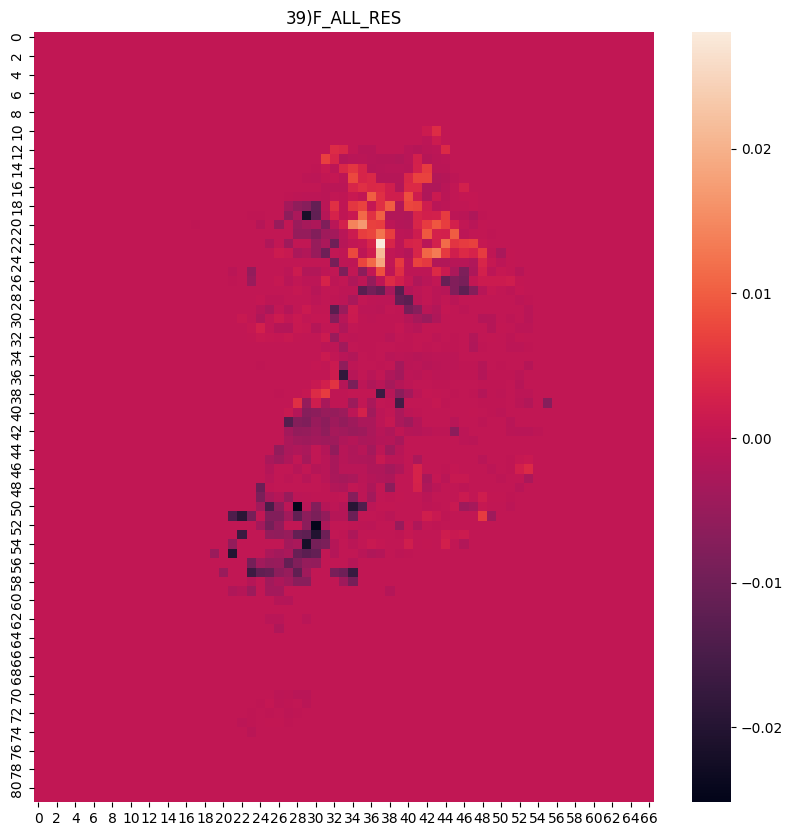

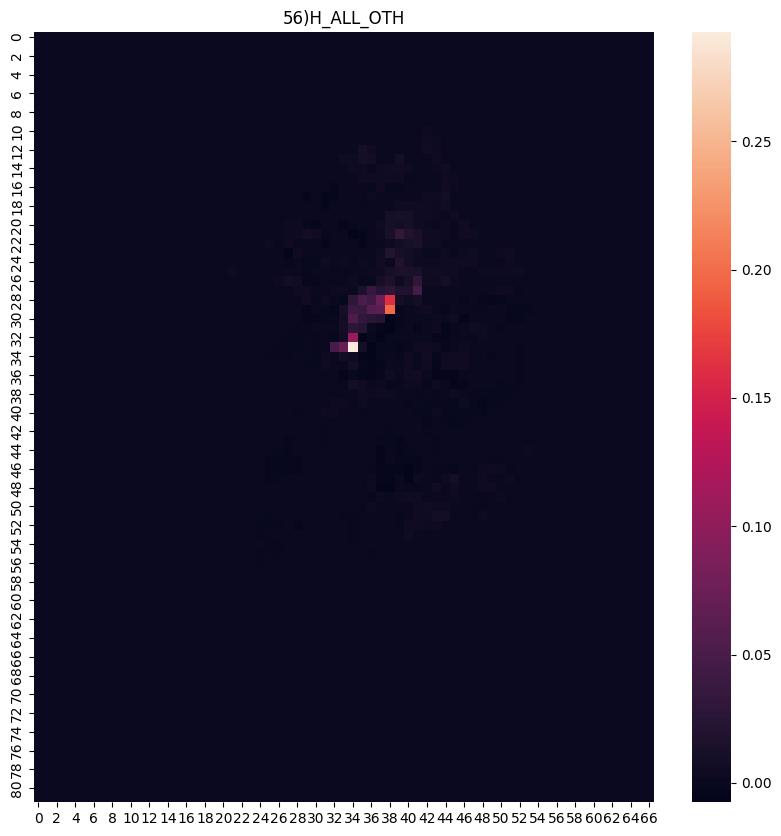

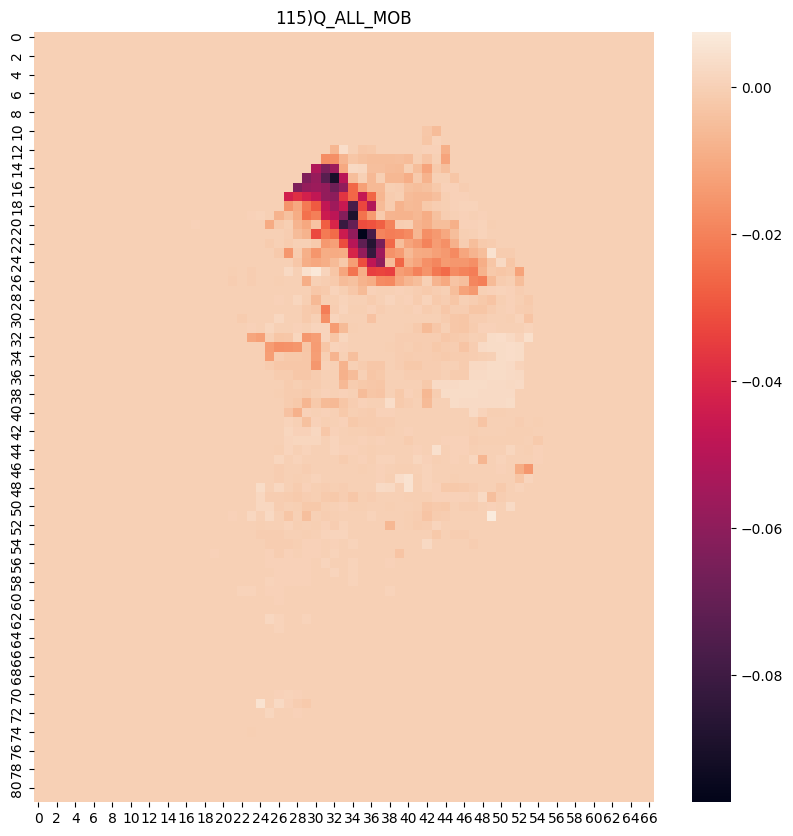

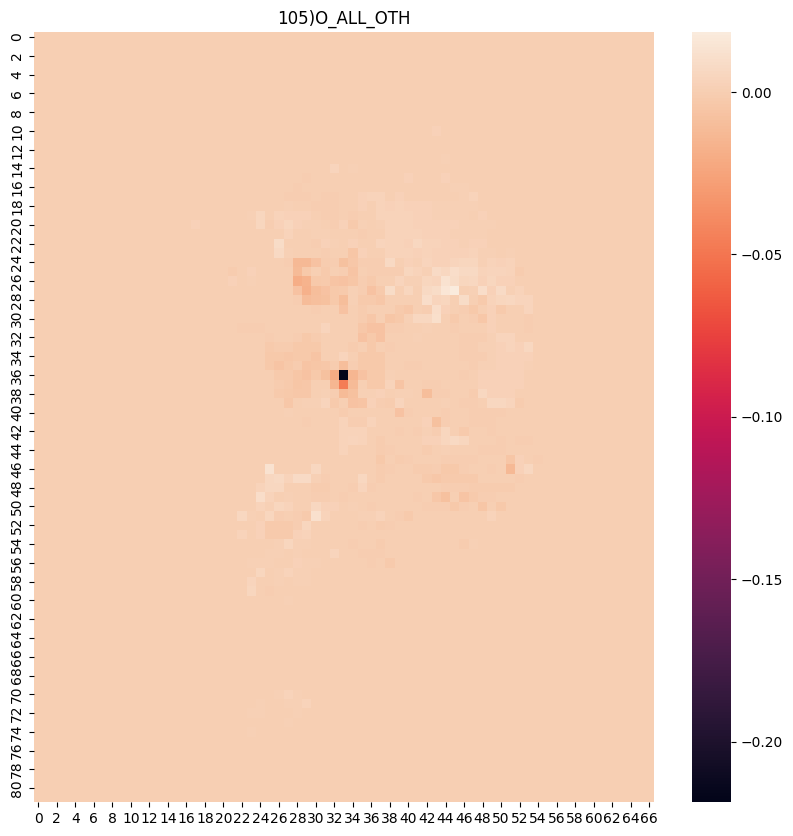

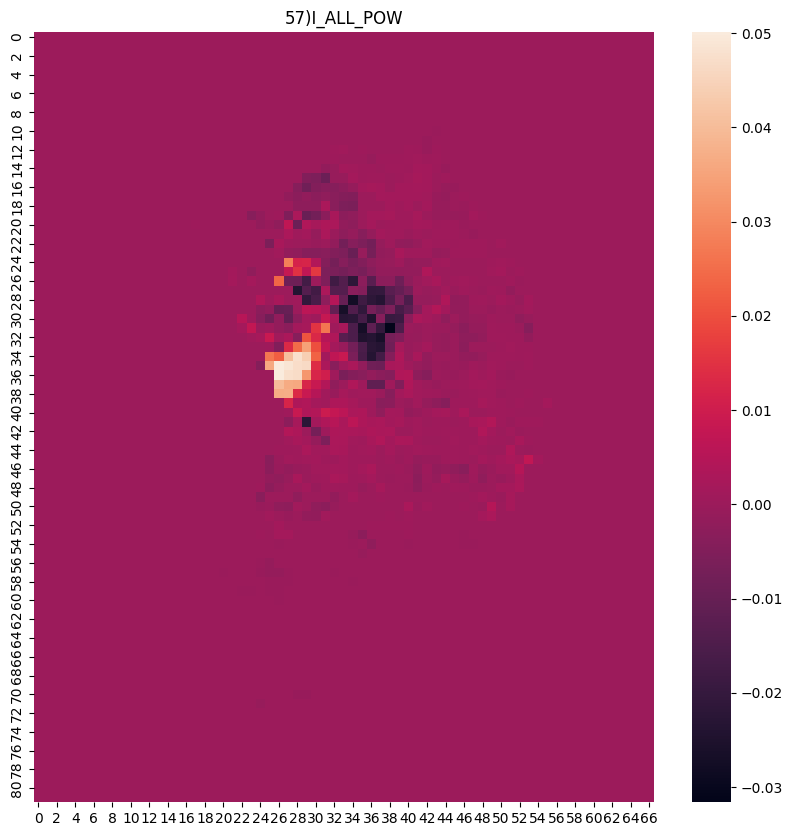

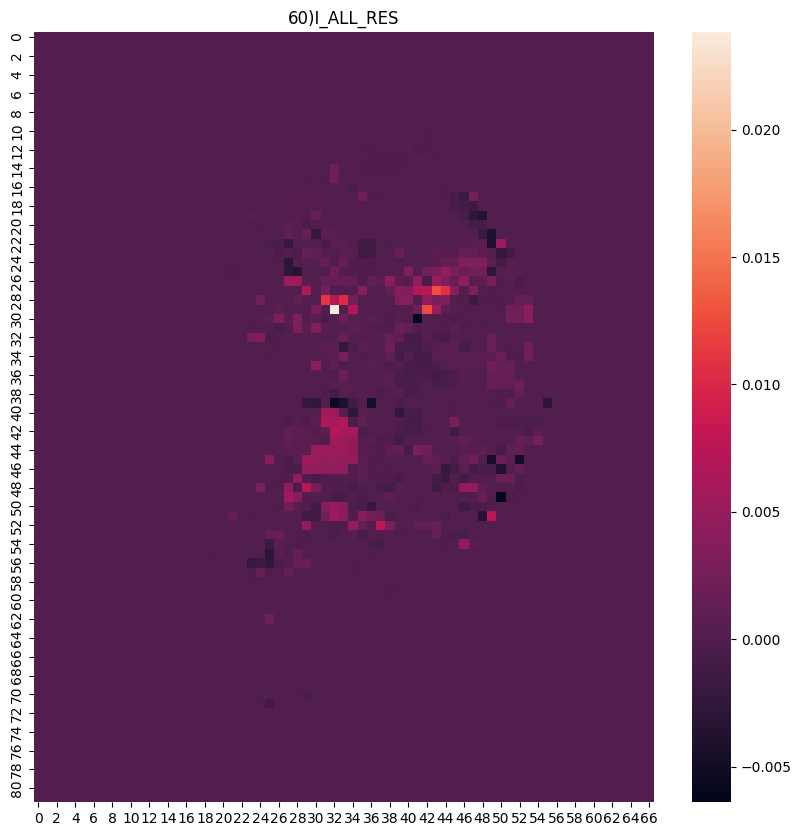

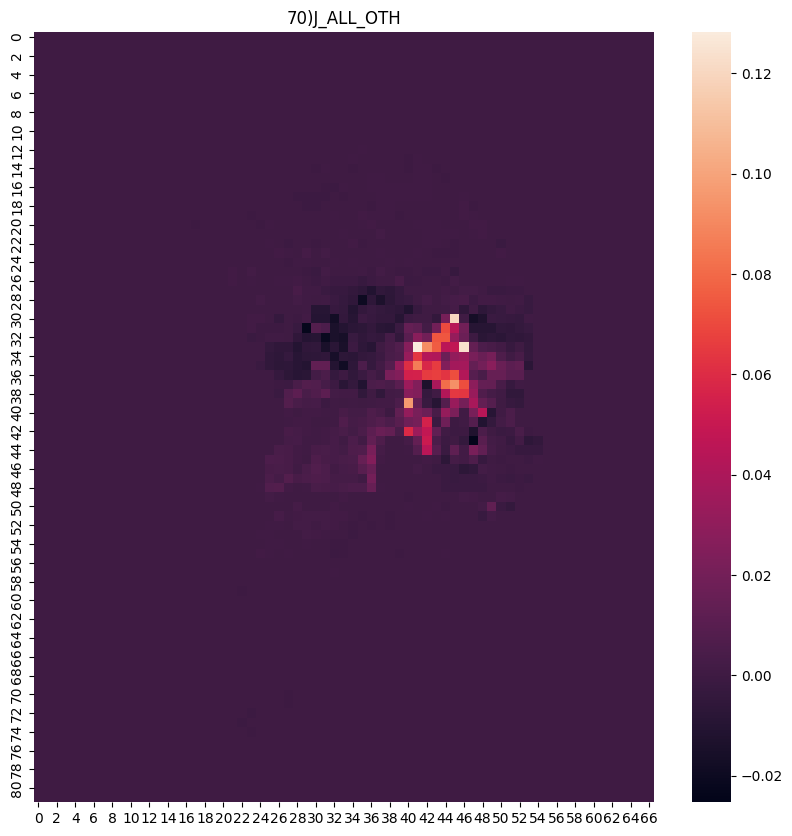

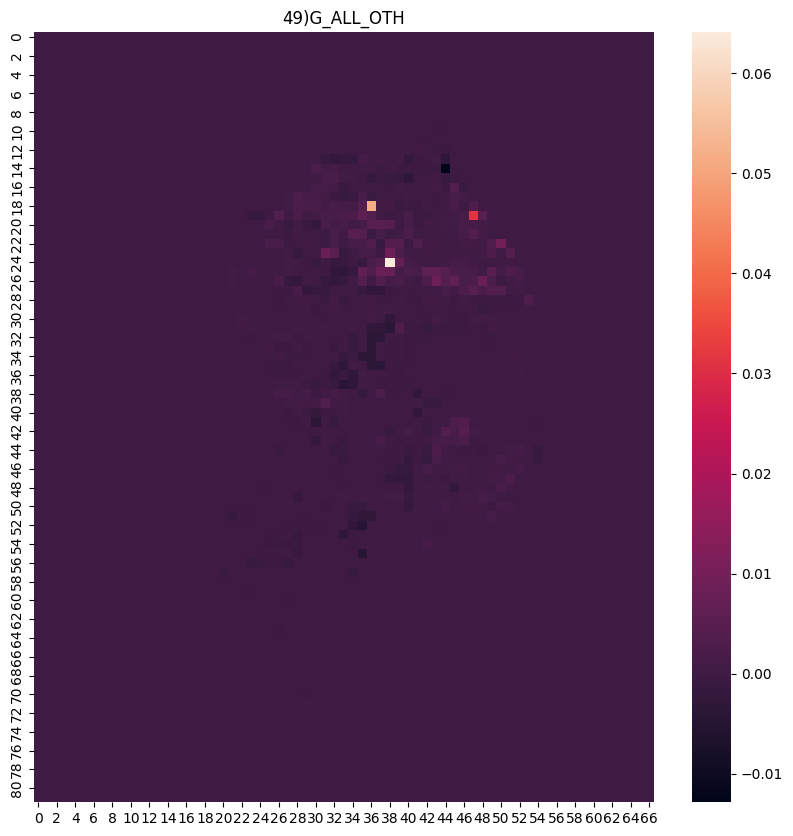

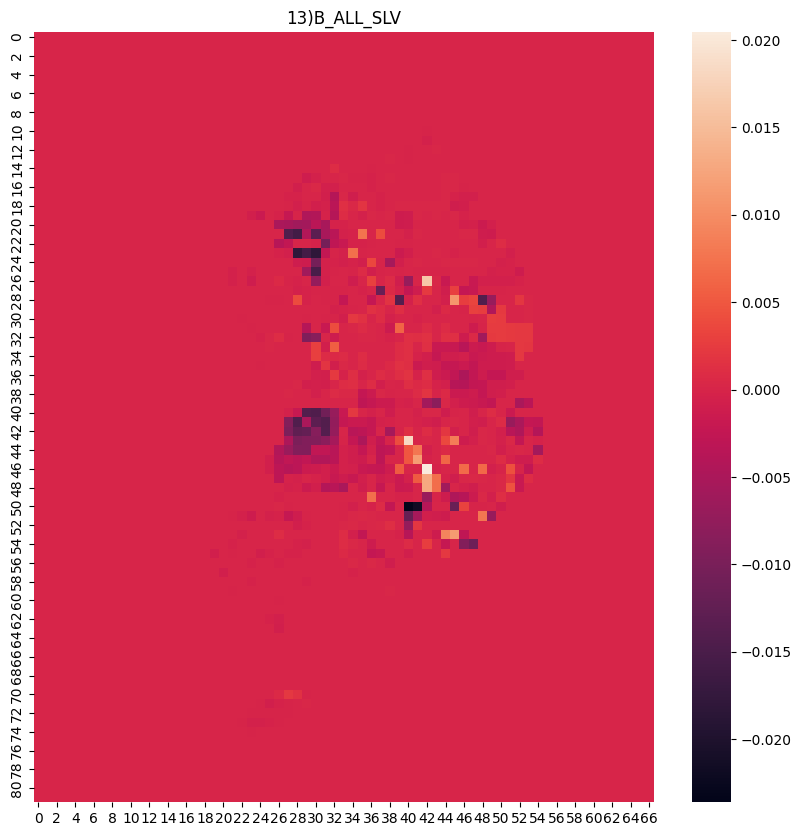

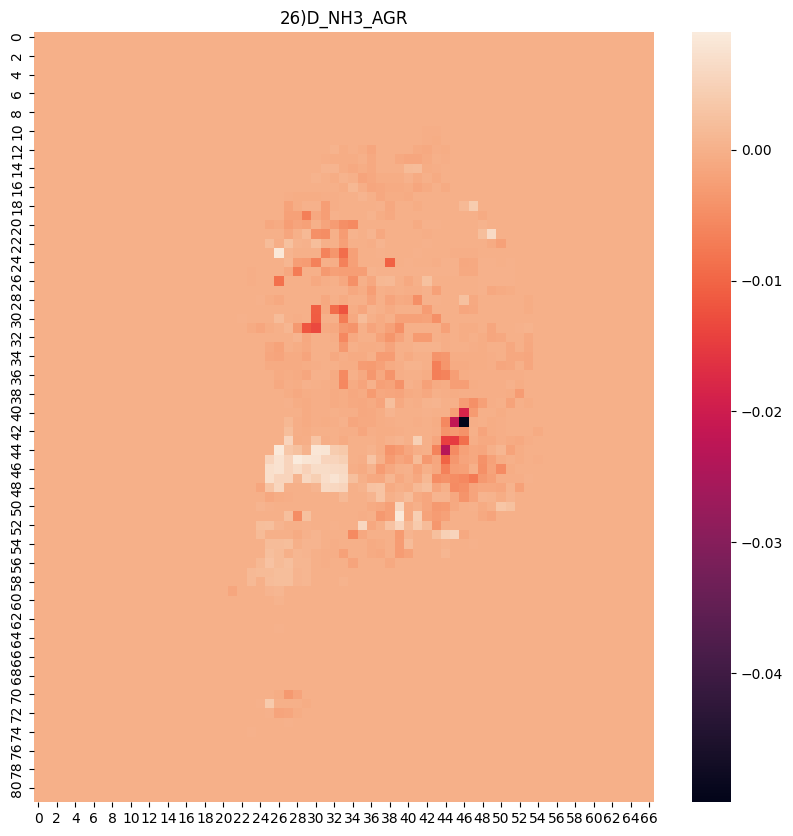

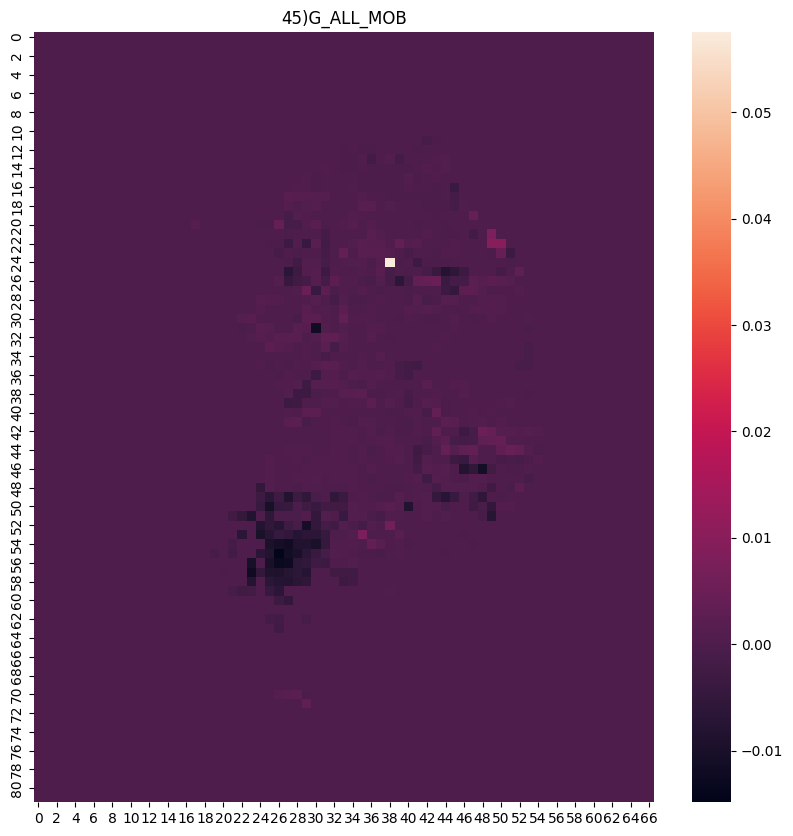

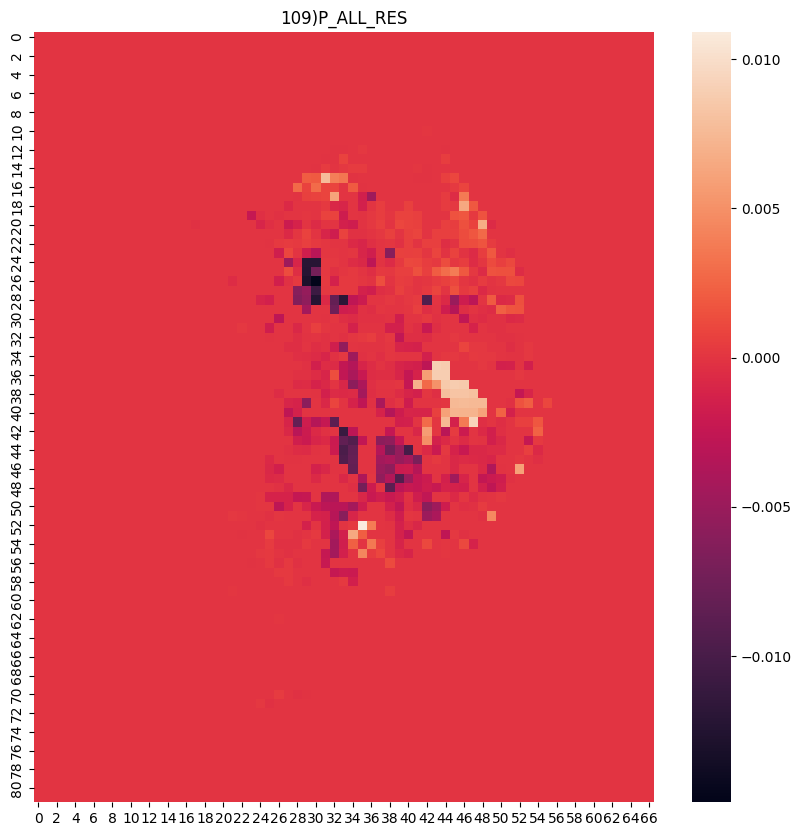

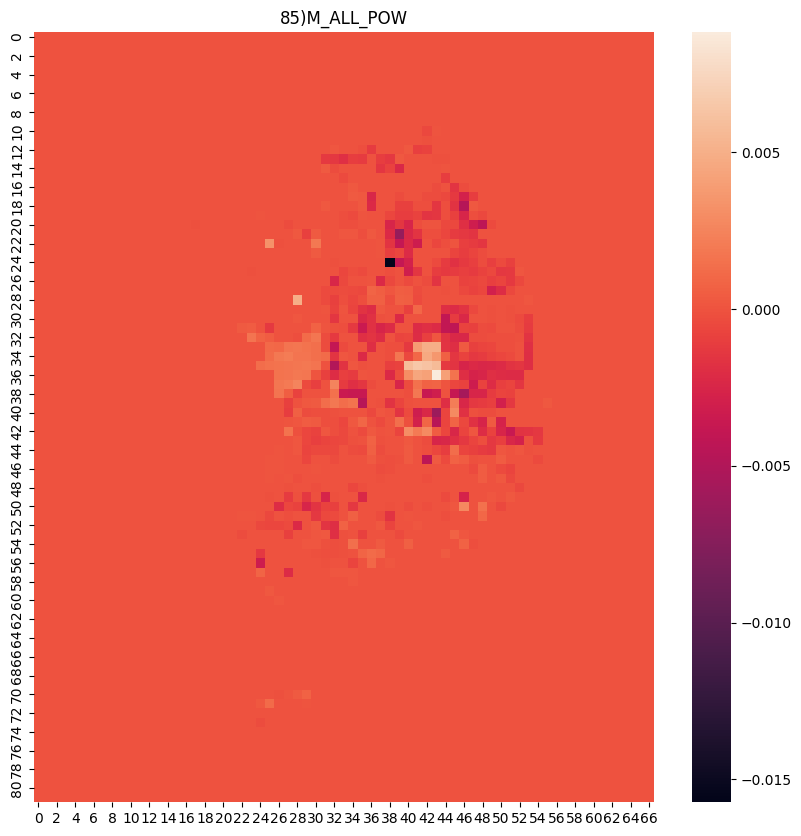

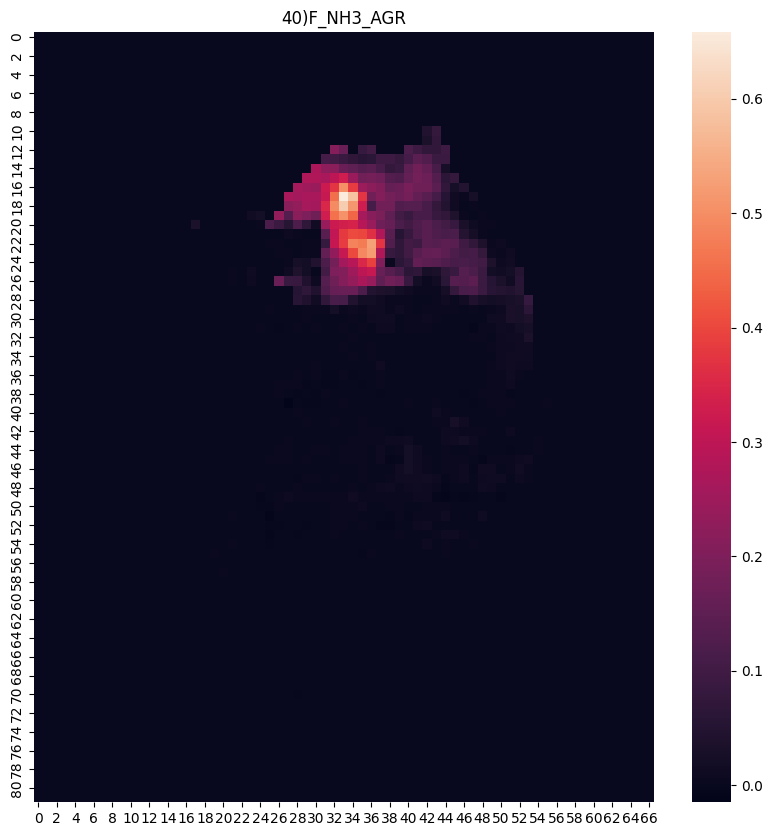

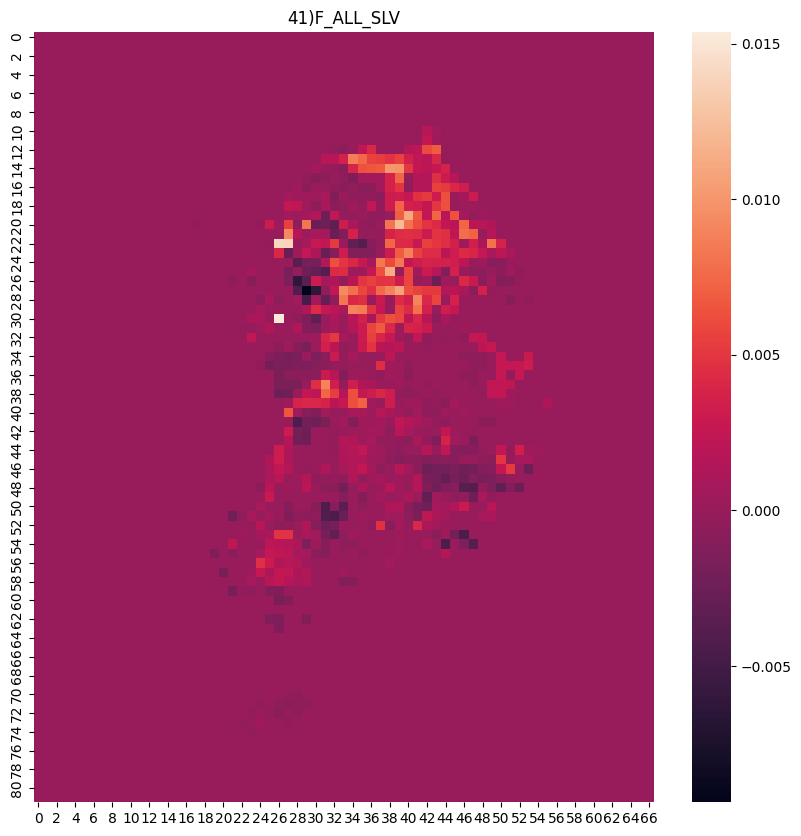

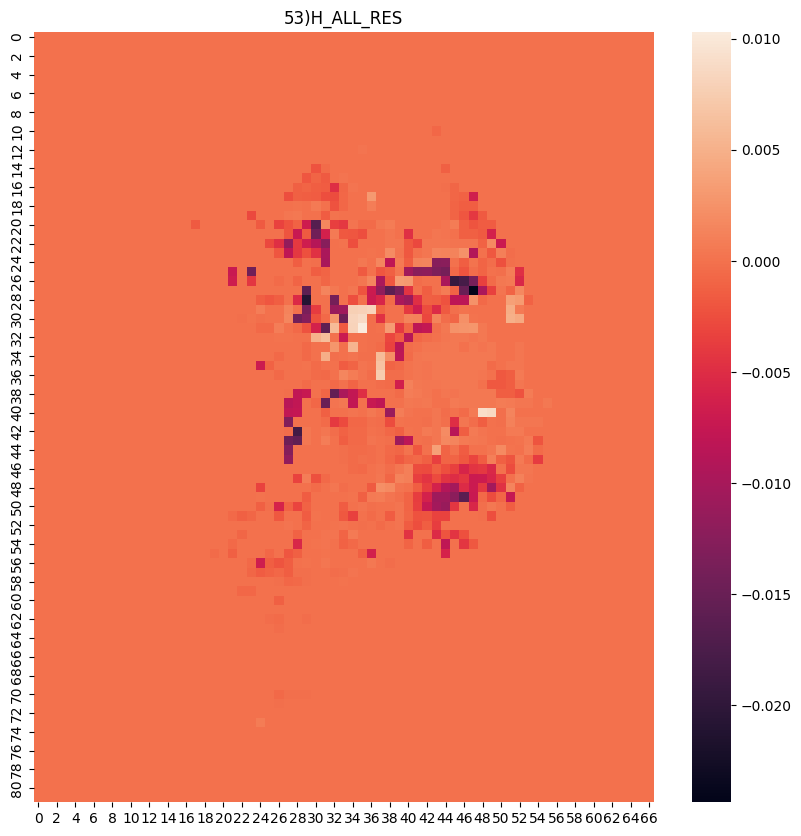

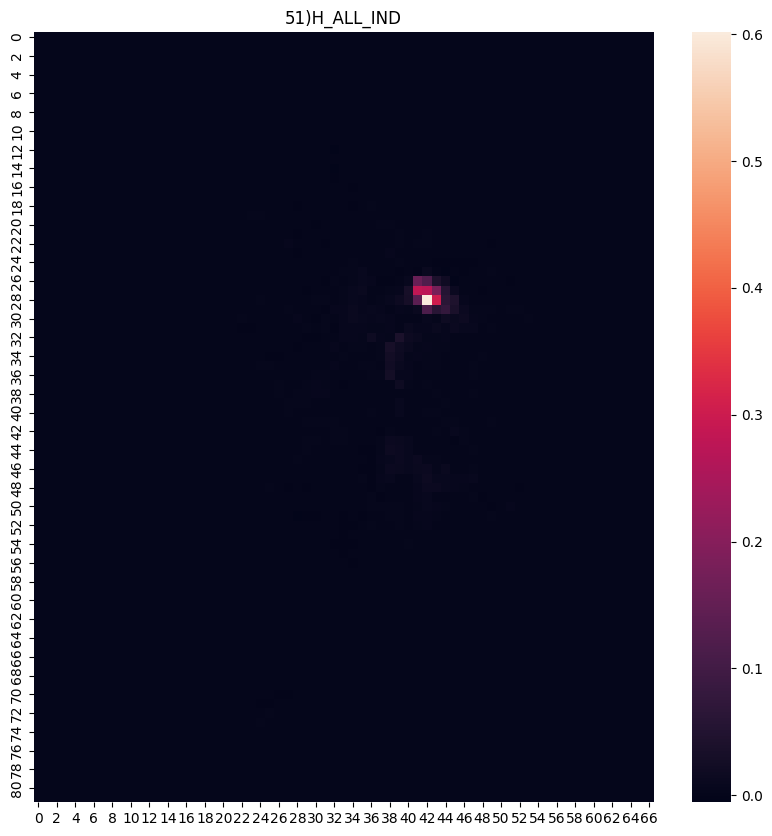

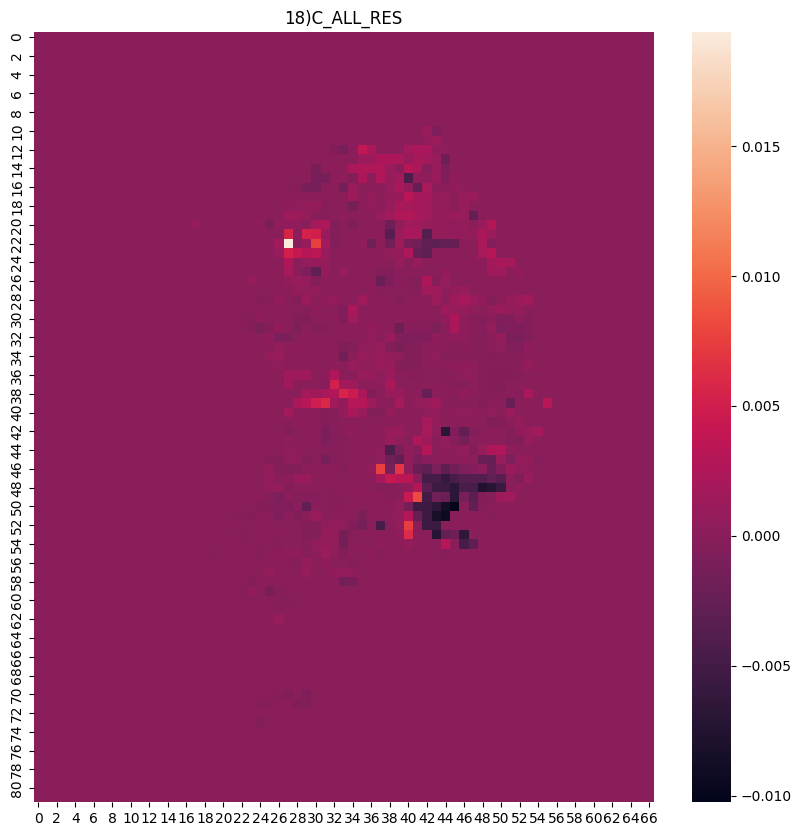

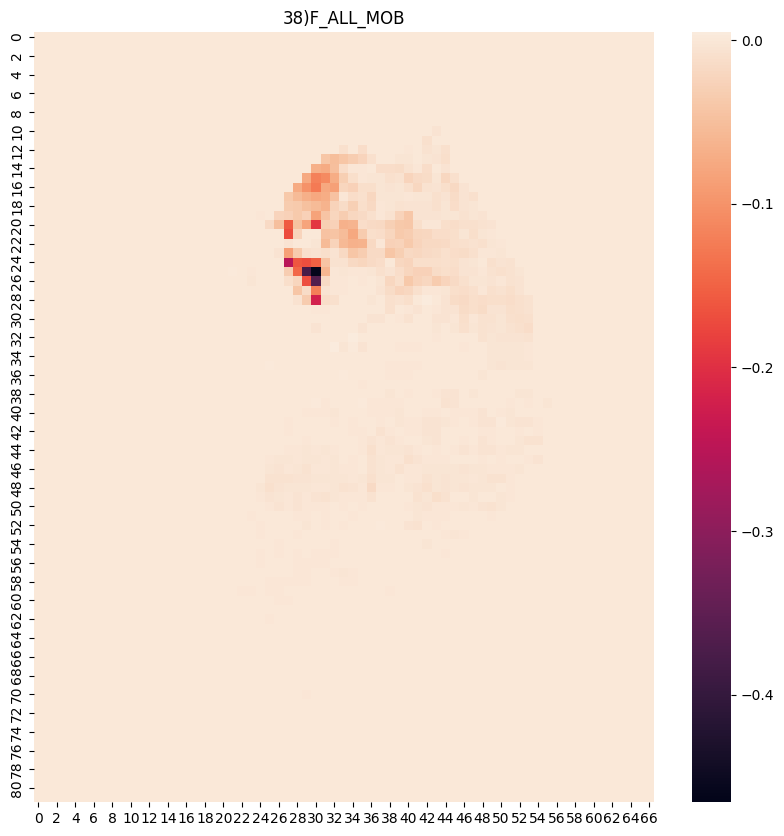

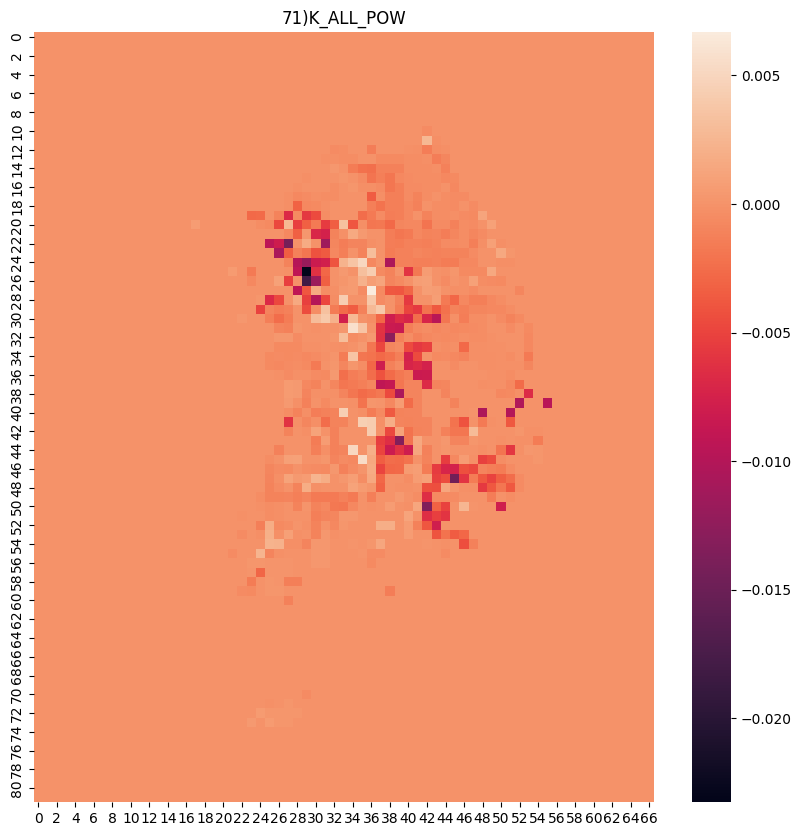

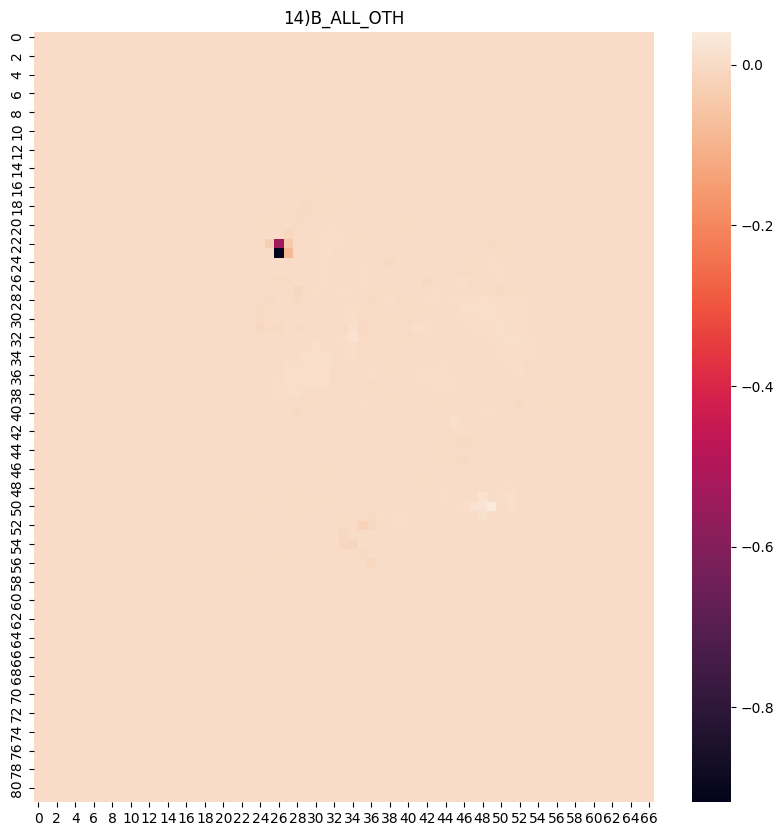

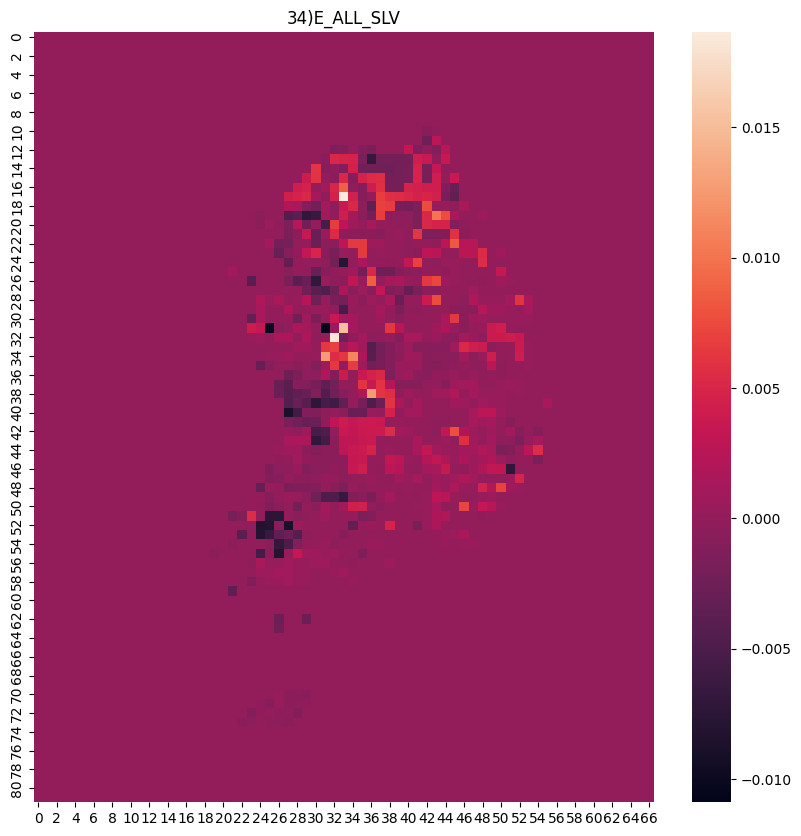

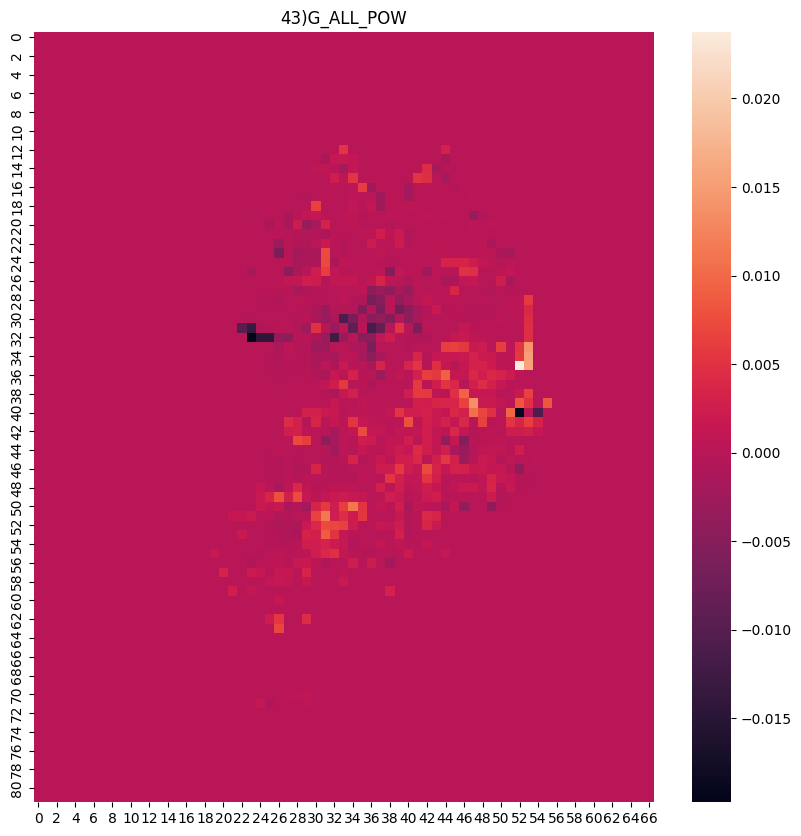

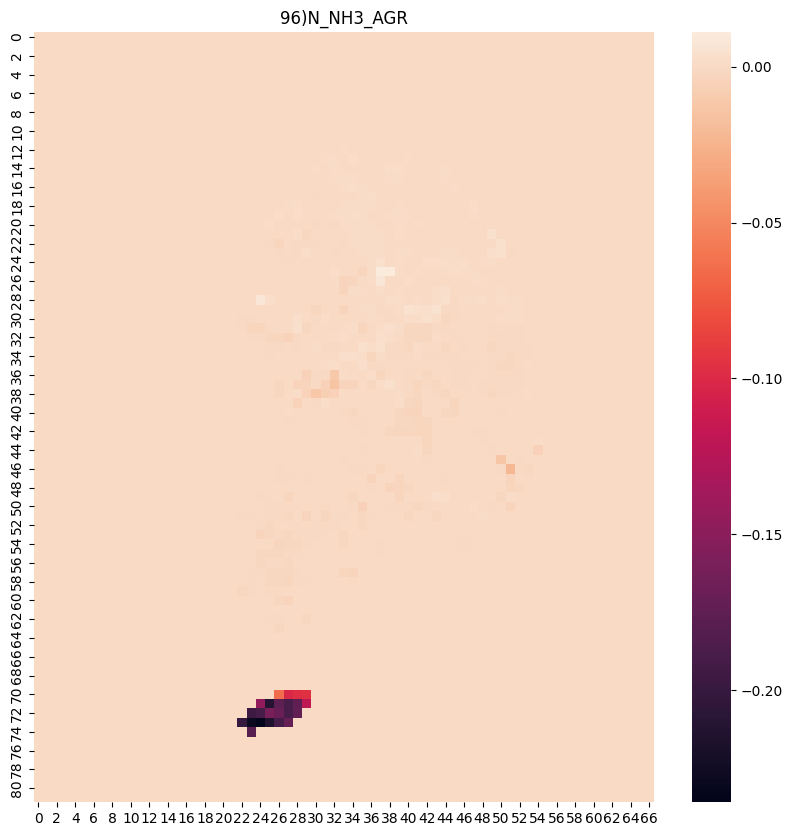

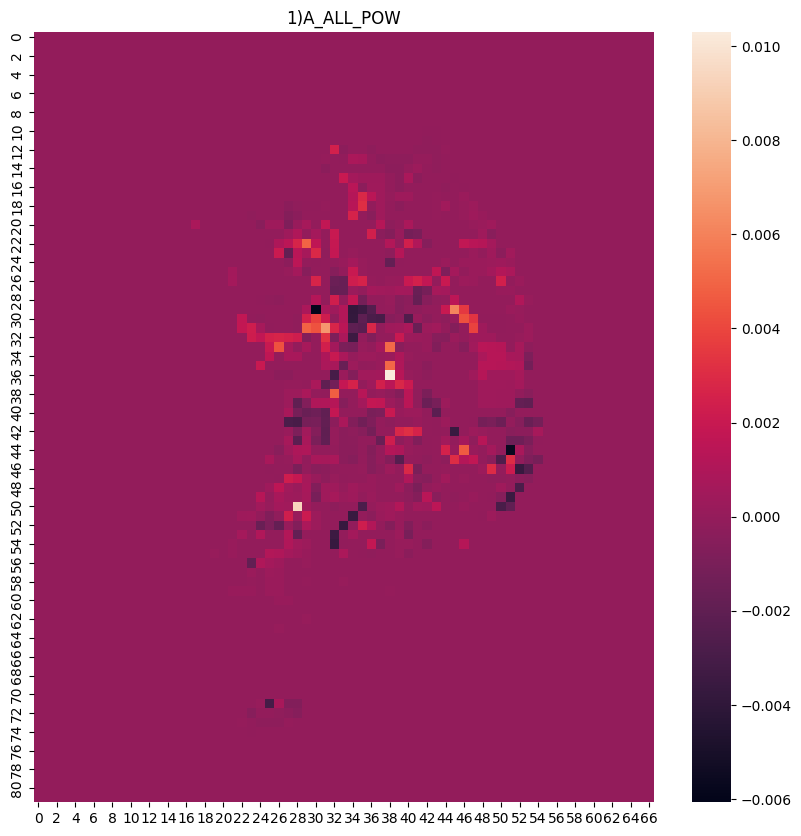

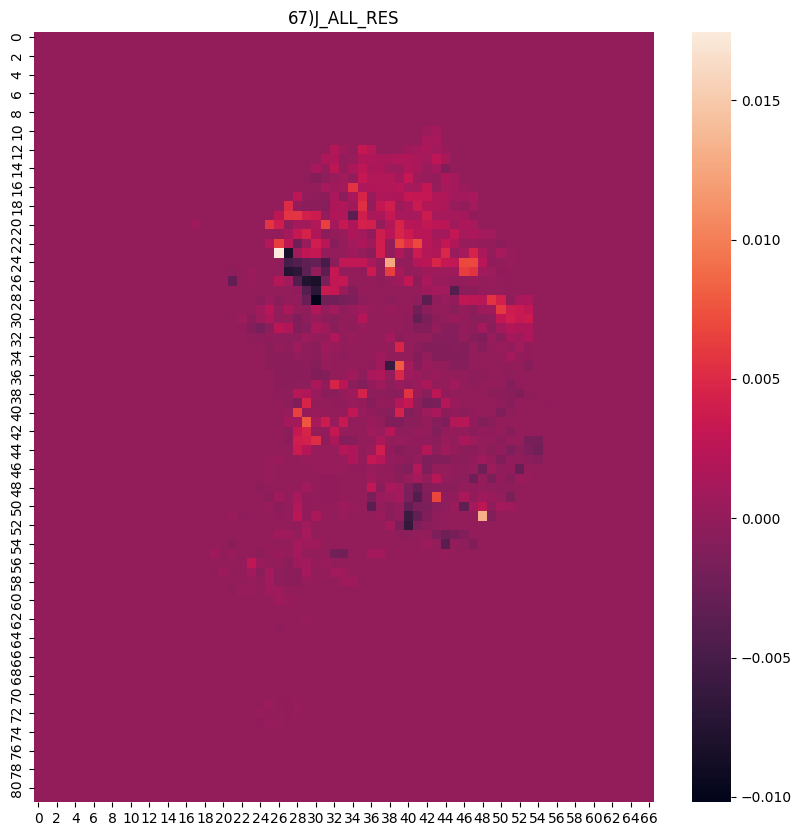

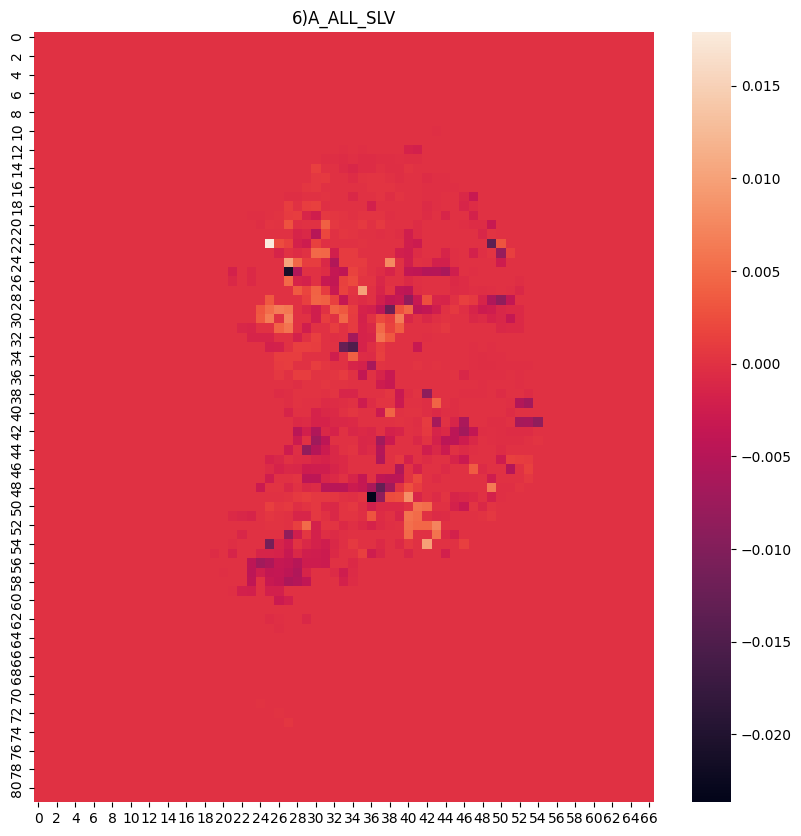

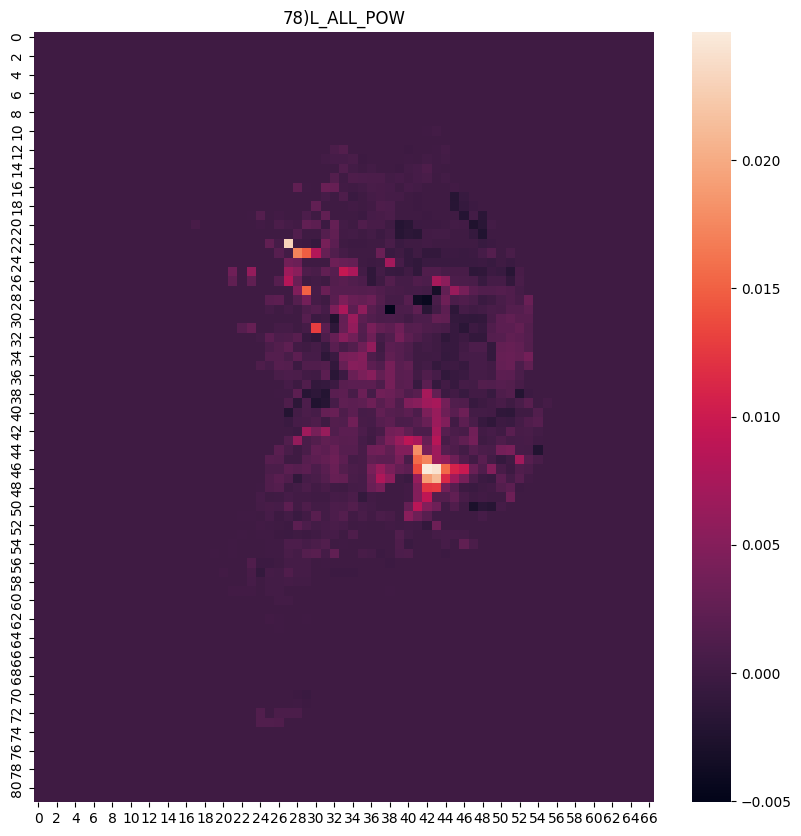

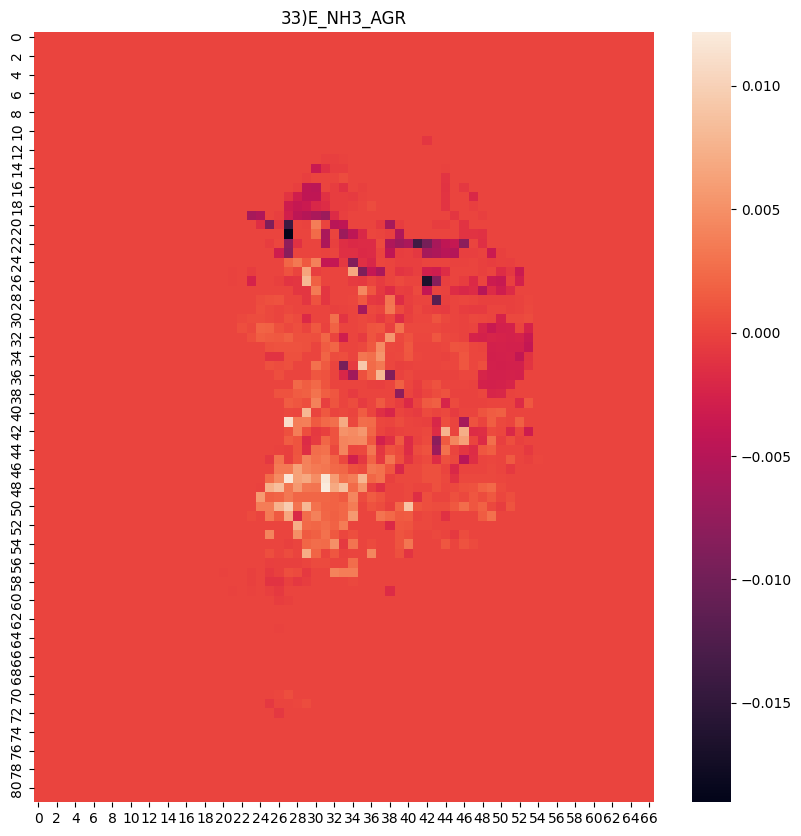

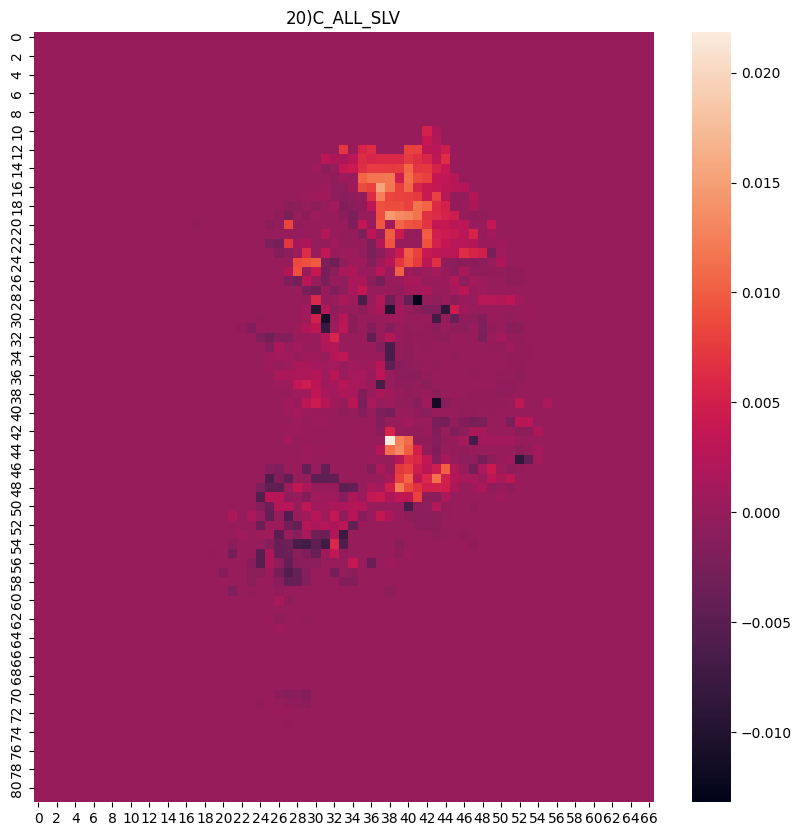

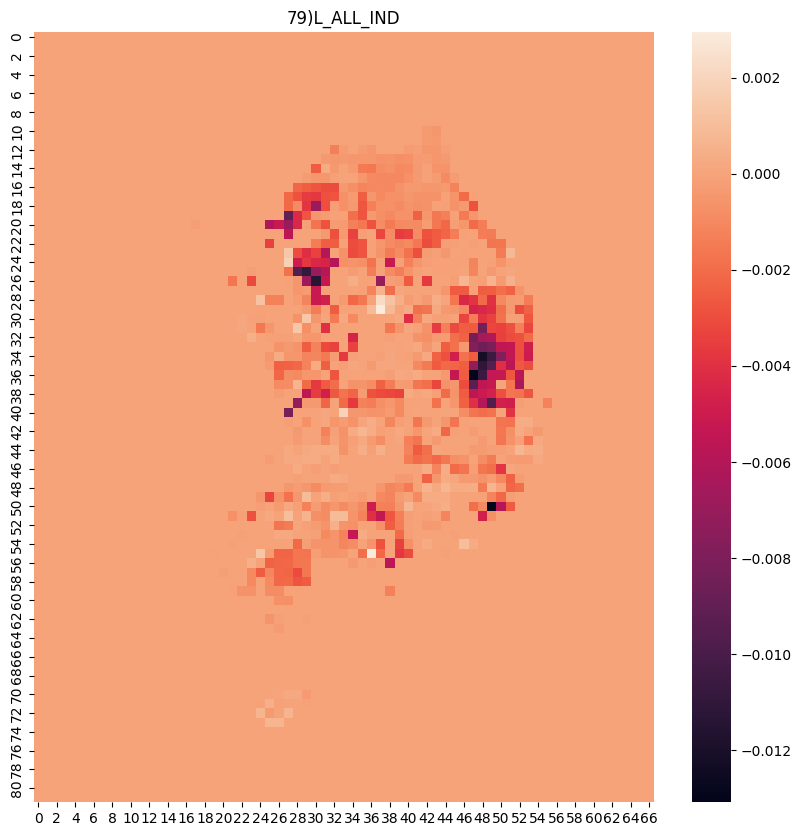

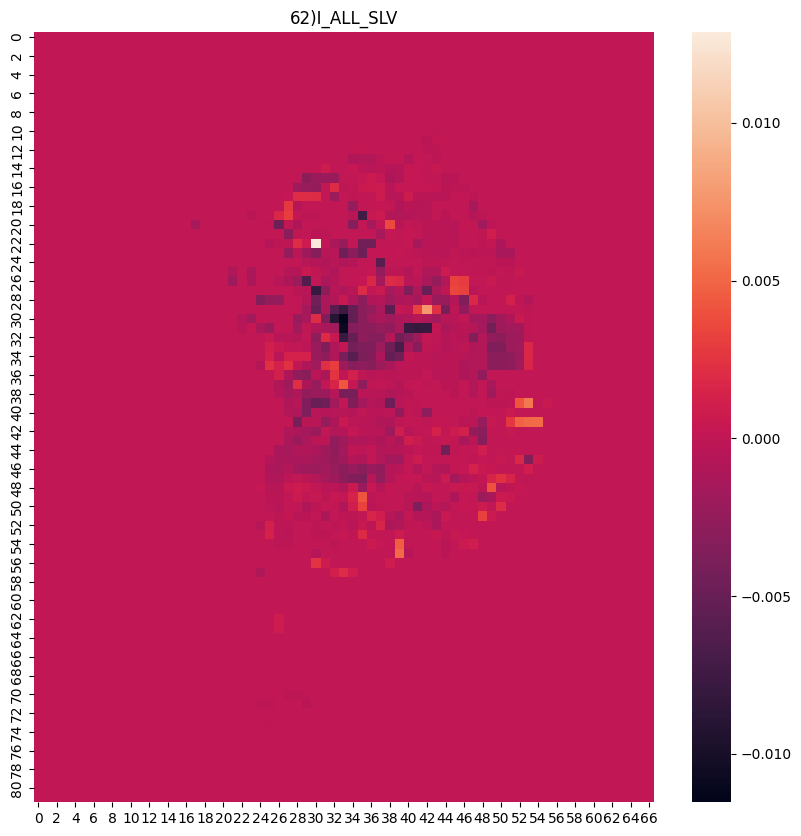

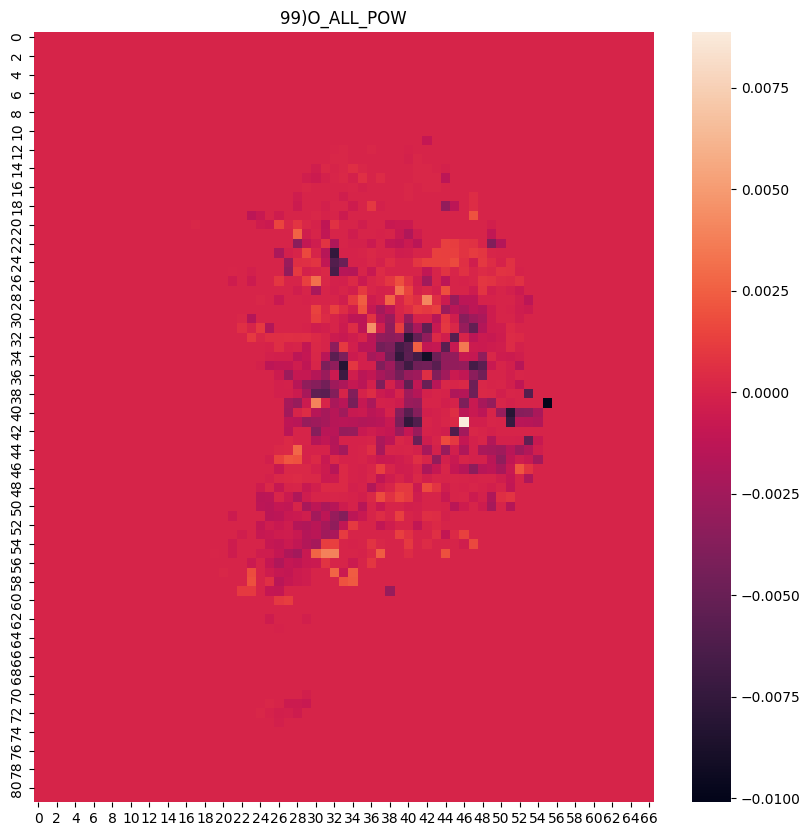

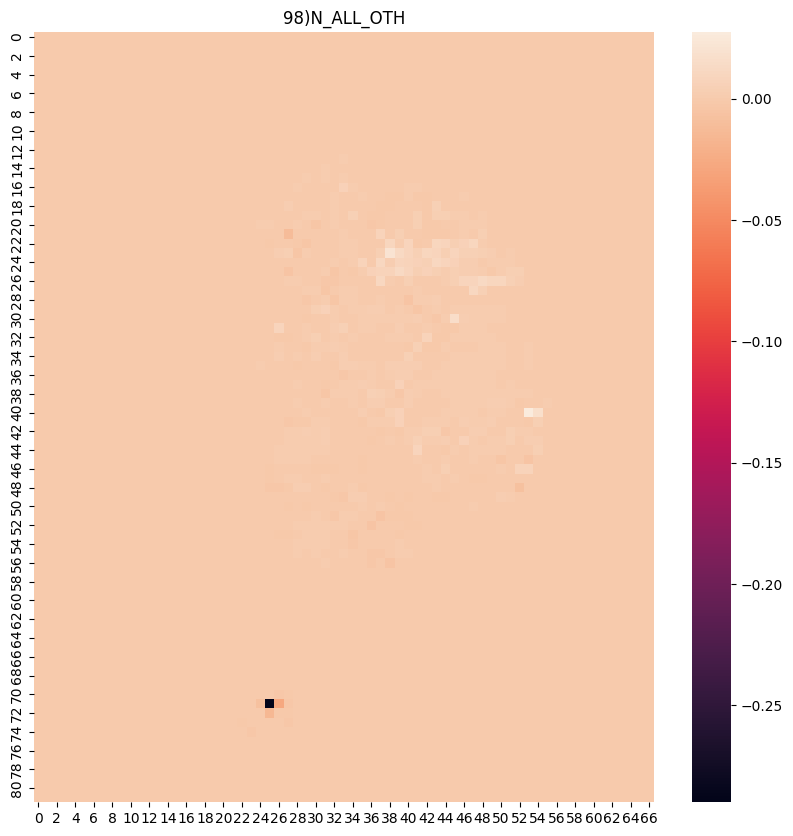

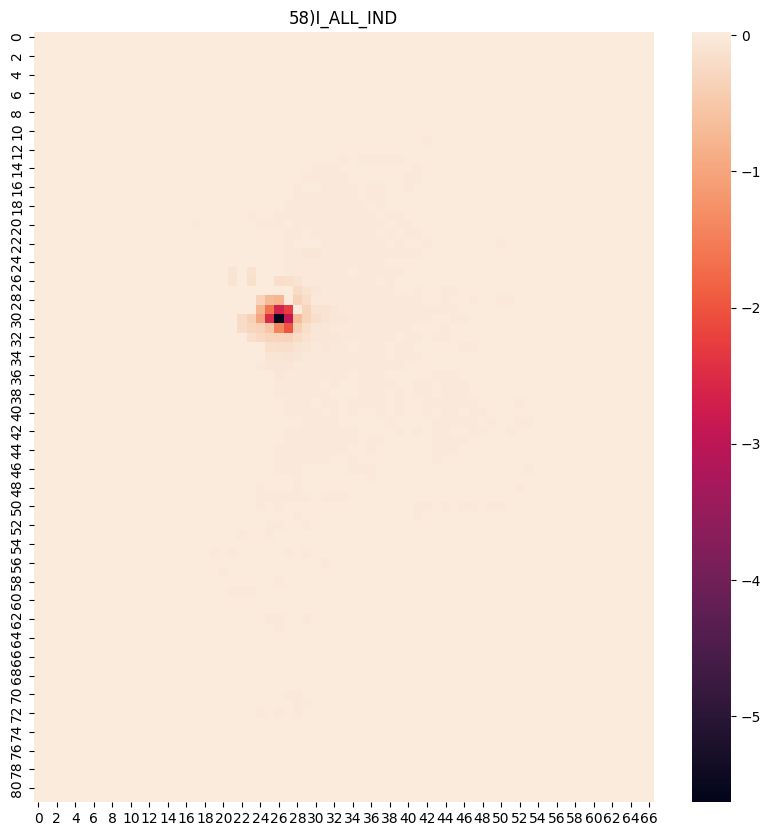

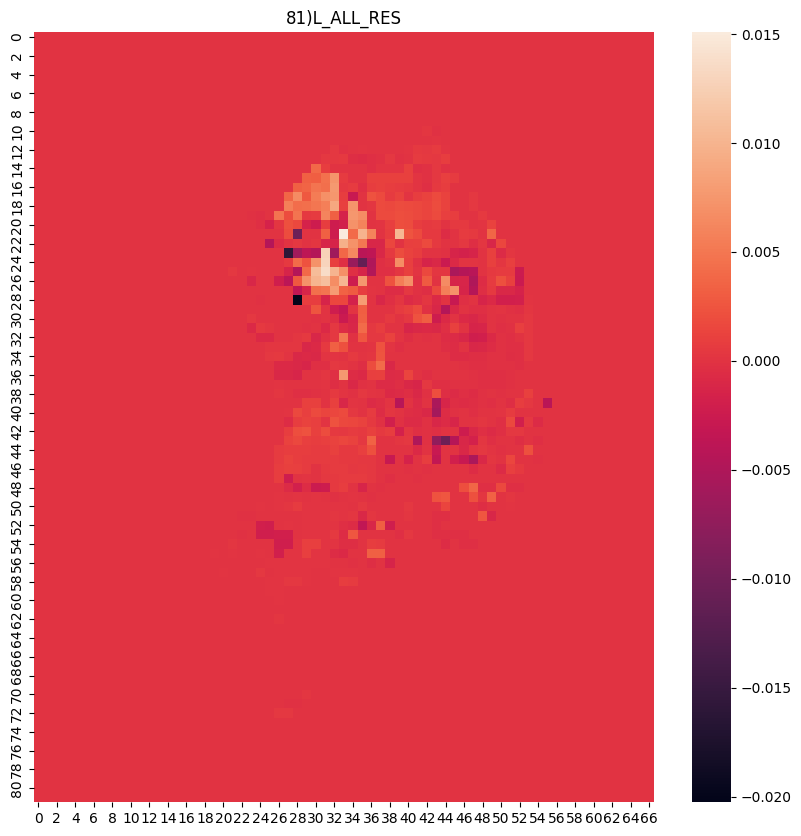

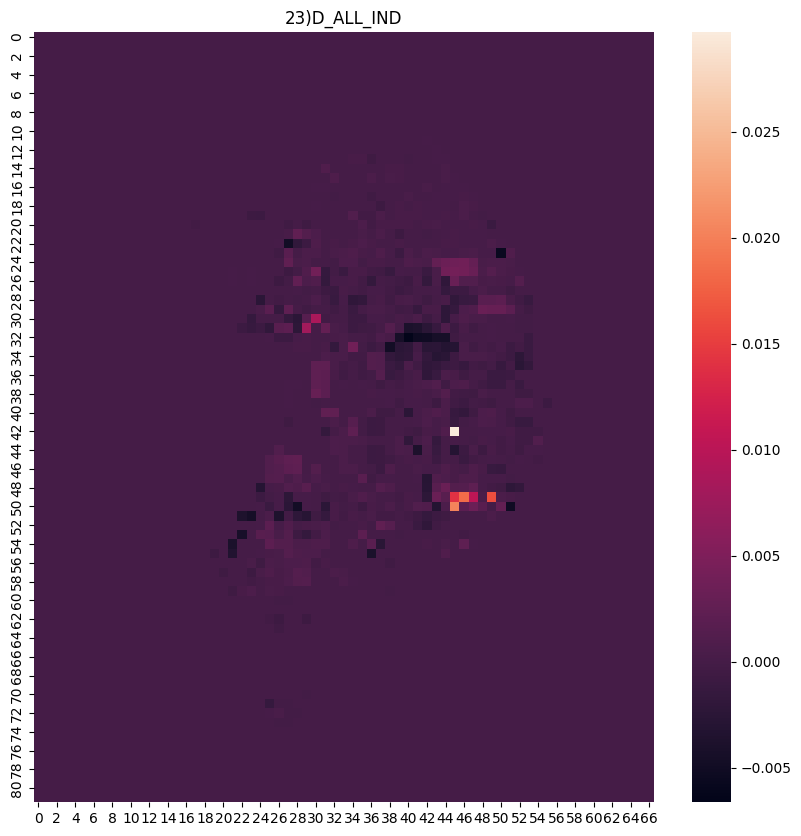

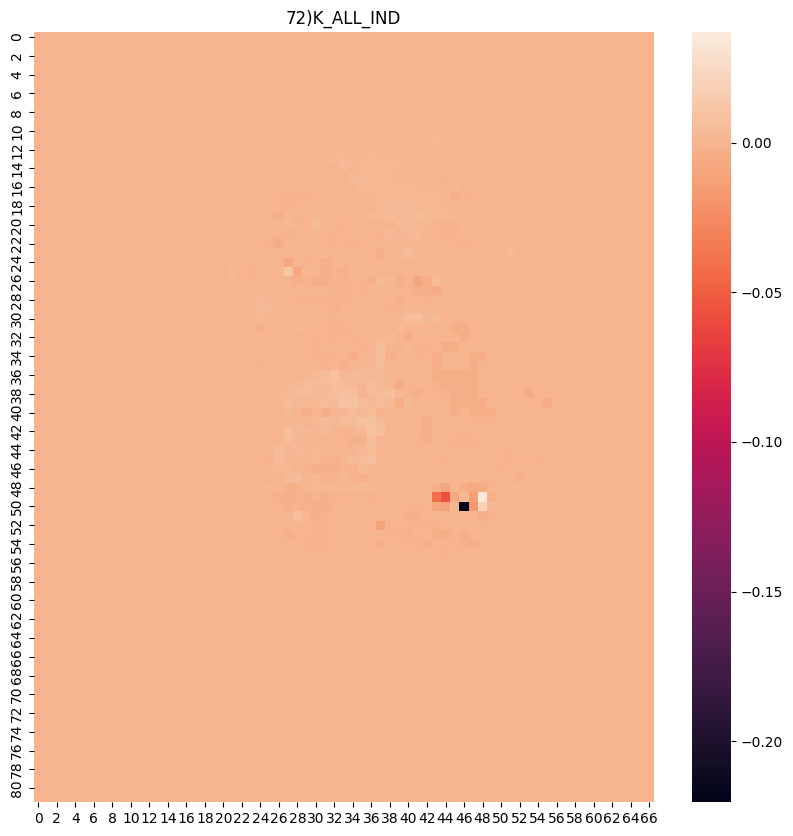

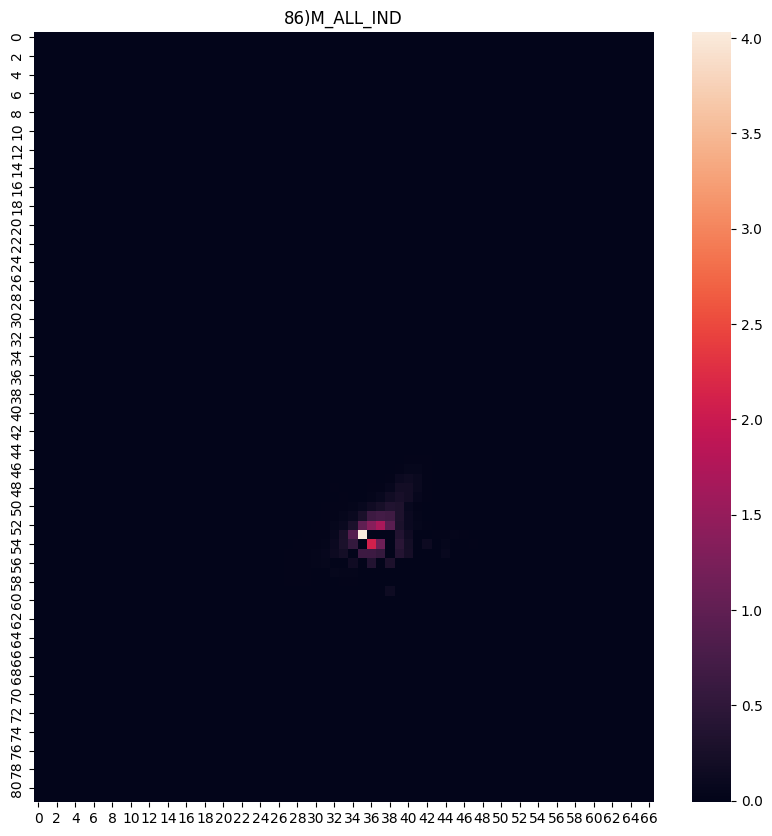

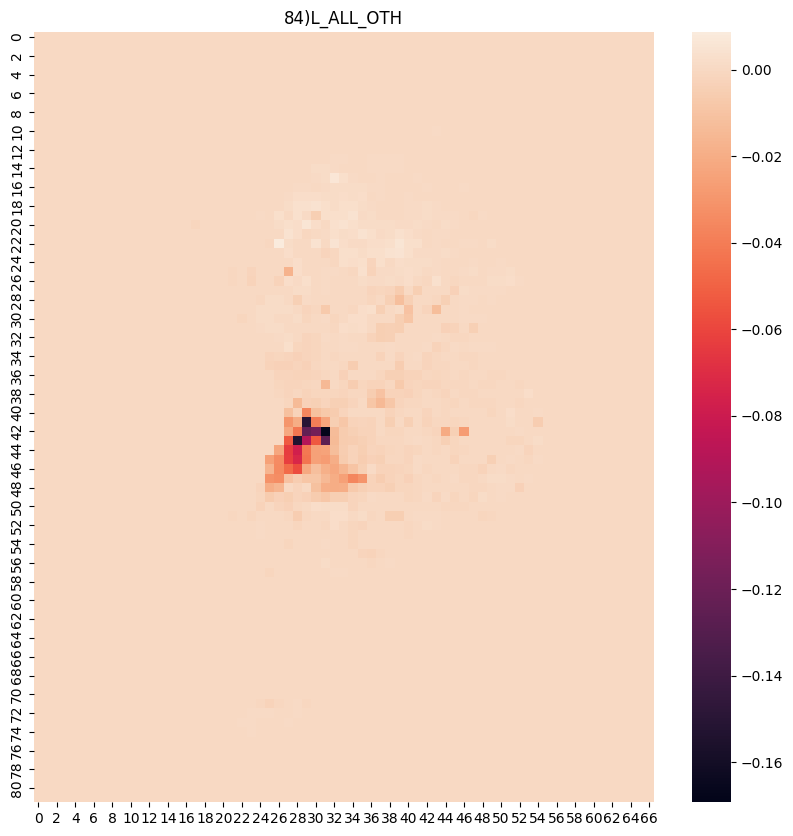

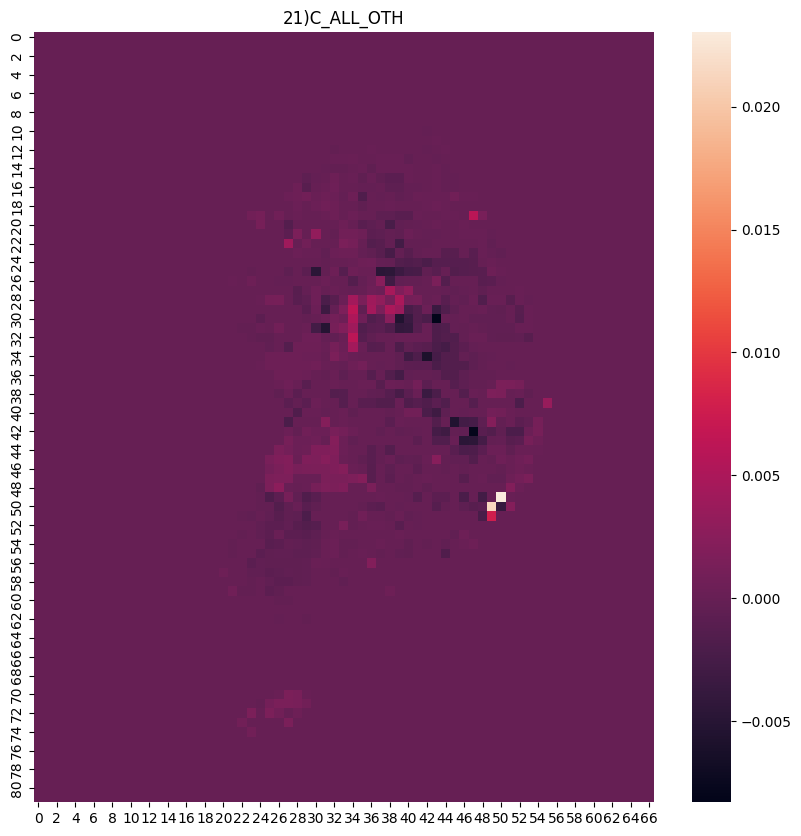

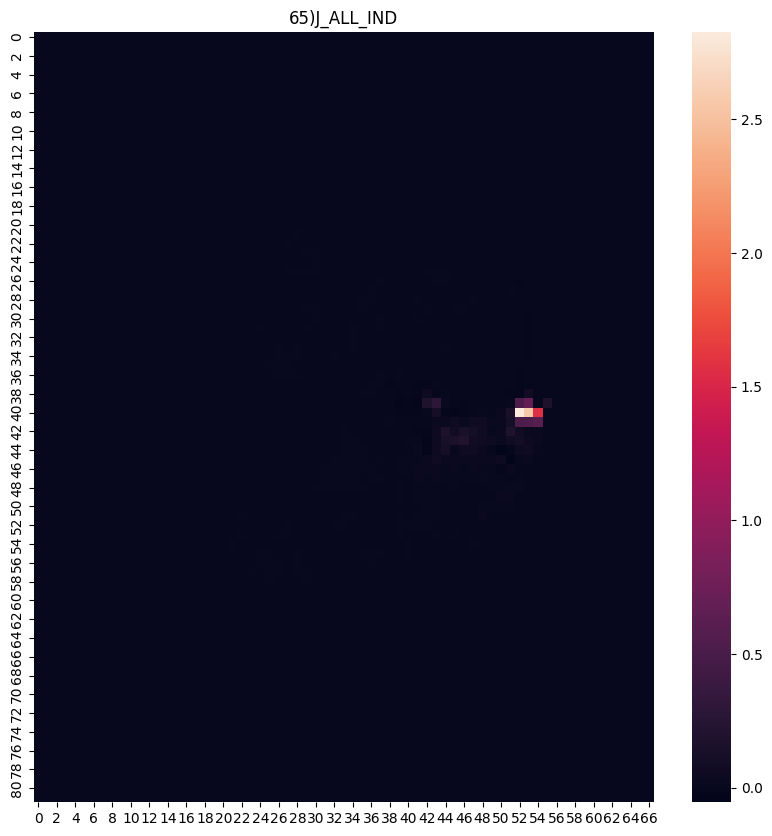

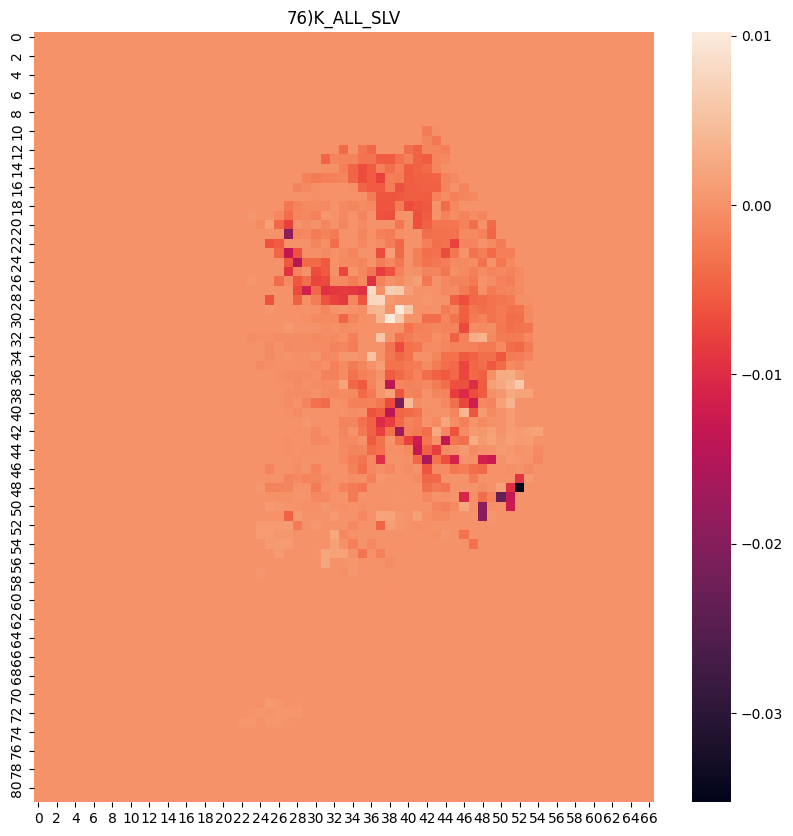

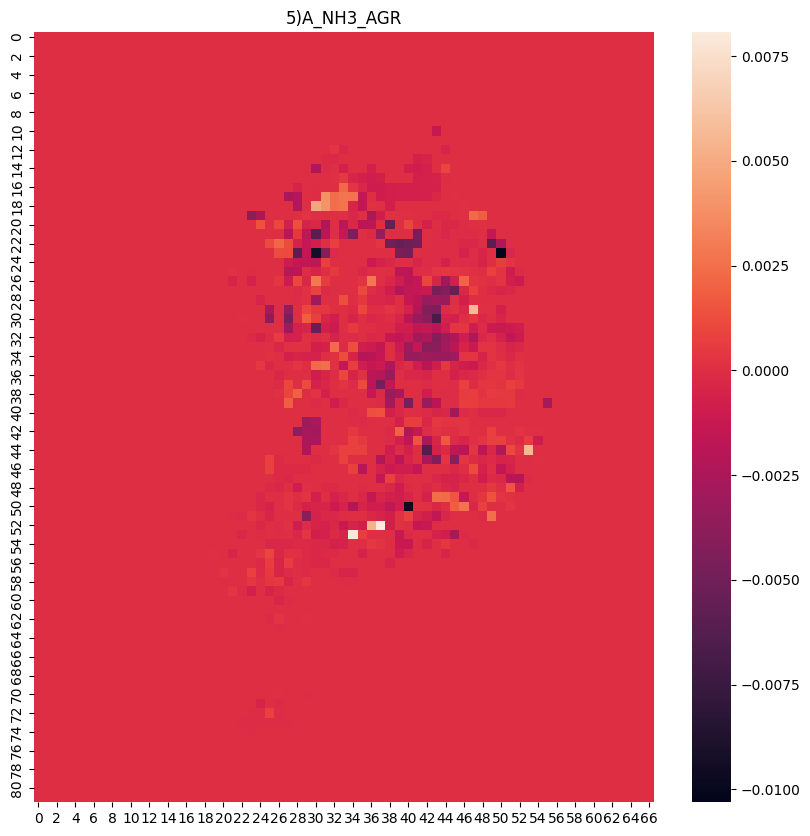

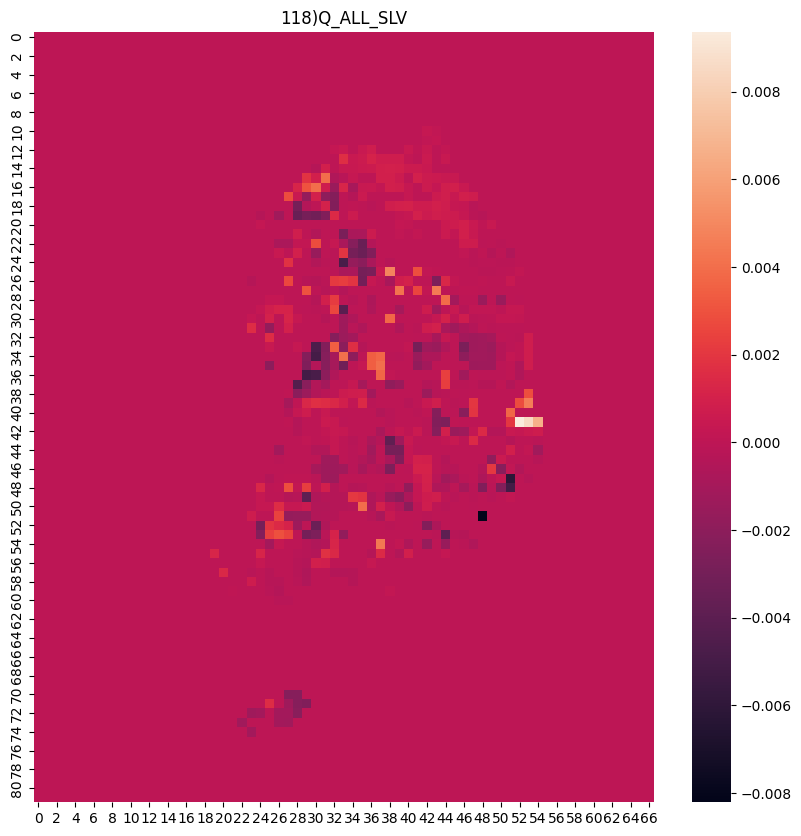

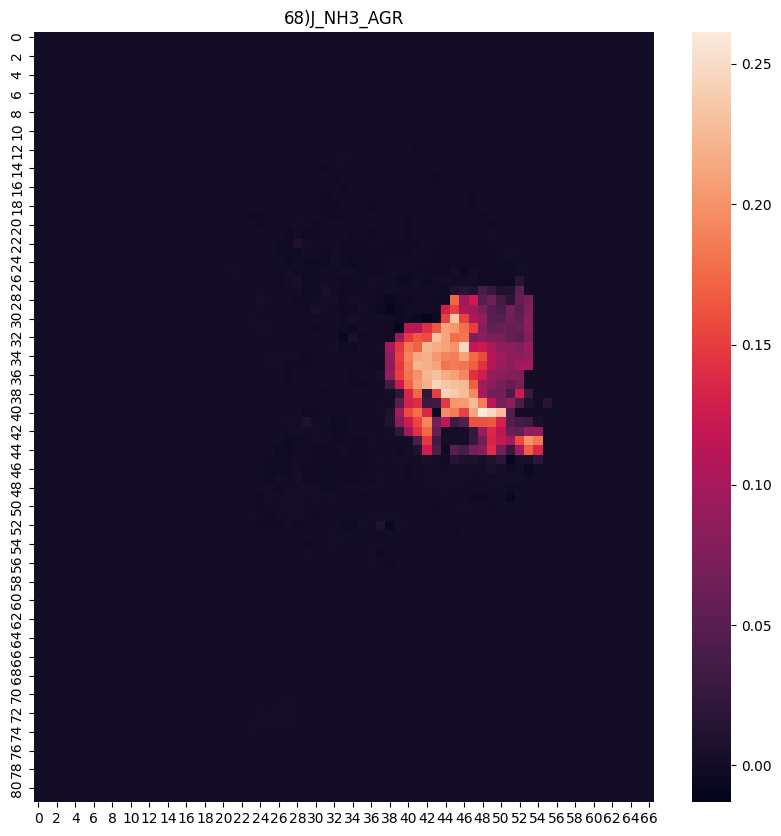

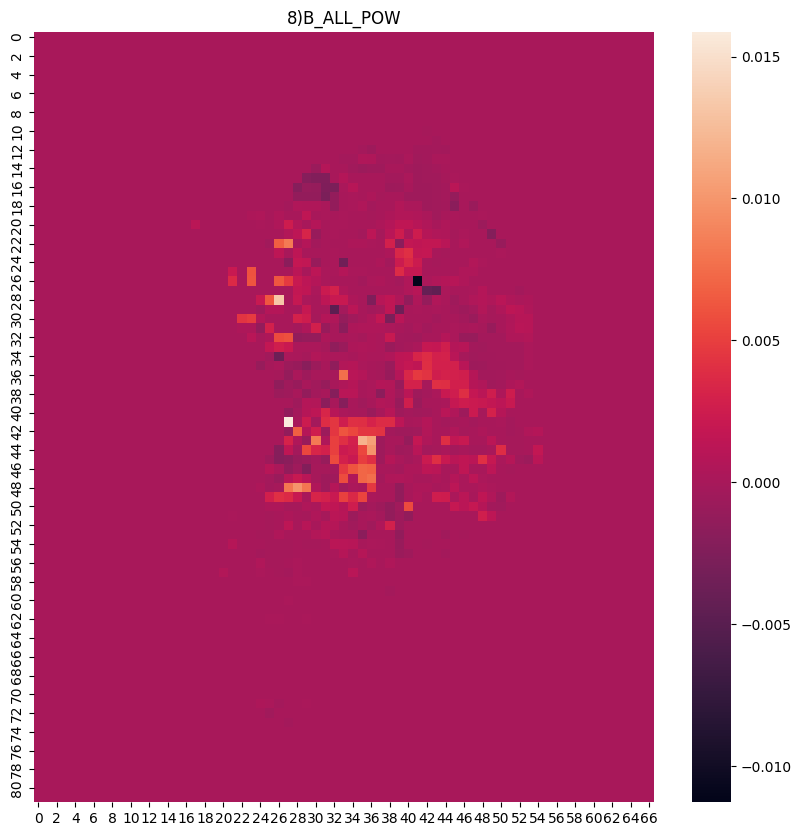

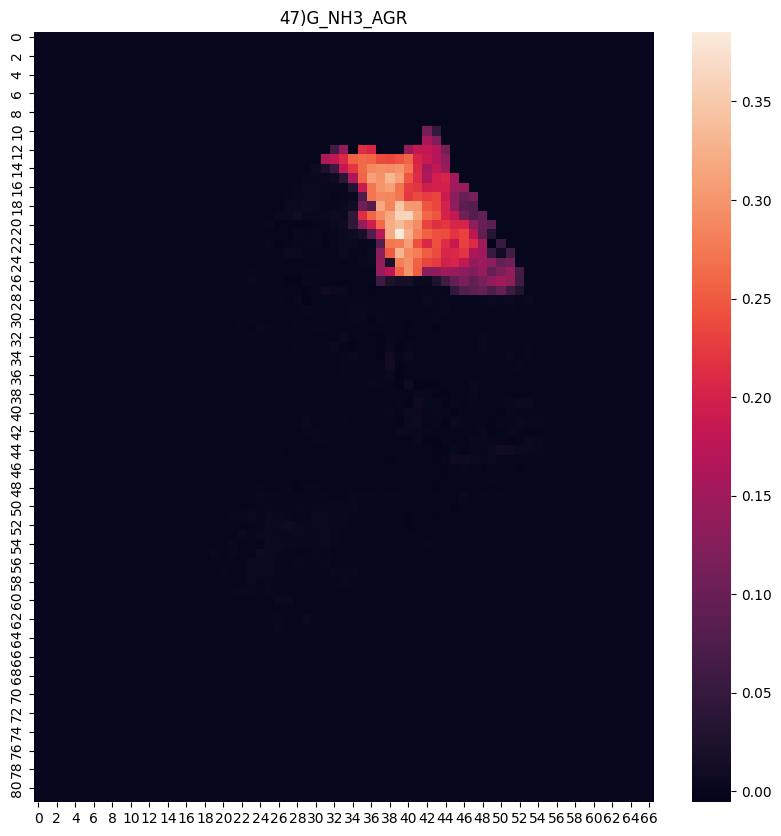

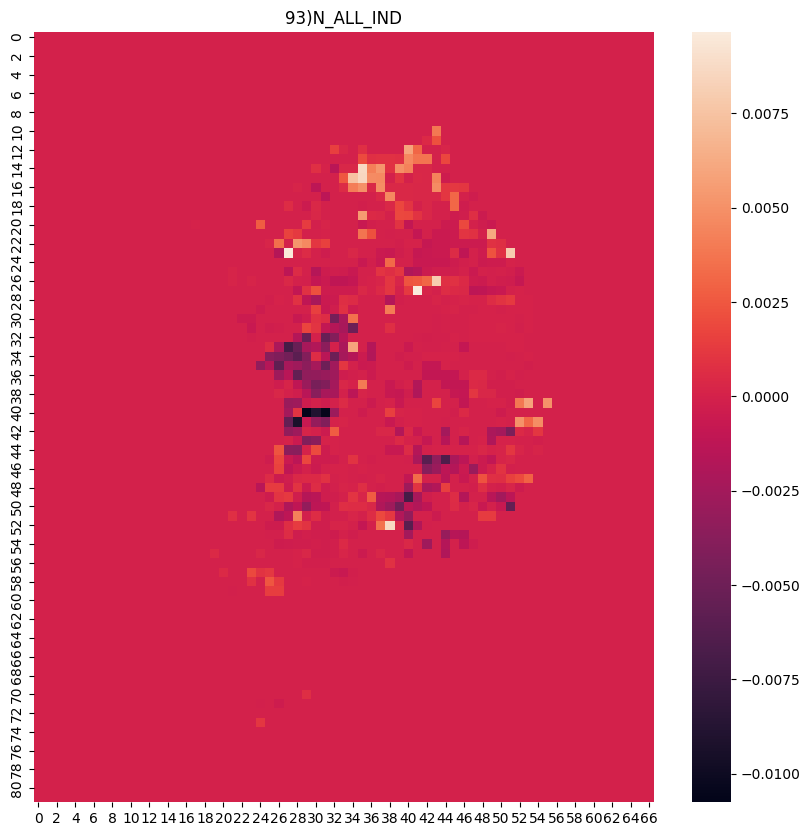

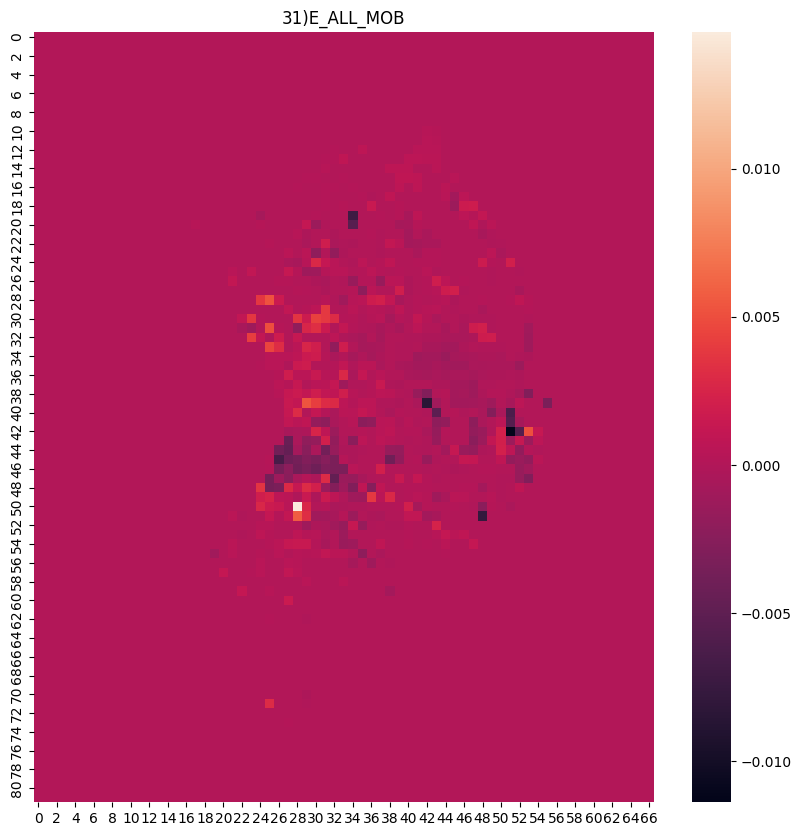

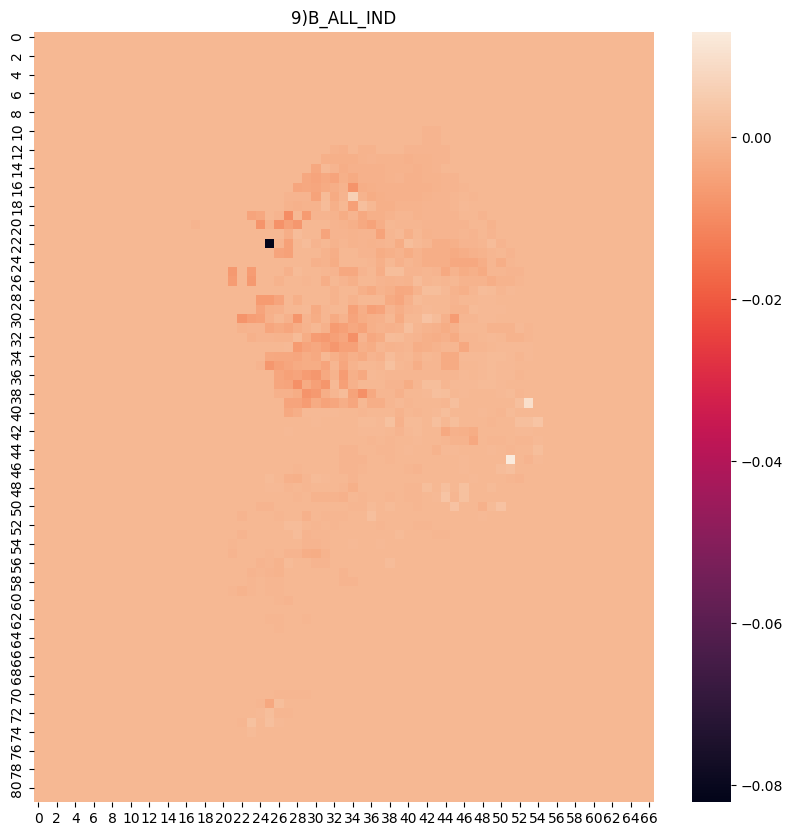

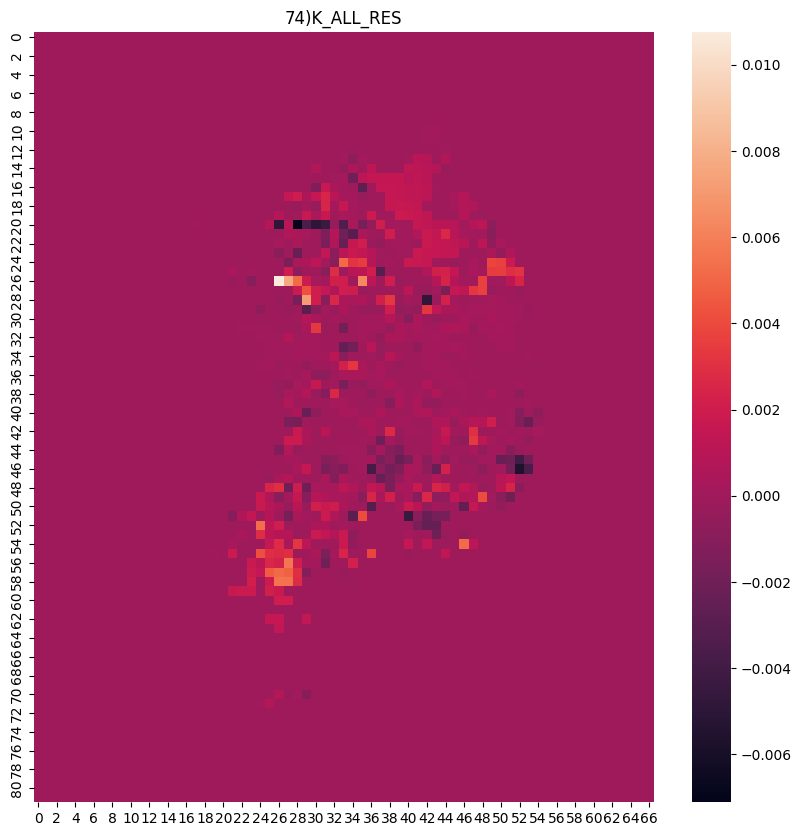

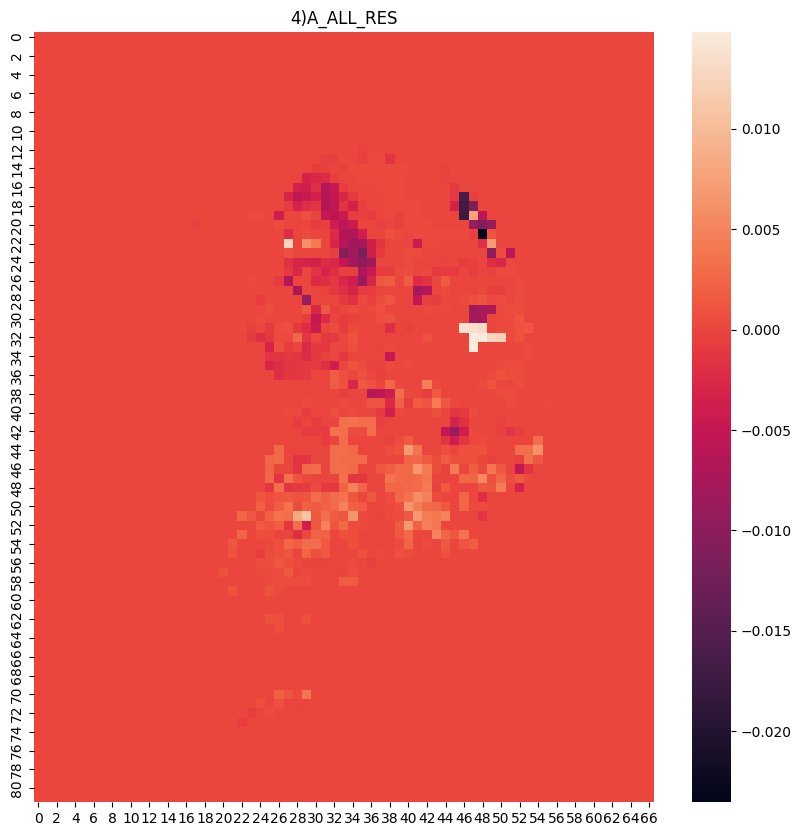

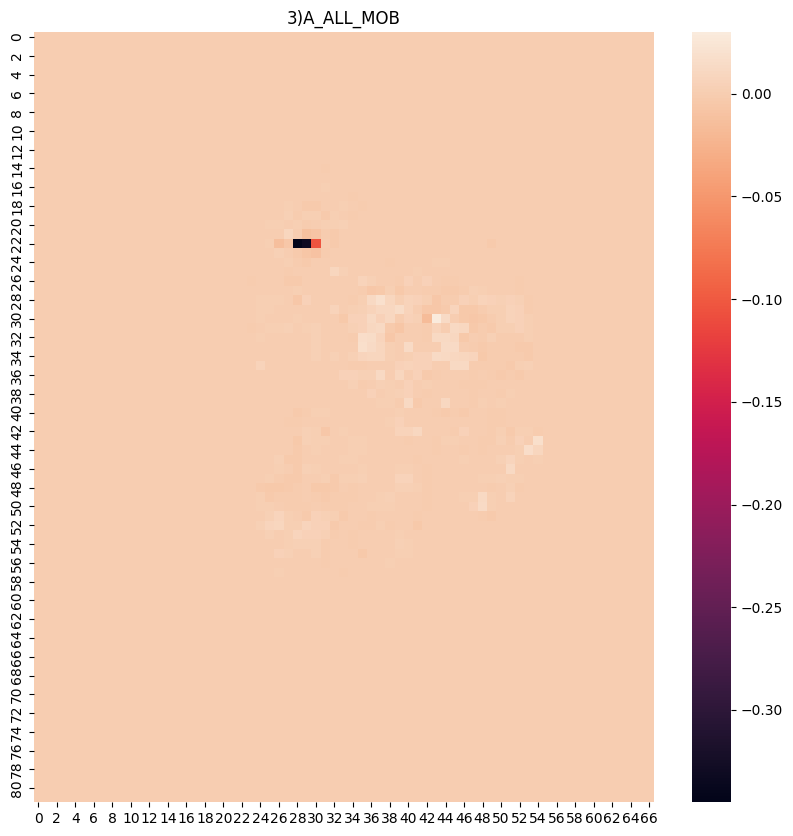

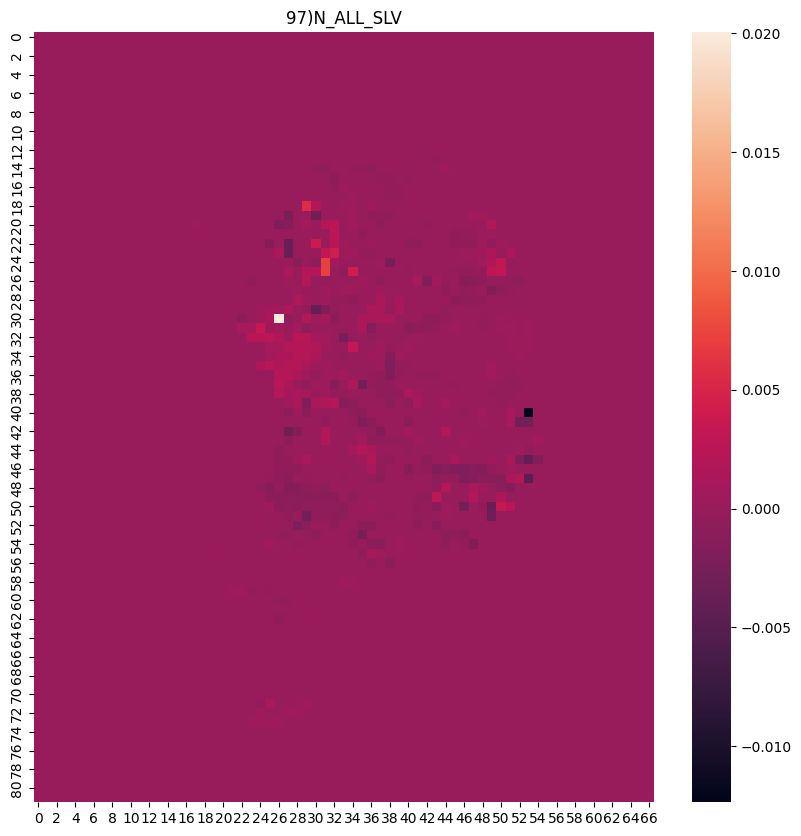

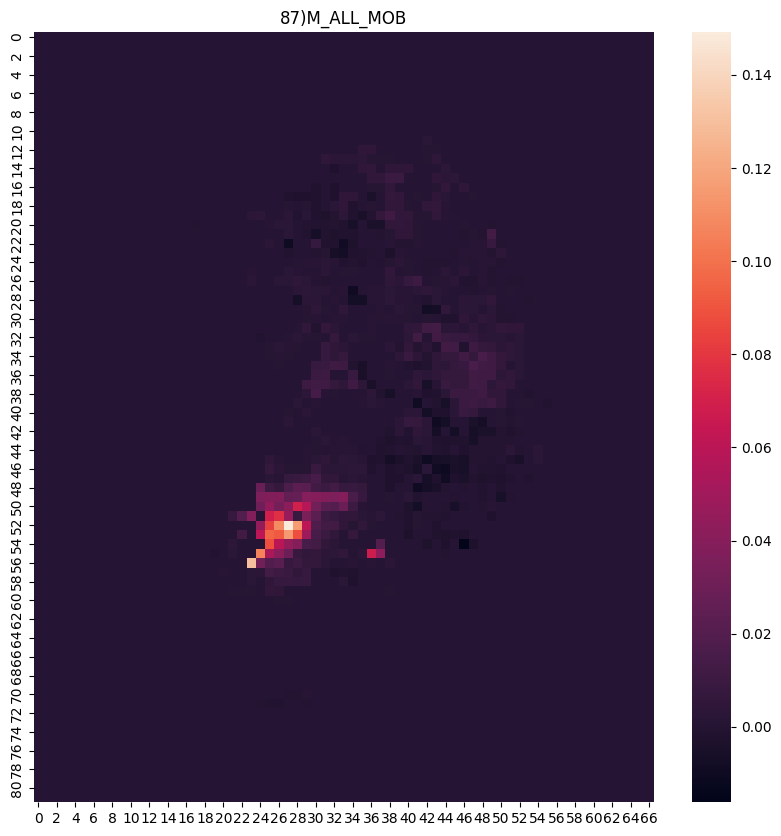

In [11]:
save_path = os.path.join(path,'repos','cmaqProject','plots','shapmap')
pixrf.get_shap_map(X_test, datacontroller.input_cols, [10,10],save_path)
